# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Possible Data Table (combined datasets)

CPI:
- CPI Housing
- CPI general
- CPI Food

Employment rates:
- Employment rate (average ireland | native born ireland | foreign born ireland | specific countries native born?)
- unemployment rate (average ireland | native born ireland | foreign born ireland | specific countries native born?)

Migration rates:
- Net Migration
- Immigration
- Immigration different countries?
- Emigration

# CSO Datasets 

## PEA 15 (Births, Deaths, Migration by Year)

### Import and Clean

In [2]:
PEA15 = pd.read_csv('Data/CSO_PEA15_Population_Change.csv', sep = ',')

In [3]:
PEA15.head(n=5)
PEA15.tail(n=5)

STATISTIC Label  Year          Component      UNIT   VALUE
579  Annual Population Change  2023         Immigrants  Thousand   141.6
580  Annual Population Change  2023          Emigrants  Thousand    64.0
581  Annual Population Change  2023      Net migration  Thousand    77.6
582  Annual Population Change  2023  Population change  Thousand    97.6
583  Annual Population Change  2023         Population  Thousand  5281.6

In [4]:
#PEA15 VALUE times 1000
PEA15['VALUE'] = PEA15['VALUE']*1000

In [5]:
#PEA15 remove STATISTIC Label column and UNIT column
PEA15 = PEA15.drop(columns = ['STATISTIC Label', 'UNIT'])

In [6]:
#PEA15 transpose Component column
PEA15 = PEA15.pivot_table(index = 'Year', columns = 'Component', values = 'VALUE').reset_index()

In [7]:
# Name of first column to 'Index'
PEA15.columns.name = 'Index'

In [8]:
PEA15.head(n=8)

Index  Year  Annual births  Annual deaths  Emigrants  Immigrants  \
0      1951            NaN            NaN        NaN         NaN   
1      1952            NaN            NaN        NaN         NaN   
2      1953            NaN            NaN        NaN         NaN   
3      1954            NaN            NaN        NaN         NaN   
4      1955            NaN            NaN        NaN         NaN   
5      1956            NaN            NaN        NaN         NaN   
6      1957            NaN            NaN        NaN         NaN   
7      1958            NaN            NaN        NaN         NaN   

Index  Natural increase  Net migration  Population  Population change  
0               26600.0       -35000.0   2960600.0            -8400.0  
1               27300.0       -35000.0   2952900.0            -7700.0  
2               29100.0       -33000.0   2949000.0            -3900.0  
3               28200.0       -36000.0   2941200.0            -7800.0  
4               24700.0       -45000.0   2920900.0           -20300.0  
5               25600.0       -48000.0   2898500.0           -22400.0  
6               27800.0       -41000.0   2885300.0           -13200.0  
7               25400.0       -58000.0   2852700.0           -32600.0

### Graphs

<Axes: title={'center': 'Population Changes in Ireland from 1987 to 2023'}, xlabel='Year'>

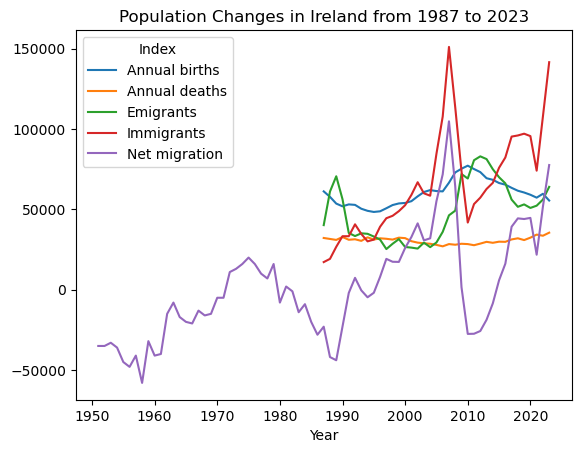

In [9]:
# Graph annual births, annual deaths, immigrants and emigrants per year
PEA15.plot(x = 'Year', y = ['Annual births', 'Annual deaths', 'Emigrants', 'Immigrants', 'Net migration'], xlabel='Year', title='Population Changes in Ireland from 1987 to 2023')

<Axes: title={'center': 'Population Changes in Ireland from 1987 to 2023'}, xlabel='Year'>

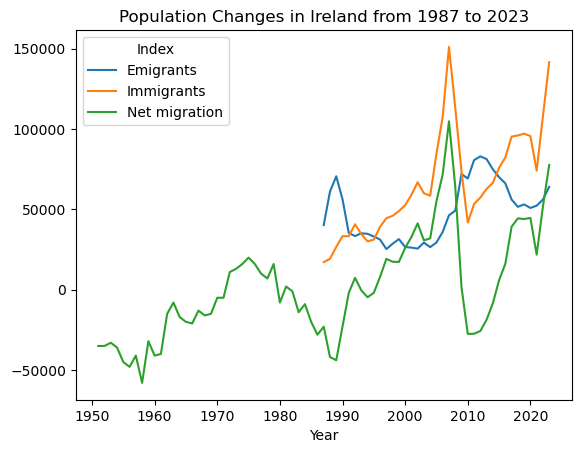

In [10]:
PEA15.plot(x = 'Year', y = [ 'Emigrants', 'Immigrants', 'Net migration'], xlabel='Year', title='Population Changes in Ireland from 1987 to 2023')

<Axes: title={'center': 'Population Changes in Ireland from 1987 to 2023'}, xlabel='Year'>

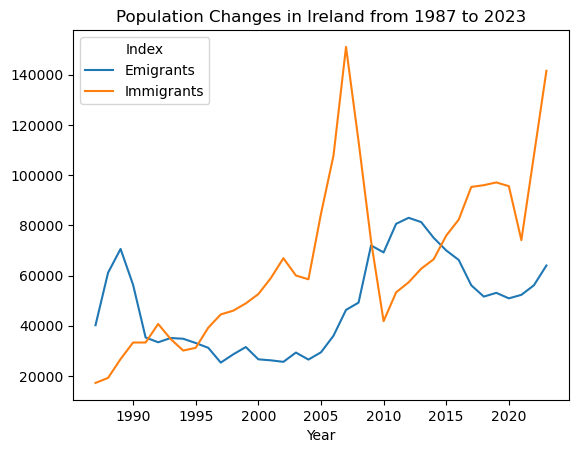

In [11]:
PEA15.plot(x = 'Year', y = [ 'Emigrants', 'Immigrants'], xlabel='Year', title='Population Changes in Ireland from 1987 to 2023')

## PEA 03 (Age, Sex, Migration by Year)

### Import and Clean

In [12]:
PEA03 = pd.read_csv('Data/CSO_PEA03_Migration_Sex_Age.csv', sep = ',')

In [13]:
PEA03.head(n=5)

STATISTIC Label  Year Age Group         Sex  \
0  Estimated Migration (Persons in April)  1987  All ages  Both sexes   
1  Estimated Migration (Persons in April)  1987  All ages  Both sexes   
2  Estimated Migration (Persons in April)  1987  All ages  Both sexes   
3  Estimated Migration (Persons in April)  1987  All ages        Male   
4  Estimated Migration (Persons in April)  1987  All ages        Male   

        Inward or Outward Flow      UNIT  VALUE  
0                Net migration  Thousand  -23.0  
1  Emigrants: All destinations  Thousand   40.2  
2      Immigrants: All origins  Thousand   17.2  
3                Net migration  Thousand    NaN  
4  Emigrants: All destinations  Thousand    NaN

In [14]:
# values for STATISTIC Label column in PEA03
PEA03['STATISTIC Label'].unique()

array(['Estimated Migration (Persons in April)'], dtype=object)

In [15]:
#PEA03 VALUE times 1000
PEA03['VALUE'] = PEA03['VALUE']*1000

In [16]:
# Remove STATISTIC Label column from PEA03
PEA03 = PEA03.drop(columns = ['STATISTIC Label', "UNIT"])

In [17]:
#PEA03 transpose Component column
PEA03 = PEA03.pivot_table(index = ['Year', 'Age Group', 'Sex'], columns = 'Inward or Outward Flow', values = 'VALUE').reset_index()

In [18]:
# Name of first column to 'Index'
PEA03.columns.name = 'Index'

In [19]:
PEA03.head(n=25)

Index  Year          Age Group         Sex  Emigrants: All destinations  \
0      1987       0 - 14 years  Both sexes                       2800.0   
1      1987       0 - 14 years      Female                       1300.0   
2      1987       0 - 14 years        Male                       1400.0   
3      1987      15 - 24 years  Both sexes                      24000.0   
4      1987      15 - 24 years      Female                      11700.0   
5      1987      15 - 24 years        Male                      12300.0   
6      1987      25 - 44 years  Both sexes                      11800.0   
7      1987      25 - 44 years      Female                       4900.0   
8      1987      25 - 44 years        Male                       6900.0   
9      1987      45 - 64 years  Both sexes                       1700.0   
10     1987      45 - 64 years      Female                        700.0   
11     1987      45 - 64 years        Male                       1000.0   
12     1987  65 years and over  Both sexes                          0.0   
13     1987  65 years and over      Female                          0.0   
14     1987  65 years and over        Male                          0.0   
15     1987           All ages  Both sexes                      40200.0   
16     1988       0 - 14 years  Both sexes                       8300.0   
17     1988       0 - 14 years      Female                       4000.0   
18     1988       0 - 14 years        Male                       4300.0   
19     1988      15 - 24 years  Both sexes                      31200.0   
20     1988      15 - 24 years      Female                      14300.0   
21     1988      15 - 24 years        Male                      17000.0   
22     1988      25 - 44 years  Both sexes                      18300.0   
23     1988      25 - 44 years      Female                       7300.0   
24     1988      25 - 44 years        Male                      11000.0   

Index  Immigrants: All origins  Net migration  
0                       3100.0            NaN  
1                       1800.0            NaN  
2                       1300.0            NaN  
3                       5100.0            NaN  
4                       3200.0            NaN  
5                       1900.0            NaN  
6                       6100.0            NaN  
7                       2700.0            NaN  
8                       3400.0            NaN  
9                       1800.0            NaN  
10                       800.0            NaN  
11                      1000.0            NaN  
12                      1100.0            NaN  
13                       600.0            NaN  
14                       500.0            NaN  
15                     17200.0       -23000.0  
16                      3000.0            NaN  
17                      1500.0            NaN  
18                      1500.0            NaN  
19                      5400.0            NaN  
20                      3000.0            NaN  
21                      2400.0            NaN  
22                      7200.0            NaN  
23                      3200.0            NaN  
24                      4000.0            NaN

In [20]:
# Change name columns 3 and 4
PEA03 = PEA03.rename(columns = {'Emigrants: All destinations': 'Emigrants'})
PEA03 = PEA03.rename(columns = {'Immigrants: All origins': 'Immigrants'})

### Graphs

<Axes: title={'center': 'Migration in Ireland from 1987 to 2023'}, xlabel='Year'>

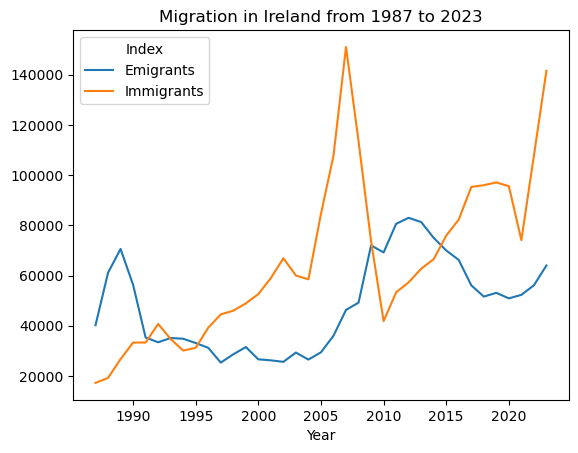

In [21]:
# Emigration and Immigration for all ages and sexes
PEA03[(PEA03['Age Group'] == 'All ages') & (PEA03['Sex'] == 'Both sexes')].plot(x='Year', y=['Emigrants', 'Immigrants'], xlabel='Year', title='Migration in Ireland from 1987 to 2023')

PEA03 shows the same data as PEA15, but with more information on age groups and sexes

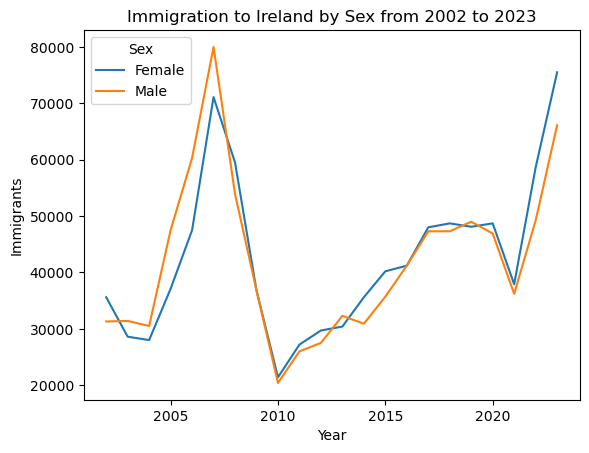

In [22]:
# Immigration by Sex
sns.lineplot(data=PEA03[(PEA03['Age Group'] == 'All ages') & (PEA03['Sex'].isin(['Female', 'Male']))], x='Year', y='Immigrants', hue='Sex')
plt.xlabel('Year')
plt.title('Immigration to Ireland by Sex from 2002 to 2023')
plt.legend(title='Sex')
plt.show()

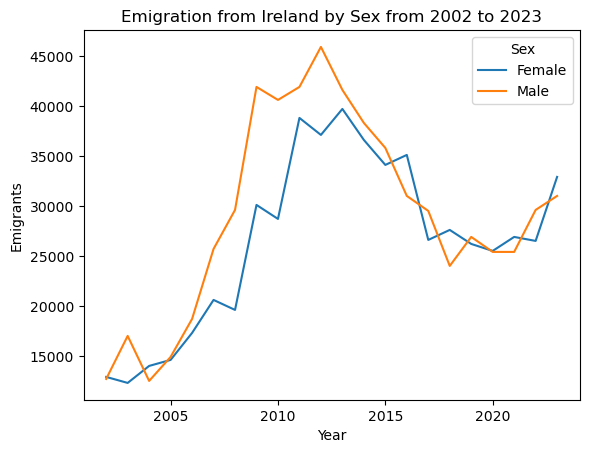

In [23]:
# Emigration by Sex
sns.lineplot(data=PEA03[(PEA03['Age Group'] == 'All ages') & (PEA03['Sex'].isin(['Female', 'Male']))], x='Year', y='Emigrants', hue='Sex')
plt.xlabel('Year')
plt.title('Emigration from Ireland by Sex from 2002 to 2023')
plt.legend(title='Sex')
plt.show()

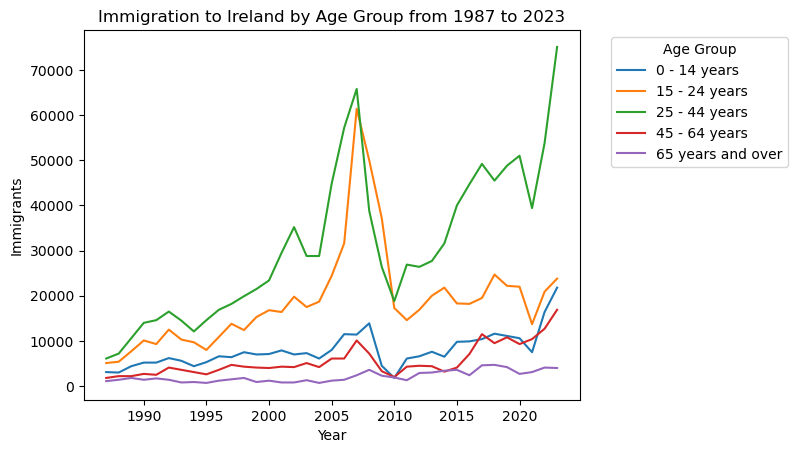

In [298]:
# Immigration by Age Group
sns.lineplot(data=PEA03[(PEA03['Age Group'] != 'All ages') & (PEA03['Sex'] == 'Both sexes')], x='Year', y='Immigrants', hue='Age Group')
plt.xlabel('Year')
plt.title('Immigration to Ireland by Age Group from 1987 to 2023')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# similar trend for immigration for 15-24 and 25-44 age groups untill 2010, but after divide with 25-44 age group having increasingly higher immigration and 
# 15-24 age group becoming similar in trends with other age groups

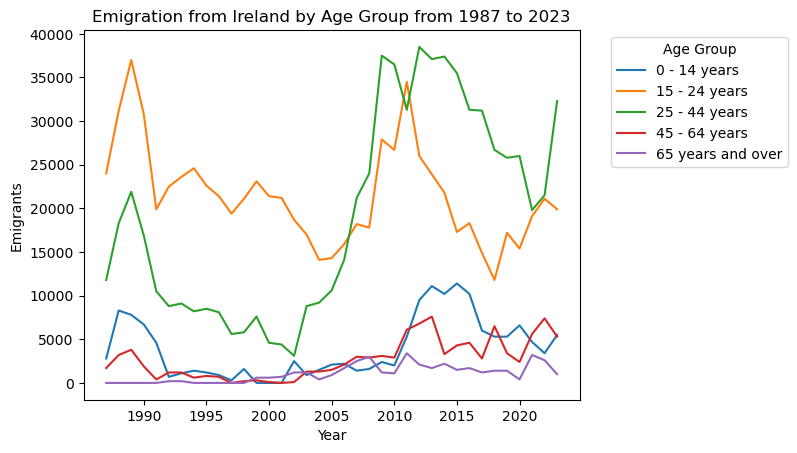

In [299]:
# Emigration by Age Group
sns.lineplot(data=PEA03[(PEA03['Age Group'] != 'All ages') & (PEA03['Sex'] == 'Both sexes')], x='Year', y='Emigrants', hue='Age Group')
plt.xlabel('Year')
plt.title('Emigration from Ireland by Age Group from 1987 to 2023')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
# age group 25-44 has gotten higher emigration over the yaers aswell as the 0-14 group, which could mean that adults with young children are leaving the country
# especially from years 2010 to 2016
# older people tend to not leave ireland as much as younger people (consistent over years)

## PEA 18 (Country and Mirgation by Year)

### Import and Clean

In [2]:
PEA18 = pd.read_csv('Data/CSO_PEA18_Migration_Sex_Country.csv', sep = ',')

In [3]:
PEA18.head(n=5)

STATISTIC Label  Year             Country  \
0  Estimated Migration (Persons in April)  1987  United Kingdom (1)   
1  Estimated Migration (Persons in April)  1987  United Kingdom (1)   
2  Estimated Migration (Persons in April)  1987  United Kingdom (1)   
3  Estimated Migration (Persons in April)  1987  United Kingdom (1)   
4  Estimated Migration (Persons in April)  1987  United Kingdom (1)   

          Sex        Origin or Destination      UNIT  VALUE  
0  Both sexes                Net migration  Thousand  -13.7  
1  Both sexes  Emigrants: All destinations  Thousand   21.8  
2  Both sexes      Immigrants: All origins  Thousand    8.1  
3        Male                Net migration  Thousand   -9.0  
4        Male  Emigrants: All destinations  Thousand   13.1

In [4]:
# values for STATISTIC Label column in PEA18
PEA18['STATISTIC Label'].unique()

array(['Estimated Migration (Persons in April)'], dtype=object)

In [5]:
#PEA18 VALUE times 1000
PEA18['VALUE'] = PEA18['VALUE']*1000

In [6]:
# Remove STATISTIC Label column from PEA18
PEA18 = PEA18.drop(columns = ['STATISTIC Label', "UNIT"])

In [7]:
#PEA18 transpose Component column
PEA18 = PEA18.pivot_table(index = ['Year', 'Country', 'Sex'], columns = 'Origin or Destination', values = 'VALUE').reset_index()

In [8]:
# Change name 1st column
PEA18.columns.name = 'Index'

In [9]:
# Change name columns for destination or origin
PEA18 = PEA18.rename(columns = {'Emigrants: All destinations': 'Emigrants'})
PEA18 = PEA18.rename(columns = {'Immigrants: All origins': 'Immigrants'})

In [10]:
PEA18.head(n=15)

Index  Year                       Country         Sex  Emigrants  Immigrants  \
0      1987                 All countries  Both sexes    40200.0     17200.0   
1      1987                 All countries      Female        NaN         NaN   
2      1987                 All countries        Male        NaN         NaN   
3      1987  EU14 excl Irl (UK & Ireland)  Both sexes     3100.0      2200.0   
4      1987  EU14 excl Irl (UK & Ireland)      Female     1900.0      1200.0   
5      1987  EU14 excl Irl (UK & Ireland)        Male     1200.0      1000.0   
6      1987          Other countries (23)  Both sexes     5400.0      4000.0   
7      1987          Other countries (23)      Female     2800.0      2200.0   
8      1987          Other countries (23)        Male     2600.0      1800.0   
9      1987            United Kingdom (1)  Both sexes    21800.0      8100.0   
10     1987            United Kingdom (1)      Female     8700.0      4000.0   
11     1987            United Kingdom (1)        Male    13100.0      4100.0   
12     1987                 United States  Both sexes     9900.0      3000.0   
13     1987                 United States      Female     5200.0      1700.0   
14     1987                 United States        Male     4800.0      1200.0   

Index  Net migration  
0           -23000.0  
1           -15100.0  
2           -13600.0  
3             -900.0  
4            -7500.0  
5             -200.0  
6            -1400.0  
7              600.0  
8             -800.0  
9           -13700.0  
10           -4700.0  
11           -9000.0  
12           -6900.0  
13           -3500.0  
14           -3600.0

In [11]:
# values for country column in PEA18
PEA18['Country'].unique()

array(['All countries', 'EU14 excl Irl (UK & Ireland)',
       'Other countries (23)', 'United Kingdom (1)', 'United States',
       'EU15 to EU27 (accession countries joined post 2004)', 'Australia',
       'Canada'], dtype=object)

### Graphs

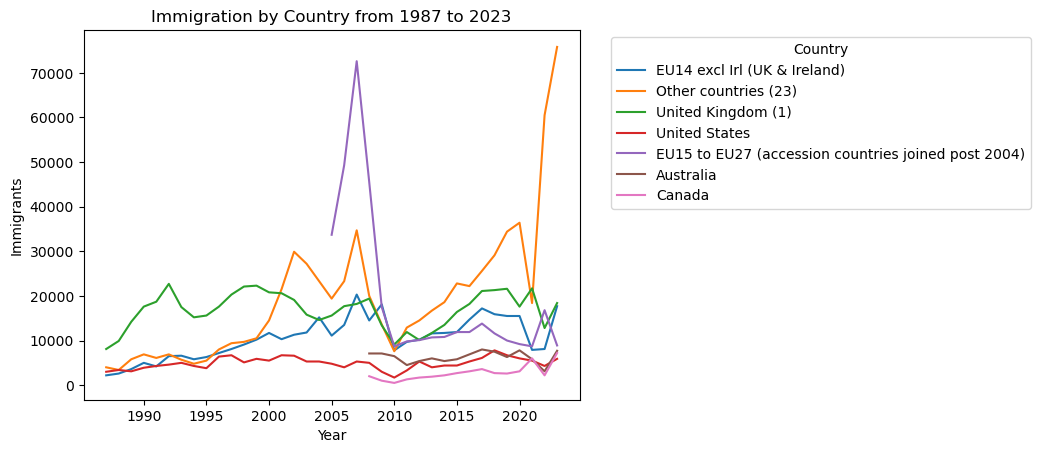

In [12]:
# Immigration by Country
sns.lineplot(data=PEA18[(PEA18['Country'] != 'All countries') & (PEA18['Sex'] == 'Both sexes')], x='Year', y='Immigrants', hue='Country')
plt.xlabel('Year')
plt.title('Immigration by Country from 1987 to 2023')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Spike in immigration from other countries outside eu, uk, us, australia and canada after 2021 (after covid)
# immigration numbers for this were however already steadily increasing from 2010

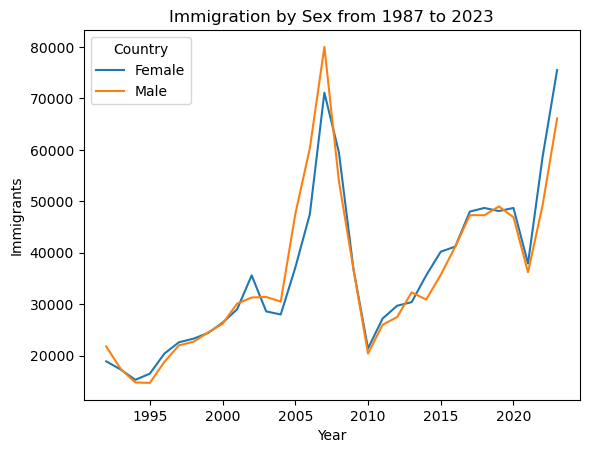

In [13]:
# Immigration by Country
sns.lineplot(data=PEA18[(PEA18['Country'] == 'All countries') & (PEA18['Sex'] != 'Both sexes')], x='Year', y='Immigrants', hue='Sex')
plt.xlabel('Year')
plt.title('Immigration by Sex from 1987 to 2023')
plt.legend(title='Country')
plt.show()
# No real divide by sex

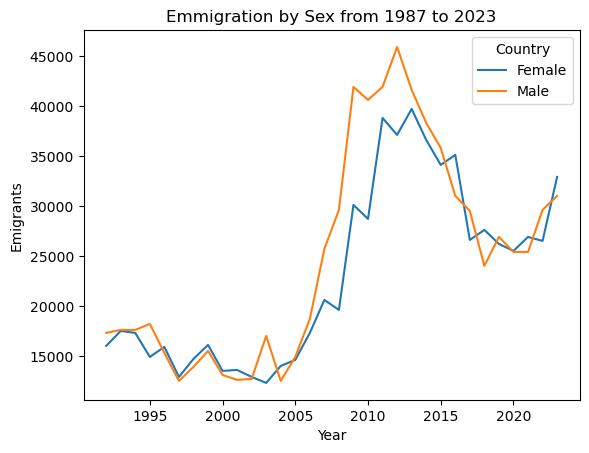

In [14]:
# Immigration by Country
sns.lineplot(data=PEA18[(PEA18['Country'] == 'All countries') & (PEA18['Sex'] != 'Both sexes')], x='Year', y='Emigrants', hue='Sex')
plt.xlabel('Year')
plt.title('Emmigration by Sex from 1987 to 2023')
plt.legend(title='Country')
plt.show()
# No real divide by sex

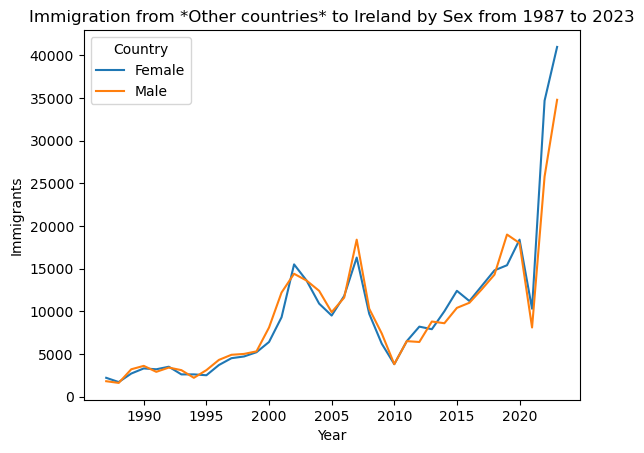

In [22]:
# Immigration by Country
sns.lineplot(data=PEA18[(PEA18['Country'] == 'Other countries (23)') & (PEA18['Sex'] != 'Both sexes')], x='Year', y='Immigrants', hue='Sex')
plt.xlabel('Year')
plt.title('Immigration from *Other countries* to Ireland by Sex from 1987 to 2023')
plt.legend(title='Country')
plt.show()
# No real divide by sex

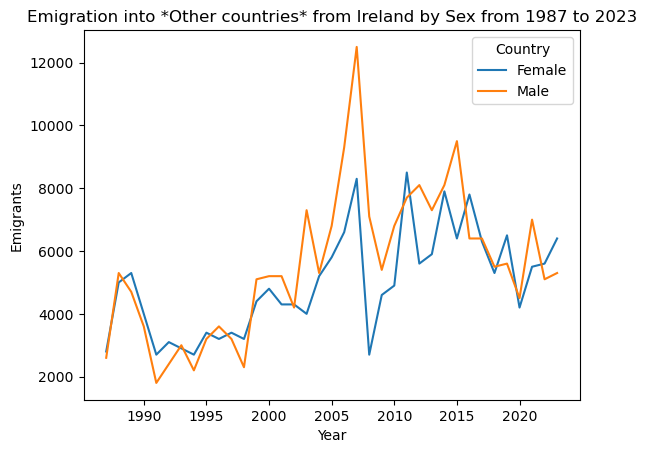

In [21]:
# Emigration by Country
sns.lineplot(data=PEA18[(PEA18['Country'] == 'Other countries (23)') & (PEA18['Sex'] != 'Both sexes')], x='Year', y='Emigrants', hue='Sex')
plt.xlabel('Year')
plt.title('Emigration into *Other countries* from Ireland by Sex from 1987 to 2023')
plt.legend(title='Country')
plt.show()
# No real divide by sex

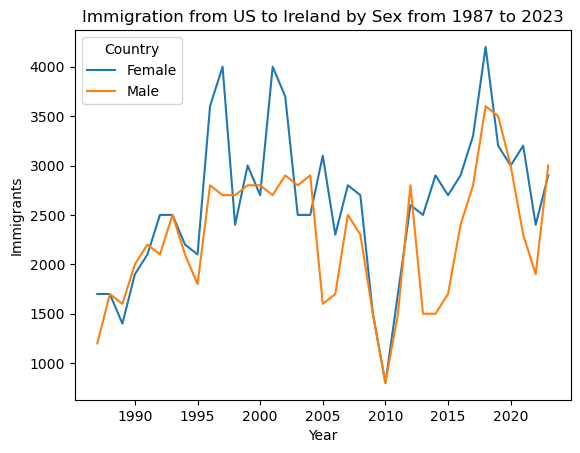

In [26]:
# Immigration by Country
sns.lineplot(data=PEA18[(PEA18['Country'] == 'United States') & (PEA18['Sex'] != 'Both sexes')], x='Year', y='Immigrants', hue='Sex')
plt.xlabel('Year')
plt.title('Immigration from US to Ireland by Sex from 1987 to 2023')
plt.legend(title='Country')
plt.show()
# No real divide by sex

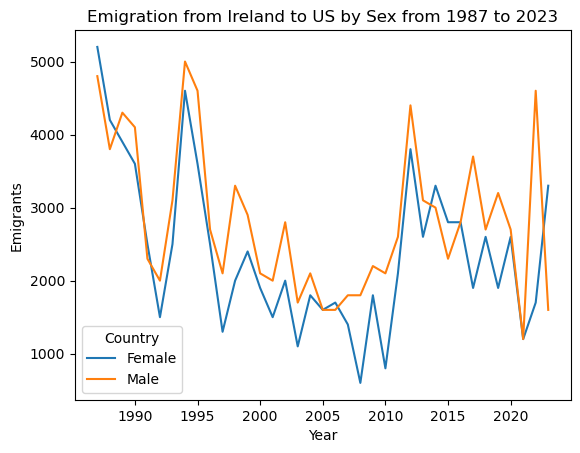

In [28]:
# Emigration by Country
sns.lineplot(data=PEA18[(PEA18['Country'] == 'United States') & (PEA18['Sex'] != 'Both sexes')], x='Year', y='Emigrants', hue='Sex')
plt.xlabel('Year')
plt.title('Emigration from Ireland to US by Sex from 1987 to 2023')
plt.legend(title='Country')
plt.show()
# No real divide by sex

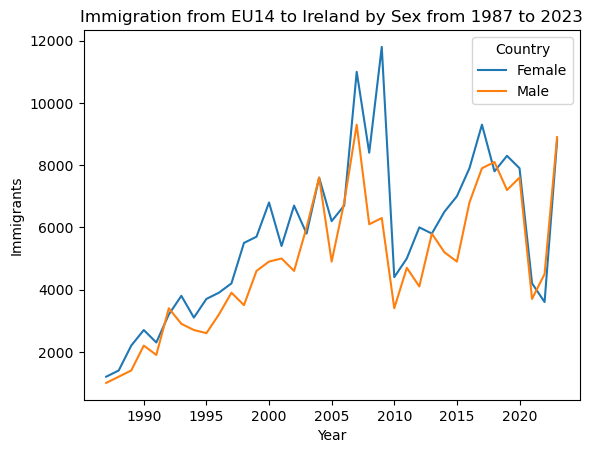

In [24]:
# Immigration by Country
sns.lineplot(data=PEA18[(PEA18['Country'] == 'EU14 excl Irl (UK & Ireland)') & (PEA18['Sex'] != 'Both sexes')], x='Year', y='Immigrants', hue='Sex')
plt.xlabel('Year')
plt.title('Immigration from EU14 to Ireland by Sex from 1987 to 2023')
plt.legend(title='Country')
plt.show()
# No real divide by sex

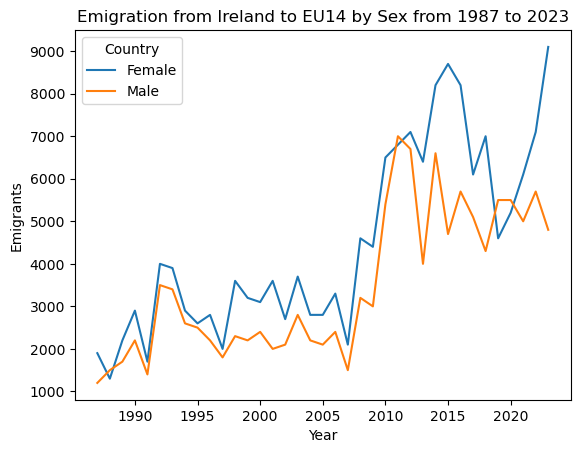

In [29]:
# Emigration by Country
sns.lineplot(data=PEA18[(PEA18['Country'] == 'EU14 excl Irl (UK & Ireland)') & (PEA18['Sex'] != 'Both sexes')], x='Year', y='Emigrants', hue='Sex')
plt.xlabel('Year')
plt.title('Emigration from Ireland to EU14 by Sex from 1987 to 2023')
plt.legend(title='Country')
plt.show()
# No real divide by sex

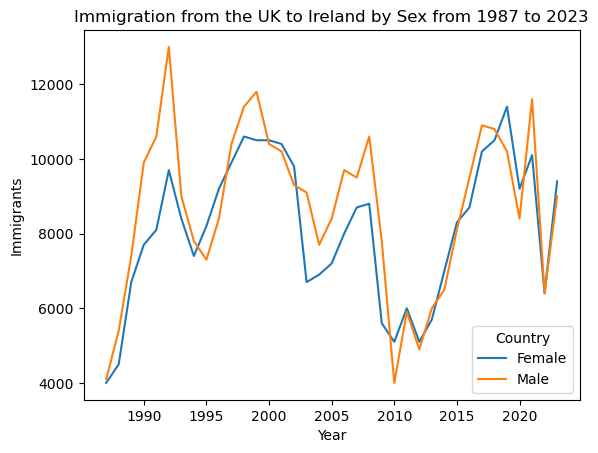

In [19]:
# Immigration by Country
sns.lineplot(data=PEA18[(PEA18['Country'] == 'United Kingdom (1)') & (PEA18['Sex'] != 'Both sexes')], x='Year', y='Immigrants', hue='Sex')
plt.xlabel('Year')
plt.title('Immigration from the UK to Ireland by Sex from 1987 to 2023')
plt.legend(title='Country')
plt.show()
# No real divide by sex

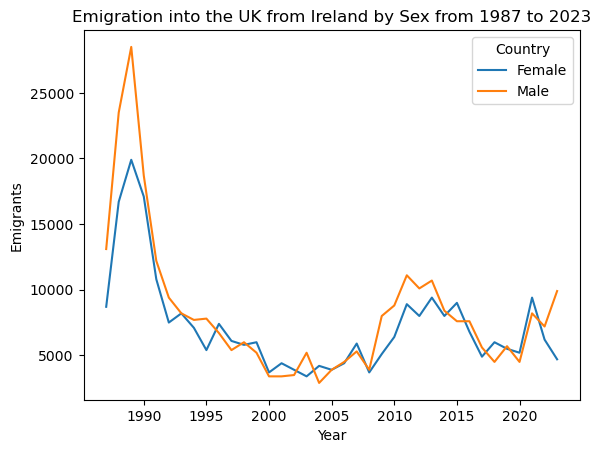

In [18]:

# Emigration by Country
sns.lineplot(data=PEA18[(PEA18['Country'] == 'United Kingdom (1)') & (PEA18['Sex'] != 'Both sexes')], x='Year', y='Emigrants', hue='Sex')
plt.xlabel('Year')
plt.title('Emigration into the UK from Ireland by Sex from 1987 to 2023')
plt.legend(title='Country')
plt.show()
# No real divide by sex

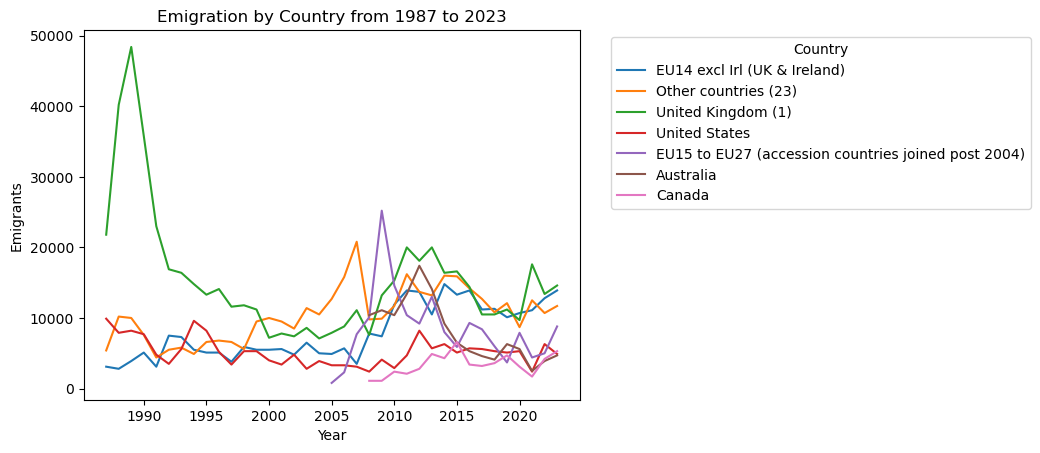

In [39]:
# Emigration by Country
sns.lineplot(data=PEA18[(PEA18['Country'] != 'All countries') & (PEA18['Sex'] == 'Both sexes')], x='Year', y='Emigrants', hue='Country')
plt.xlabel('Year')
plt.title('Emigration by Country from 1987 to 2023')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Further filtering

In [40]:
PEA18_2 = PEA18[(PEA18['Sex'] == 'Both sexes') & (PEA18['Country'].isin(['All countries', 'EU14 excl Irl (UK & Ireland)', 'Other countries (23)', 'United Kingdom (1)', 'United States', 'EU15 to EU27 (accession countries joined post 2004)']))]
PEA18_2.head()

Index  Year                       Country         Sex  Emigrants  Immigrants  \
0      1987                 All countries  Both sexes    40200.0     17200.0   
3      1987  EU14 excl Irl (UK & Ireland)  Both sexes     3100.0      2200.0   
6      1987          Other countries (23)  Both sexes     5400.0      4000.0   
9      1987            United Kingdom (1)  Both sexes    21800.0      8100.0   
12     1987                 United States  Both sexes     9900.0      3000.0   

Index  Net migration  
0           -23000.0  
3             -900.0  
6            -1400.0  
9           -13700.0  
12           -6900.0

In [41]:
PEA18_2.tail(n=10)

Index  Year                                            Country         Sex  \
672    2022  EU15 to EU27 (accession countries joined post ...  Both sexes   
675    2022                               Other countries (23)  Both sexes   
678    2022                                 United Kingdom (1)  Both sexes   
681    2022                                      United States  Both sexes   
684    2023                                      All countries  Both sexes   
693    2023                       EU14 excl Irl (UK & Ireland)  Both sexes   
696    2023  EU15 to EU27 (accession countries joined post ...  Both sexes   
699    2023                               Other countries (23)  Both sexes   
702    2023                                 United Kingdom (1)  Both sexes   
705    2023                                      United States  Both sexes   

Index  Emigrants  Immigrants  Net migration  
672       5000.0     16800.0        11800.0  
675      10700.0     60500.0        49800.0  
678      13400.0     12800.0         -600.0  
681       6300.0      4300.0        -2000.0  
684      64000.0    141600.0        77700.0  
693      13900.0     17700.0         3800.0  
696       8800.0      8900.0          100.0  
699      11700.0     75800.0        64100.0  
702      14600.0     18400.0         3800.0  
705       4900.0      5900.0         1000.0

In [42]:
#PEA18_2 transpose Component column
PEA18_2 = PEA18_2.pivot_table(index = ['Year'], columns = ['Country'], values = ['Emigrants', 'Immigrants', 'Net migration']).reset_index()

In [43]:
PEA18_2.columns = ['_'.join(col).strip() for col in PEA18_2.columns.values]

In [44]:
# Change column names
PEA18_2 = PEA18_2.rename(columns = {'Year_':'Year'})

In [45]:
PEA18_2.tail(n=10)

Year  Emigrants_All countries  Emigrants_EU14 excl Irl (UK & Ireland)  \
27  2014                  75000.0                                 14800.0   
28  2015                  70000.0                                 13300.0   
29  2016                  66200.0                                 13900.0   
30  2017                  56100.0                                 11200.0   
31  2018                  51600.0                                 11300.0   
32  2019                  53100.0                                 10100.0   
33  2020                  50900.0                                 10700.0   
34  2021                  52300.0                                 11100.0   
35  2022                  56100.0                                 12800.0   
36  2023                  64000.0                                 13900.0   

    Emigrants_EU15 to EU27 (accession countries joined post 2004)  \
27                                             8000.0               
28                                             5900.0               
29                                             9300.0               
30                                             8400.0               
31                                             6000.0               
32                                             3700.0               
33                                             7900.0               
34                                             4400.0               
35                                             5000.0               
36                                             8800.0               

    Emigrants_Other countries (23)  Emigrants_United Kingdom (1)  \
27                         16000.0                       16400.0   
28                         15900.0                       16600.0   
29                         14200.0                       14400.0   
30                         12700.0                       10500.0   
31                         10800.0                       10500.0   
32                         12100.0                       11200.0   
33                          8700.0                        9700.0   
34                         12500.0                       17600.0   
35                         10700.0                       13400.0   
36                         11700.0                       14600.0   

    Emigrants_United States  Immigrants_All countries  \
27                   6300.0                   66500.0   
28                   5100.0                   75900.0   
29                   5700.0                   82300.0   
30                   5600.0                   95300.0   
31                   5300.0                   96000.0   
32                   5100.0                   97100.0   
33                   5300.0                   95600.0   
34                   2400.0                   74100.0   
35                   6300.0                  107800.0   
36                   4900.0                  141600.0   

    Immigrants_EU14 excl Irl (UK & Ireland)  \
27                                  11700.0   
28                                  11900.0   
29                                  14700.0   
30                                  17200.0   
31                                  15900.0   
32                                  15500.0   
33                                  15500.0   
34                                   7900.0   
35                                   8100.0   
36                                  17700.0   

    Immigrants_EU15 to EU27 (accession countries joined post 2004)  \
27                                            10800.0                
28                                            11900.0                
29                                            11900.0                
30                                            13800.0                
31                                            11600.0                
32                                            10000.0                
33         

## !!! PEA 23 (Emigration, Sex, Country by Year)

### Import and Clean

In [46]:
PEA23 = pd.read_csv('Data/CSO_PEA23_Emigration_Sex_Citizenship.csv', sep = ',')

In [47]:
PEA23.head(n=5)

Statistic Label  Year         Sex  \
0  Estimated Emigration (Persons in April)  2006  Both sexes   
1  Estimated Emigration (Persons in April)  2006  Both sexes   
2  Estimated Emigration (Persons in April)  2006  Both sexes   
3  Estimated Emigration (Persons in April)  2006  Both sexes   
4  Estimated Emigration (Persons in April)  2006  Both sexes   

                                         Citizenship      UNIT  VALUE  
0                                      All Countries  Thousand   36.0  
1  EU14 excl Irl (countries in the EU pre 2004 ex...  Thousand    5.1  
2  EU15 to EU27 (accession countries joined post ...  Thousand    7.2  
3                                     United Kingdom  Thousand    2.2  
4                                            Ireland  Thousand   15.3

In [48]:
# values for STATISTIC Label column in PEA23
PEA23['Statistic Label'].unique()

array(['Estimated Emigration (Persons in April)'], dtype=object)

In [49]:
PEA23['Year'].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [50]:
#PEA23 VALUE times 1000
PEA23['VALUE'] = PEA23['VALUE']*1000

In [51]:
# Remove STATISTIC Label column from PEA23
PEA23 = PEA23.drop(columns = ['Statistic Label', "UNIT"])

In [52]:
#PEA23 rename VALUE column to Emigrants
PEA23 = PEA23.rename(columns = {'VALUE': 'Emigrants'})

In [53]:
PEA23.head(n=25)

Year         Sex                                        Citizenship  \
0   2006  Both sexes                                      All Countries   
1   2006  Both sexes  EU14 excl Irl (countries in the EU pre 2004 ex...   
2   2006  Both sexes  EU15 to EU27 (accession countries joined post ...   
3   2006  Both sexes                                     United Kingdom   
4   2006  Both sexes                                            Ireland   
5   2006  Both sexes  All countries excluding Ireland,United Kingdom...   
6   2006        Male                                      All Countries   
7   2006        Male  EU14 excl Irl (countries in the EU pre 2004 ex...   
8   2006        Male  EU15 to EU27 (accession countries joined post ...   
9   2006        Male                                     United Kingdom   
10  2006        Male                                            Ireland   
11  2006        Male  All countries excluding Ireland,United Kingdom...   
12  2006      Female                                      All Countries   
13  2006      Female  EU14 excl Irl (countries in the EU pre 2004 ex...   
14  2006      Female  EU15 to EU27 (accession countries joined post ...   
15  2006      Female                                     United Kingdom   
16  2006      Female                                            Ireland   
17  2006      Female  All countries excluding Ireland,United Kingdom...   
18  2007  Both sexes                                      All Countries   
19  2007  Both sexes  EU14 excl Irl (countries in the EU pre 2004 ex...   
20  2007  Both sexes  EU15 to EU27 (accession countries joined post ...   
21  2007  Both sexes                                     United Kingdom   
22  2007  Both sexes                                            Ireland   
23  2007  Both sexes  All countries excluding Ireland,United Kingdom...   
24  2007        Male                                      All Countries   

    Emigrants  
0     36000.0  
1      5100.0  
2      7200.0  
3      2200.0  
4     15300.0  
5      6200.0  
6     18700.0  
7      2500.0  
8      3700.0  
9      1600.0  
10     8000.0  
11     2800.0  
12    17300.0  
13     2600.0  
14     3400.0  
15      600.0  
16     7300.0  
17     3400.0  
18    46300.0  
19     8900.0  
20    12600.0  
21     3700.0  
22    12900.0  
23     8200.0  
24    25700.0

In [54]:
# filter citizzenship column on 'Ireland'
PEA23 = PEA23[PEA23['Citizenship'] == 'Ireland']

In [55]:
PEA23.head()

Year         Sex Citizenship  Emigrants
4   2006  Both sexes     Ireland    15300.0
10  2006        Male     Ireland     8000.0
16  2006      Female     Ireland     7300.0
22  2007  Both sexes     Ireland    12900.0
28  2007        Male     Ireland     6100.0

## !!! PEA 24 (Immigration, Sex, Citizenship)

### Import and Clean

In [56]:
# import PEA 24
PEA24 = pd.read_csv('Data/CSO_PEA24_Immigration_Sex_Citizenship.csv', sep = ',')

In [57]:
PEA24.head(n=5)

Statistic Label  Year         Sex  \
0  Estimated Immigration (Persons in April)  1996  Both sexes   
1  Estimated Immigration (Persons in April)  1996  Both sexes   
2  Estimated Immigration (Persons in April)  1996  Both sexes   
3  Estimated Immigration (Persons in April)  1996  Both sexes   
4  Estimated Immigration (Persons in April)  1996  Both sexes   

                                         Citizenship      UNIT  VALUE  
0                                      All Countries  Thousand   39.2  
1  EU14 excl Irl (countries in the EU pre 2004 ex...  Thousand    5.0  
2  EU15 to EU27 (accession countries joined post ...  Thousand    NaN  
3                                     United Kingdom  Thousand    8.3  
4                                            Ireland  Thousand   17.7

In [58]:
# values for STATISTIC Label column in PEA24
PEA24['Statistic Label'].unique()

array(['Estimated Immigration (Persons in April)'], dtype=object)

In [59]:
#PEA24 VALUE times 1000
PEA24['VALUE'] = PEA24['VALUE']*1000

In [60]:
# Remove STATISTIC Label column from PEA24
PEA24 = PEA24.drop(columns = ['Statistic Label', "UNIT"])

In [61]:
#PEA24 rename VALUE column to Immigrants
PEA24 = PEA24.rename(columns = {'VALUE': 'Immigrants'})

In [62]:
PEA24.head(n=25)

Year         Sex                                        Citizenship  \
0   1996  Both sexes                                      All Countries   
1   1996  Both sexes  EU14 excl Irl (countries in the EU pre 2004 ex...   
2   1996  Both sexes  EU15 to EU27 (accession countries joined post ...   
3   1996  Both sexes                                     United Kingdom   
4   1996  Both sexes                                            Ireland   
5   1996  Both sexes  All countries excluding Ireland,United Kingdom...   
6   1996        Male                                      All Countries   
7   1996        Male  EU14 excl Irl (countries in the EU pre 2004 ex...   
8   1996        Male  EU15 to EU27 (accession countries joined post ...   
9   1996        Male                                     United Kingdom   
10  1996        Male                                            Ireland   
11  1996        Male  All countries excluding Ireland,United Kingdom...   
12  1996      Female                                      All Countries   
13  1996      Female  EU14 excl Irl (countries in the EU pre 2004 ex...   
14  1996      Female  EU15 to EU27 (accession countries joined post ...   
15  1996      Female                                     United Kingdom   
16  1996      Female                                            Ireland   
17  1996      Female  All countries excluding Ireland,United Kingdom...   
18  1997  Both sexes                                      All Countries   
19  1997  Both sexes  EU14 excl Irl (countries in the EU pre 2004 ex...   
20  1997  Both sexes  EU15 to EU27 (accession countries joined post ...   
21  1997  Both sexes                                     United Kingdom   
22  1997  Both sexes                                            Ireland   
23  1997  Both sexes  All countries excluding Ireland,United Kingdom...   
24  1997        Male                                      All Countries   

    Immigrants  
0      39200.0  
1       5000.0  
2          NaN  
3       8300.0  
4      17700.0  
5       8200.0  
6      18800.0  
7       2200.0  
8          NaN  
9       4300.0  
10      8200.0  
11      4000.0  
12     20400.0  
13      2800.0  
14         NaN  
15      3900.0  
16      9500.0  
17      4200.0  
18     44500.0  
19      5500.0  
20         NaN  
21      8400.0  
22     20800.0  
23      9700.0  
24     22000.0

In [63]:
# filter citizzenship column on 'Ireland'
PEA24 = PEA24[PEA24['Citizenship'] == 'Ireland']

In [64]:
PEA24.head()

Year         Sex Citizenship  Immigrants
4   1996  Both sexes     Ireland     17700.0
10  1996        Male     Ireland      8200.0
16  1996      Female     Ireland      9500.0
22  1997  Both sexes     Ireland     20800.0
28  1997        Male     Ireland     10200.0

## CPM01 (Consumer Price Index)

### Import and Clean

In [65]:
# import CPM01
CPM01 = pd.read_csv('Data/CPM01_ConsumerPriceIndex.csv', sep = ',')

In [66]:
CPM01.head()

Statistic Label          Month  \
0  Consumer Price Index (Base Dec 2023=100)  1975 November   
1  Consumer Price Index (Base Dec 2023=100)  1975 November   
2  Consumer Price Index (Base Dec 2023=100)  1975 November   
3  Consumer Price Index (Base Dec 2023=100)  1975 November   
4  Consumer Price Index (Base Dec 2023=100)  1975 November   

                                    Commodity Group               UNIT  VALUE  
0                                         All items  Base Dec 2023=100   12.3  
1                  Food and non-alcoholic beverages  Base Dec 2023=100    NaN  
2                   Alcoholic beverages and tobacco  Base Dec 2023=100    NaN  
3                             Clothing and footwear  Base Dec 2023=100    NaN  
4  Housing, water, electricity, gas and other fuels  Base Dec 2023=100    NaN

In [67]:
print(CPM01['UNIT'].unique())
print(CPM01['Statistic Label'].unique())

['Base Dec 2023=100' 'Base Dec 2016=100' 'Base Dec 2011=100'
 'Base Dec 2006=100' 'Base Dec 2001=100' 'Base Nov 1996=100' '%']
['Consumer Price Index (Base Dec 2023=100)'
 'Consumer Price Index (Base Dec 2016=100)'
 'Consumer Price Index (Base Dec 2011=100)'
 'Consumer Price Index (Base Dec 2006=100)'
 'Consumer Price Index (Base Dec 2001=100)'
 'Consumer Price Index (Base Nov 1996=100)'
 'Percentage Change over 1 month for Consumer Price Index'
 'Percentage Change over 12 months for Consumer Price Index']


In [68]:
# Split month column on year and month
CPM01[['Year', 'Month']] = CPM01['Month'].str.split(' ', expand=True)

In [69]:
#CPM01 transpose Component column
CPM01 = CPM01.pivot_table(index = ['Year', 'Commodity Group'], columns = 'Statistic Label', values = 'VALUE').reset_index()

In [70]:
# Take average per year
CPM01 = CPM01.groupby(['Year', 'Commodity Group']).mean().reset_index()

In [71]:
# Change name 1st column
CPM01.columns.name = 'Index'

In [72]:
CPM01['Year'] = pd.to_numeric(CPM01['Year'])

In [73]:
CPM01.head()

Index  Year Commodity Group  Consumer Price Index (Base Dec 2001=100)  \
0      1975       All items                                    18.600   
1      1976       All items                                    21.250   
2      1977       All items                                    24.125   
3      1978       All items                                    26.000   
4      1979       All items                                    29.400   

Index  Consumer Price Index (Base Dec 2006=100)  \
0                                        15.700   
1                                        18.000   
2                                        20.425   
3                                        22.000   
4                                        24.925   

Index  Consumer Price Index (Base Dec 2011=100)  \
0                                        15.100   
1                                        17.250   
2                                        19.575   
3                                        21.075   
4                                        23.850   

Index  Consumer Price Index (Base Dec 2016=100)  \
0                                        14.900   
1                                        17.025   
2                                        19.325   
3                                        20.825   
4                                        23.600   

Index  Consumer Price Index (Base Dec 2023=100)  \
0                                        12.300   
1                                        14.050   
2                                        15.975   
3                                        17.200   
4                                        19.450   

Index  Consumer Price Index (Base Nov 1996=100)  \
0                                        21.900   
1                                        25.100   
2                                        28.525   
3                                        30.675   
4                                        34.750   

Index  Percentage Change over 1 month for Consumer Price Index  \
0                                               0.000000         
1                                               1.583333         
2                                               0.875000         
3                                               0.641667         
4                                               1.241667         

Index  Percentage Change over 12 months for Consumer Price Index  
0                                                    NaN          
1                                                 20.300          
2                                                 13.800          
3                                                  7.650          
4                                                 13.025

### Graphs

In [74]:
CPM01.columns.tolist()

['Year',
 'Commodity Group',
 'Consumer Price Index (Base Dec 2001=100)',
 'Consumer Price Index (Base Dec 2006=100)',
 'Consumer Price Index (Base Dec 2011=100)',
 'Consumer Price Index (Base Dec 2016=100)',
 'Consumer Price Index (Base Dec 2023=100)',
 'Consumer Price Index (Base Nov 1996=100)',
 'Percentage Change over 1 month for Consumer Price Index',
 'Percentage Change over 12 months for Consumer Price Index']

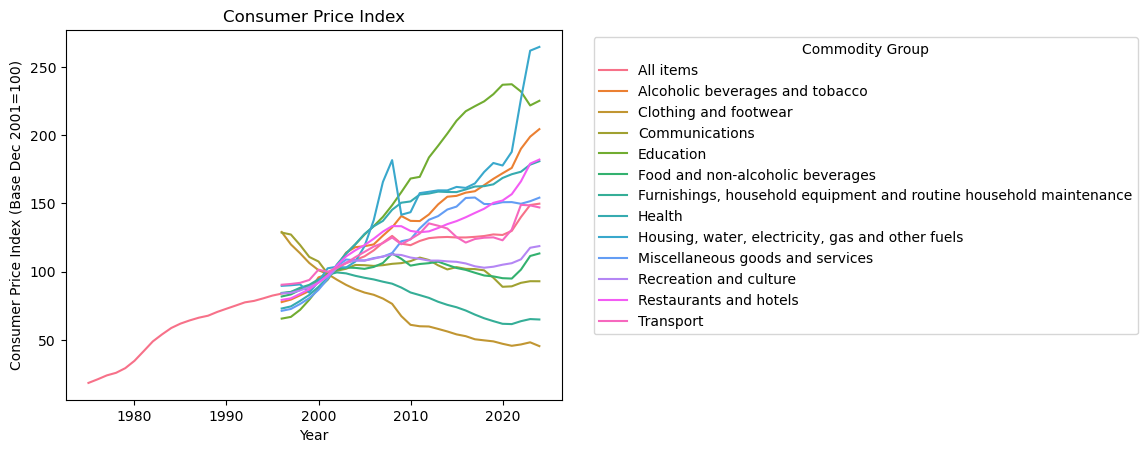

In [75]:
# Consumer Price Index 1975-2024
sns.lineplot(data=CPM01, x='Year', y='Consumer Price Index (Base Dec 2001=100)', hue='Commodity Group')
plt.xlabel('Year')
plt.title('Consumer Price Index')
plt.legend(title='Commodity Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [76]:
CPM01['Commodity Group'].unique()

array(['All items', 'Alcoholic beverages and tobacco',
       'Clothing and footwear', 'Communications', 'Education',
       'Food and non-alcoholic beverages',
       'Furnishings, household equipment and routine household maintenance',
       'Health', 'Housing, water, electricity, gas and other fuels',
       'Miscellaneous goods and services', 'Recreation and culture',
       'Restaurants and hotels', 'Transport'], dtype=object)

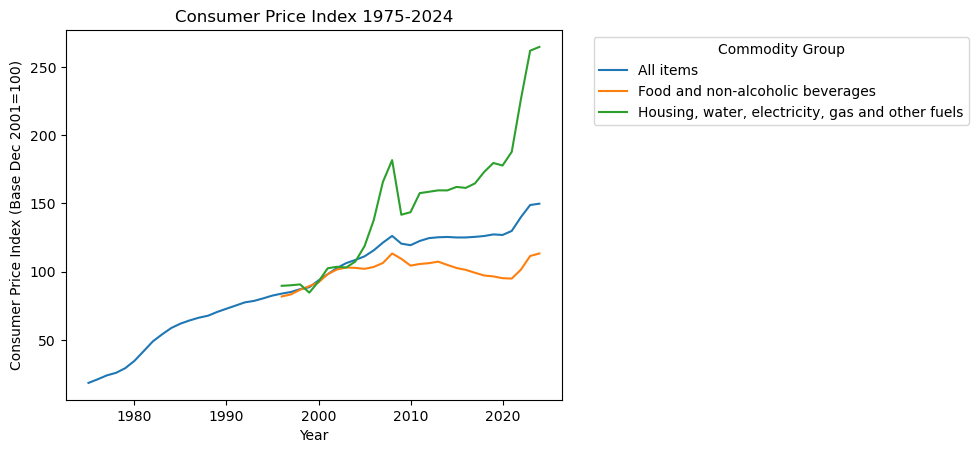

In [297]:
# Consumer Price Index 1975-2024
sns.lineplot(data=CPM01[(CPM01['Commodity Group'] == 'Food and non-alcoholic beverages') |
                        (CPM01['Commodity Group'] == 'Housing, water, electricity, gas and other fuels') |
                        (CPM01['Commodity Group'] == 'All items')],
             x='Year', y='Consumer Price Index (Base Dec 2001=100)', hue='Commodity Group')
plt.xlabel('Year')
plt.title('Consumer Price Index 1975-2024')
plt.legend(title='Commodity Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

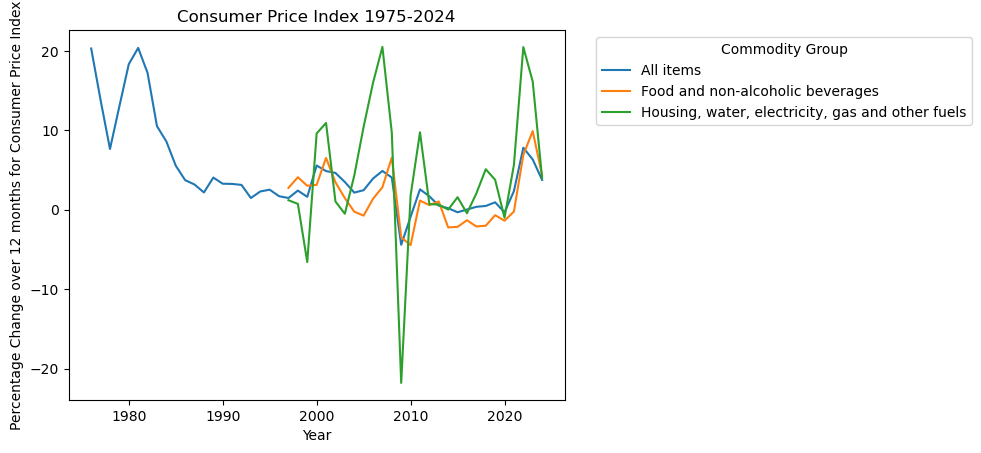

In [296]:
# Consumer Price Index 1975-2024
sns.lineplot(data=CPM01[(CPM01['Commodity Group'] == 'Food and non-alcoholic beverages') |
                        (CPM01['Commodity Group'] == 'Housing, water, electricity, gas and other fuels') |
                        (CPM01['Commodity Group'] == 'All items')],
             x='Year', y='Percentage Change over 12 months for Consumer Price Index', hue='Commodity Group')
plt.xlabel('Year')
plt.title('Consumer Price Index 1975-2024')
plt.legend(title='Commodity Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## TSA 02 (Import, Export)

### Import and Clean

In [79]:
# import TSA02
TSA02 = pd.read_csv('Data/CSO_TSA02_Import_Export.csv', sep = ',')

In [80]:
TSA02.head()

Statistic Label  Year  State           UNIT  VALUE
0  Trade Price Index for Imports  1930  State  Base 2010=100    3.9
1  Trade Price Index for Imports  1931  State  Base 2010=100    3.3
2  Trade Price Index for Imports  1932  State  Base 2010=100    3.2
3  Trade Price Index for Imports  1933  State  Base 2010=100    3.0
4  Trade Price Index for Imports  1934  State  Base 2010=100    3.0

In [81]:
print(TSA02['UNIT'].unique())
print(TSA02['Statistic Label'].unique())

['Base 2010=100']
['Trade Price Index for Imports' 'Trade Price Index for Exports'
 'Terms of Trade Index' 'Trade Volume Index for Imports'
 'Trade Volume Index for Exports']


In [82]:
#TSA02 transpose Component column
TSA02 = TSA02.pivot_table(index = ['Year'], columns = 'Statistic Label', values = 'VALUE').reset_index()

In [83]:
# Change name 1st column
TSA02.columns.name = 'Index'

In [84]:
# change variable names
TSA02 = TSA02.rename(columns = {'Terms of Trade Index': 'Terms of Trade Index (Base 2010)', 
                                'Trade Price Index for Exports':'Trade Price Index Exports (Base 2010)', 
                                'Trade Price Index for Imports':'Trade Price Index Imports (Base 2010)', 
                                'Trade Volume Index for Exports': 'Trade Volume Index Exports (Base 2010)',
                                'Trade Volume Index for Imports': 'Trade Volume Index Imports (Base 2010)'})

In [85]:
TSA02.head()

Index  Year  Terms of Trade Index (Base 2010)  \
0      1930                             101.4   
1      1931                             106.9   
2      1932                              94.8   
3      1933                              87.2   
4      1934                              80.5   

Index  Trade Price Index Exports (Base 2010)  \
0                                        4.0   
1                                        3.6   
2                                        3.1   
3                                        2.6   
4                                        2.4   

Index  Trade Price Index Imports (Base 2010)  \
0                                        3.9   
1                                        3.3   
2                                        3.2   
3                                        3.0   
4                                        3.0   

Index  Trade Volume Index Exports (Base 2010)  \
0                                         1.6   
1                                         1.4   
2                                         1.2   
3                                         1.0   
4                                         1.0   

Index  Trade Volume Index Imports (Base 2010)  
0                                         3.8  
1                                         3.9  
2                                         3.4  
3                                         3.2  
4                                         3.4

In [86]:
TSA02.tail()

Index  Year  Terms of Trade Index (Base 2010)  \
88     2018                              99.6   
89     2019                             103.0   
90     2020                             103.0   
91     2021                              96.4   
92     2022                              93.0   

Index  Trade Price Index Exports (Base 2010)  \
88                                      99.1   
89                                      99.5   
90                                      94.4   
91                                      95.0   
92                                      98.0   

Index  Trade Price Index Imports (Base 2010)  \
88                                      99.5   
89                                      96.6   
90                                      91.7   
91                                      98.6   
92                                     105.4   

Index  Trade Volume Index Exports (Base 2010)  \
88                                      156.2   
89                                      168.5   
90                                      188.6   
91                                      191.3   
92                                      233.9   

Index  Trade Volume Index Imports (Base 2010)  
88                                      189.2  
89                                      192.7  
90                                      194.4  
91                                      214.5  
92                                      275.2

### Graphs

<Axes: title={'center': 'Trade Index 1930-2022'}, xlabel='Year'>

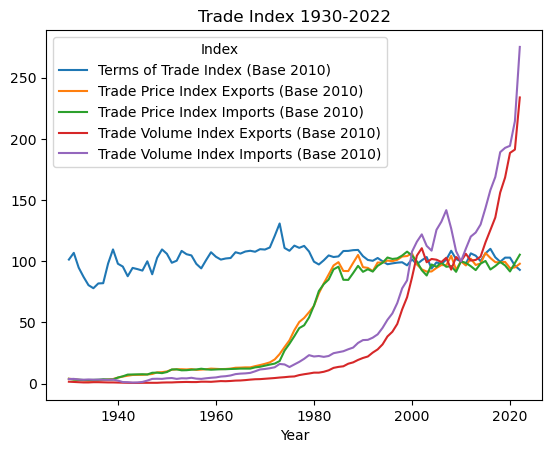

In [87]:
TSA02.plot(x='Year', 
           y=['Terms of Trade Index (Base 2010)', 'Trade Price Index Exports (Base 2010)', 'Trade Price Index Imports (Base 2010)', 'Trade Volume Index Exports (Base 2010)', 'Trade Volume Index Imports (Base 2010)'],
           xlabel='Year', 
           title='Trade Index 1930-2022')

<Axes: title={'center': 'Trade Price Index 1930-2022'}, xlabel='Year'>

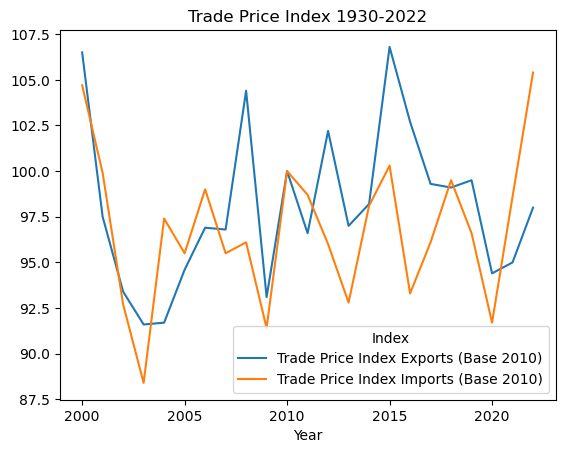

In [88]:
TSA02[TSA02['Year']>1999].plot(x='Year', 
           y=['Trade Price Index Exports (Base 2010)', 'Trade Price Index Imports (Base 2010)'],
           xlabel='Year', 
           title='Trade Price Index 1930-2022')

<Axes: title={'center': 'Trade Volume Index 1930-2022'}, xlabel='Year'>

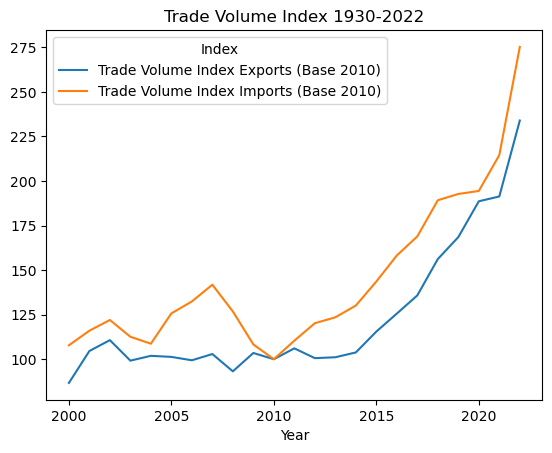

In [89]:
TSA02[TSA02['Year']>1999].plot(x='Year', 
           y=['Trade Volume Index Exports (Base 2010)', 'Trade Volume Index Imports (Base 2010)'],
           xlabel='Year', 
           title='Trade Volume Index 1930-2022')

Volume Index for Trade follows the trend lines of migration more closely and would therefore make more sense to use these rather than the Price Index for Trade

## BPA 33 (Direct Investment)

### Import and Clean

In [90]:
# import BPA33
BPA33 = pd.read_csv('Data/CSO_BPA33_Direct_Investment.csv', sep = ',')

In [91]:
BPA33.head()

Statistic Label  Year  \
0  Direct Investment  Flows Abroad  2012   
1  Direct Investment  Flows Abroad  2012   
2  Direct Investment  Flows Abroad  2012   
3  Direct Investment  Flows Abroad  2012   
4  Direct Investment  Flows Abroad  2012   

                             Geographic Location     Type of Investment  \
0  All countries and international organisations  All Direct Investment   
1                                  United States  All Direct Investment   
2                                       Asia (6)  All Direct Investment   
3                                           EU28  All Direct Investment   
4                                     Europe (3)  All Direct Investment   

           UNIT    VALUE  
0  Euro Million  17548.0  
1  Euro Million   6734.0  
2  Euro Million    920.0  
3  Euro Million   -278.0  
4  Euro Million   4867.0

In [92]:
print(BPA33['UNIT'].unique())
print(BPA33['Year'].unique())
print(BPA33['Statistic Label'].unique())
print(BPA33['Type of Investment'].unique())
print(BPA33['Geographic Location'].unique())

['Euro Million']
[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
['Direct Investment  Flows Abroad' 'Direct Investment  Flows in Ireland']
['All Direct Investment']
['All countries and international organisations' 'United States'
 'Asia (6)' 'EU28' 'Europe (3)' 'North America (1)']


### Graphs

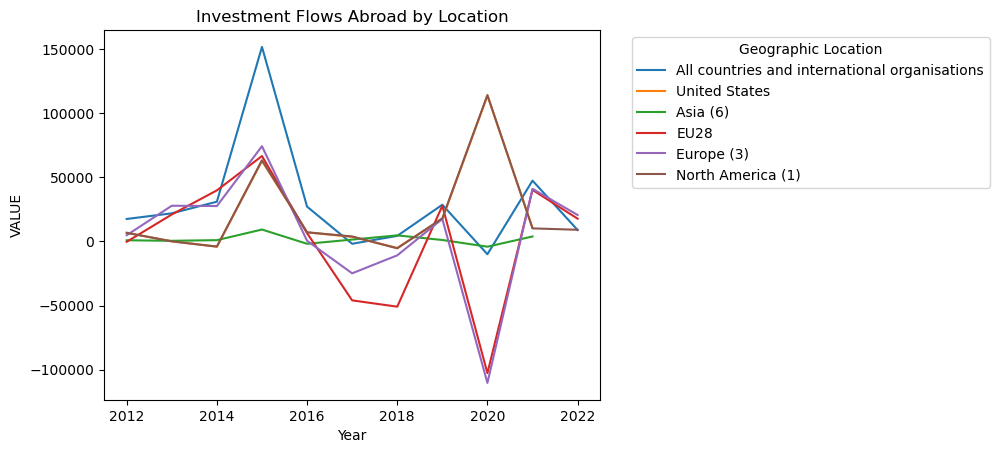

In [93]:
# Investment Flows Abroad by Location
sns.lineplot(data=BPA33[(BPA33['Statistic Label'] == 'Direct Investment  Flows Abroad')],
              x='Year', 
              y='VALUE', 
              hue='Geographic Location')
plt.xlabel('Year')
plt.title('Investment Flows Abroad by Location')
plt.legend(title='Geographic Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


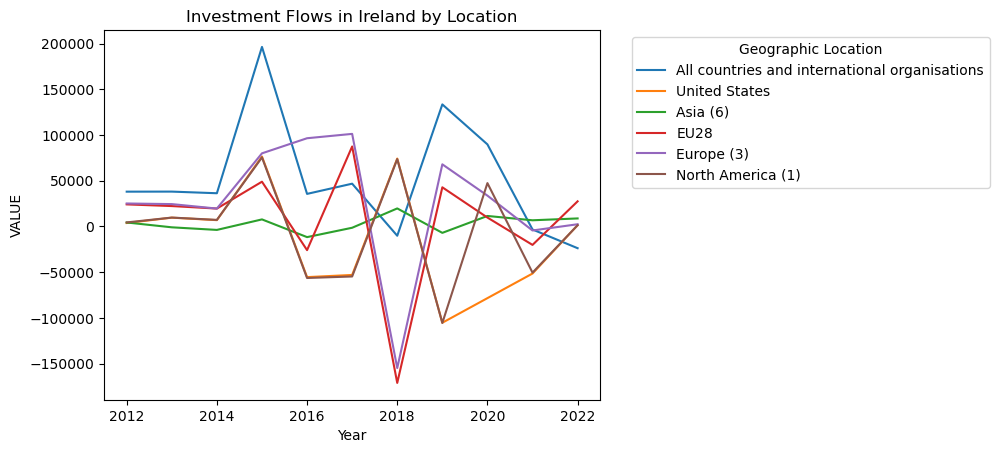

In [94]:
# Investment Flows in Ireland by Location
sns.lineplot(data=BPA33[(BPA33['Statistic Label'] == 'Direct Investment  Flows in Ireland')],
              x='Year', 
              y='VALUE', 
              hue='Geographic Location')
plt.xlabel('Year')
plt.title('Investment Flows in Ireland by Location')
plt.legend(title='Geographic Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Further Filtering

In [95]:
BPA33_2 = BPA33[BPA33['Geographic Location'].isin(['EU28', 'All countries and international organisations', 'Asia (6)', 'United States'])]
BPA33_2.head()

Statistic Label  Year  \
0  Direct Investment  Flows Abroad  2012   
1  Direct Investment  Flows Abroad  2012   
2  Direct Investment  Flows Abroad  2012   
3  Direct Investment  Flows Abroad  2012   
6  Direct Investment  Flows Abroad  2013   

                             Geographic Location     Type of Investment  \
0  All countries and international organisations  All Direct Investment   
1                                  United States  All Direct Investment   
2                                       Asia (6)  All Direct Investment   
3                                           EU28  All Direct Investment   
6  All countries and international organisations  All Direct Investment   

           UNIT    VALUE  
0  Euro Million  17548.0  
1  Euro Million   6734.0  
2  Euro Million    920.0  
3  Euro Million   -278.0  
6  Euro Million  21969.0

In [96]:
#BPA33 transpose Component column
BPA33_2 = BPA33_2.pivot_table(index = ['Year'], columns = ['Statistic Label', 'Geographic Location'], values = 'VALUE').reset_index()

In [97]:
BPA33_2.head()

Statistic Label      Year               Direct Investment  Flows Abroad  \
Geographic Location       All countries and international organisations   
0                    2012                                       17548.0   
1                    2013                                       21969.0   
2                    2014                                       31038.0   
3                    2015                                      151851.0   
4                    2016                                       27180.0   

Statistic Label                                      \
Geographic Location Asia (6)     EU28 United States   
0                      920.0   -278.0        6734.0   
1                      508.0  21057.0         109.0   
2                     1021.0  39875.0       -4107.0   
3                     9304.0  66665.0       62870.0   
4                    -1815.0   6500.0        7056.0   

Statistic Label               Direct Investment  Flows in Ireland           \
Geographic Location All countries and international organisations Asia (6)   
0                                                         38046.0   4331.0   
1                                                         38107.0   -952.0   
2                                                         36317.0  -3802.0   
3                                                        196363.0   7702.0   
4                                                         35607.0 -11676.0   

Statistic Label                             
Geographic Location     EU28 United States  
0                    24122.0        3757.0  
1                    22292.0        9615.0  
2                    19555.0        6893.0  
3                    48943.0       76457.0  
4                   -25915.0      -55433.0

In [98]:
BPA33_2.columns = ['_'.join(col).strip() for col in BPA33_2.columns.values]

In [99]:
# Change column names
BPA33_2 = BPA33_2.rename(columns = {'Year_':'Year'})

In [100]:
BPA33_2.head()

Year  \
0  2012   
1  2013   
2  2014   
3  2015   
4  2016   

   Direct Investment  Flows Abroad_All countries and international organisations  \
0                                            17548.0                               
1                                            21969.0                               
2                                            31038.0                               
3                                           151851.0                               
4                                            27180.0                               

   Direct Investment  Flows Abroad_Asia (6)  \
0                                     920.0   
1                                     508.0   
2                                    1021.0   
3                                    9304.0   
4                                   -1815.0   

   Direct Investment  Flows Abroad_EU28  \
0                                -278.0   
1                               21057.0   
2                               39875.0   
3                               66665.0   
4                                6500.0   

   Direct Investment  Flows Abroad_United States  \
0                                         6734.0   
1                                          109.0   
2                                        -4107.0   
3                                        62870.0   
4                                         7056.0   

   Direct Investment  Flows in Ireland_All countries and international organisations  \
0                                            38046.0                                   
1                                            38107.0                                   
2                                            36317.0                                   
3                                           196363.0                                   
4                                            35607.0                                   

   Direct Investment  Flows in Ireland_Asia (6)  \
0                                        4331.0   
1                                        -952.0   
2                                       -3802.0   
3                                        7702.0   
4                                      -11676.0   

   Direct Investment  Flows in Ireland_EU28  \
0                                   24122.0   
1                                   22292.0   
2                                   19555.0   
3                                   48943.0   
4                                  -25915.0   

   Direct Investment  Flows in Ireland_United States  
0                                             3757.0  
1                                             9615.0  
2                                             6893.0  
3                                            76457.0  
4                                           -55433.0

## GFA 01 (General Government Transactions)

### Import and Clean

In [101]:
# import GFA01
GFA01 = pd.read_csv('Data/CSO_GFA01_General_Government_Transactions.csv', sep = ',')

In [102]:
GFA01.head()

Statistic Label  Year  \
0  General Government Transactions ESA 2010: Reve...  1995   
1  General Government Transactions ESA 2010: Reve...  1995   
2  General Government Transactions ESA 2010: Reve...  1995   
3  General Government Transactions ESA 2010: Reve...  1995   
4  General Government Transactions ESA 2010: Reve...  1995   

                                                Item          UNIT  VALUE  
0  General Government transactions - Revenue - ES...  Euro Million  20959  
1  General Government transactions - Revenue - Ta...  Euro Million  18262  
2  General Government transactions - Revenue - Ta...  Euro Million  14933  
3  General Government transactions - Revenue - So...  Euro Million   3329  
4  General Government transactions - Revenue - Sa...  Euro Million    982

In [103]:
print(GFA01['UNIT'].unique())
print(GFA01['Statistic Label'].unique())


['Euro Million']
['General Government Transactions ESA 2010: Revenue, Expenditure, Financing and Deficit']


In [104]:
print(GFA01['Item'].unique())


['General Government transactions - Revenue - ESA2010 Code (TR)'
 'General Government transactions - Revenue - Taxes and social contributions - ESA2010 Code ( D2 + D5 + D91 + D61)'
 'General Government transactions - Revenue - Taxes - ESA2010 Code (D2 + D5 + D91)'
 'General Government transactions - Revenue - Social contributions - ESA2010 Code (D61)'
 'General Government transactions - Revenue - Sales of goods and services - ESA2010 Code (P10)'
 'General Government transactions - Revenue - Investment income - ESA2010 Code (D4)'
 'General Government transactions - Revenue - Current transfer revenue (excluding taxes) - ESA2010 Code (D7)'
 'General Government transactions - Revenue - Capital transfer revenue (excluding taxes) - ESA2010 Code (D9N)'
 'General Government transactions - Expenditure - ESA2010 Code (TE)'
 'General Government transactions - Expenditure - Expense - ESA2010 Code (Expense)'
 'General Government transactions - Expenditure - Compensation of employees - ESA2010 Code 

In [105]:
# Filter Items
GFA01 = GFA01[GFA01['Item'].isin(['General Government transactions - Revenue - ESA2010 Code (TR)',
                                  'General Government transactions - Expenditure - ESA2010 Code (TE)',
                                  'Net operating balance - ESA2010 Code  (NOB)',
                                  'General Government Surplus/Deficit - ESA2010 Code (B9)',
                                  'Net acquisition of financial assets',
                                  'Net incurrence of liabilities'])]


In [106]:
GFA01.head()

Statistic Label  Year  \
0   General Government Transactions ESA 2010: Reve...  1995   
8   General Government Transactions ESA 2010: Reve...  1995   
18  General Government Transactions ESA 2010: Reve...  1995   
20  General Government Transactions ESA 2010: Reve...  1995   
21  General Government Transactions ESA 2010: Reve...  1995   

                                                 Item          UNIT  VALUE  
0   General Government transactions - Revenue - ES...  Euro Million  20959  
8   General Government transactions - Expenditure ...  Euro Million  22096  
18        Net operating balance - ESA2010 Code  (NOB)  Euro Million   -857  
20  General Government Surplus/Deficit - ESA2010 C...  Euro Million  -1137  
21                Net acquisition of financial assets  Euro Million      0

In [107]:
#GFA01 transpose Component column
GFA01 = GFA01.pivot_table(index = ['Year'], columns = 'Item', values = 'VALUE').reset_index()

In [108]:
# rename column headers
GFA01 = GFA01.rename(columns = {'General Government Surplus/Deficit - ESA2010 Code (B9)': 'General Surplus/Deficit (Million Euros)',
                                'General Government transactions - Expenditure - ESA2010 Code (TE)': 'General Expenditure (Million Euros)',
                                'General Government transactions - Revenue - ESA2010 Code (TR)': 'General Revenue (Million Euros)',
                                'Net acquisition of financial assets': 'Net Acquisition Financial Assets (Million Euros)',
                                'Net incurrence of liabilities': 'Net Incurrence Liabilities (Million Euros)',
                                'Net operating balance - ESA2010 Code  (NOB)': 'Net Operating Balance (Million Euros)'})

In [109]:
# Change name 1st column
GFA01.columns.name = 'Index'

In [110]:
GFA01.head()

Index  Year  General Surplus/Deficit (Million Euros)  \
0      1995                                    -1137   
1      1996                                     -119   
2      1997                                      953   
3      1998                                     1666   
4      1999                                     3282   

Index  General Expenditure (Million Euros)  General Revenue (Million Euros)  \
0                                    22096                            20959   
1                                    23192                            23074   
2                                    25049                            26002   
3                                    27488                            29154   
4                                    30165                            33447   

Index  Net Acquisition Financial Assets (Million Euros)  \
0                                                     0   
1                                                     0   
2                                                     0   
3                                                     0   
4                                                     0   

Index  Net Incurrence Liabilities (Million Euros)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

Index  Net Operating Balance (Million Euros)  
0                                       -857  
1                                        288  
2                                       1536  
3                                       2503  
4                                       4614

### Graphs

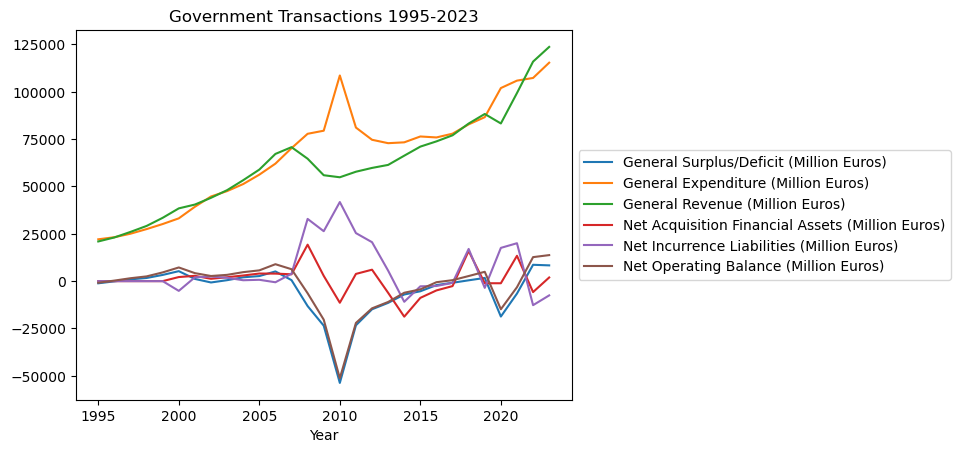

In [111]:
ax = GFA01.plot(x='Year', 
                y=['General Surplus/Deficit (Million Euros)', 
                   'General Expenditure (Million Euros)',
                   'General Revenue (Million Euros)',
                   'Net Acquisition Financial Assets (Million Euros)',
                   'Net Incurrence Liabilities (Million Euros)',
                   'Net Operating Balance (Million Euros)'
                  ],
                xlabel='Year', 
                title='Government Transactions 1995-2023')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [112]:
# Filter Items
GFA01 = GFA01[['Year', 'General Surplus/Deficit (Million Euros)', 'General Expenditure (Million Euros)','Net Acquisition Financial Assets (Million Euros)']]


In [113]:
GFA01.tail()

Index  Year  General Surplus/Deficit (Million Euros)  \
24     2019                                     1695   
25     2020                                   -18704   
26     2021                                    -6565   
27     2022                                     8635   
28     2023                                     8328   

Index  General Expenditure (Million Euros)  \
24                                   86604   
25                                  101989   
26                                  105914   
27                                  107324   
28                                  115387   

Index  Net Acquisition Financial Assets (Million Euros)  
24                                                -1107  
25                                                -1118  
26                                                13389  
27                                                -5780  
28                                                 1928

## BRA 08 (Number of Enterprises)

### Import and Clean

In [114]:
# import BRA08
BRA08 = pd.read_csv('Data/CSO_BRA08_Number_Enterprises.csv', sep = ',')

In [115]:
BRA08.tail()

Statistic Label  Year                   Employment Size        County  \
99   Active Enterprises  2020  All persons engaged size classes      Limerick   
100  Active Enterprises  2020                      250 and over  All Counties   
101  Active Enterprises  2020                      250 and over        Dublin   
102  Active Enterprises  2020                      250 and over          Cork   
103  Active Enterprises  2020                      250 and over      Limerick   

       UNIT  VALUE  
99   Number   9497  
100  Number    666  
101  Number    413  
102  Number     56  
103  Number     14

In [116]:
print(BRA08['UNIT'].unique())
print(BRA08['Statistic Label'].unique())


['Number']
['Active Enterprises']


### Graphs

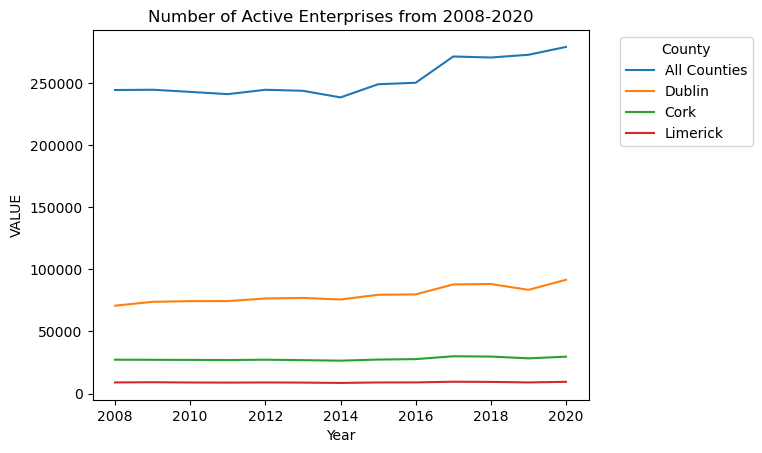

In [117]:
# Number of Active Enterprises from 2008-2020
sns.lineplot(data=BRA08[(BRA08['Employment Size'] == 'All persons engaged size classes')],
              x='Year', 
              y='VALUE', 
              hue='County')
plt.xlabel('Year')
plt.title('Number of Active Enterprises from 2008-2020')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

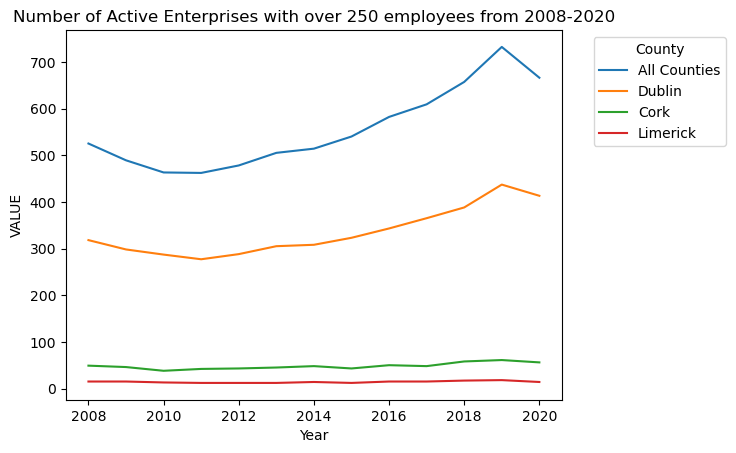

In [118]:
# Number of Active Enterprises with over 250 employees from 2008-2020
sns.lineplot(data=BRA08[(BRA08['Employment Size'] == '250 and over')],
              x='Year', 
              y='VALUE', 
              hue='County')
plt.xlabel('Year')
plt.title('Number of Active Enterprises with over 250 employees from 2008-2020')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Filtering & Cleaning 2.0

In [119]:
# Filter Counties
BRA08 = BRA08[BRA08['County'].isin(['All Counties', 'Dublin'])]

In [120]:
BRA08.head()

Statistic Label  Year                   Employment Size        County  \
0  Active Enterprises  2008  All persons engaged size classes  All Counties   
1  Active Enterprises  2008  All persons engaged size classes        Dublin   
4  Active Enterprises  2008                      250 and over  All Counties   
5  Active Enterprises  2008                      250 and over        Dublin   
8  Active Enterprises  2009  All persons engaged size classes  All Counties   

     UNIT   VALUE  
0  Number  244195  
1  Number   70743  
4  Number     525  
5  Number     318  
8  Number  244428

In [121]:
#BRA08 transpose Component column
BRA08 = BRA08.pivot_table(index = ['Year'], columns = ['Employment Size', 'County'], values = 'VALUE').reset_index()

In [122]:
BRA08.columns = ['_'.join(col).strip() for col in BRA08.columns.values]

In [123]:
# Change column names
BRA08 = BRA08.rename(columns = {'Year_':'Year',
                                '250 and over_All Counties': 'Enterprises_Ireland_250+',
                                '250 and over_Dublin': 'Enterprises_Dublin_250+',
                                'All persons engaged size classes_All Counties': 'Enterprises_Ireland',
                                'All persons engaged size classes_Dublin': 'Enterprises_Dublin'})

In [124]:
BRA08.head()

Year  Enterprises_Ireland_250+  Enterprises_Dublin_250+  \
0  2008                       525                      318   
1  2009                       489                      298   
2  2010                       463                      287   
3  2011                       462                      277   
4  2012                       478                      288   

   Enterprises_Ireland  Enterprises_Dublin  
0               244195               70743  
1               244428               73833  
2               242692               74392  
3               240880               74421  
4               244394               76547

# OECD Datasets

## OECD 1 (Country, Sex, Employment)

### Import and Clean

In [125]:
# import OECD 1
OECD1 = pd.read_csv('Data/OECD_1_Sex_Employment.csv', sep = ',')

In [126]:
OECD1.head(n=5)

COUNTRY    Country BIRTH Place of birth GENDER Gender    RATE  \
0     AUS  Australia    FB   Foreign-born    MEN    Men  N_RATE   
1     AUS  Australia    FB   Foreign-born    MEN    Men  N_RATE   
2     AUS  Australia    FB   Foreign-born    MEN    Men  N_RATE   
3     AUS  Australia    FB   Foreign-born    MEN    Men  N_RATE   
4     AUS  Australia    FB   Foreign-born    MEN    Men  N_RATE   

              Rate  YEAR  Year Unit Code        Unit  PowerCode Code  \
0  Employment rate  2000  2000        PC  Percentage               0   
1  Employment rate  2001  2001        PC  Percentage               0   
2  Employment rate  2002  2002        PC  Percentage               0   
3  Employment rate  2003  2003        PC  Percentage               0   
4  Employment rate  2004  2004        PC  Percentage               0   

  PowerCode  Reference Period Code  Reference Period  Value  Flag Codes  Flags  
0     Units                    NaN               NaN   74.0         NaN    NaN  
1     Units                    NaN               NaN   73.9         NaN    NaN  
2     Units                    NaN               NaN   74.0         NaN    NaN  
3     Units                    NaN               NaN   74.1         NaN    NaN  
4     Units                    NaN               NaN   75.6         NaN    NaN

In [127]:
# select columns from OECD 1
OECD1 = OECD1[['Year', 'Country', 'Place of birth', 'Gender', 'Rate', 'Value']]

In [128]:
#OECD1 rename column
OECD1 = OECD1.rename(columns = {'Place of birth': 'Place_of_Birth'})

In [129]:
#OECD1 transpose Rate column
OECD1 = OECD1.pivot_table(index = ['Year', 'Country', 'Place_of_Birth', 'Gender'], columns = 'Rate', values = 'Value').reset_index()

In [130]:
# Name of first column to 'Index'
OECD1.columns.name = 'Index'

In [131]:
OECD1.head(n=5)

Index  Year    Country Place_of_Birth Gender  Employment rate  \
0      2000  Australia   Foreign-born    Men             74.0   
1      2000  Australia   Foreign-born  Total             64.4   
2      2000  Australia   Foreign-born  Women             54.7   
3      2000  Australia    Native-born    Men             78.6   
4      2000  Australia    Native-born  Total             71.2   

Index  Participation rate  Unemployment rate  
0                    79.1                6.5  
1                    69.0                6.7  
2                    58.7                6.9  
3                    84.1                6.6  
4                    76.0                6.3

In [132]:
OECD1['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Czechia', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Norway',
       'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'United Kingdom', 'United States',
       'New Zealand', 'OECD - Total', 'Mexico', 'Chile', 'Canada',
       'Türkiye', 'Israel', 'Latvia', 'Lithuania'], dtype=object)

In [282]:
European_countries = ['Austria', 'Belgium', 'Czechia', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Italy', 'Luxembourg', 'Netherlands', 'Norway',
       'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'United Kingdom', 'Latvia', 'Lithuania']

WestEuropean_countries = ['Austria', 'Belgium', 'Denmark', 'France', 'Germany',
       'Luxembourg', 'Netherlands', 'Switzerland', 'United Kingdom']

In [281]:
# european average of unemployment from European_countries
OECD1_Europe = OECD1[OECD1['Country'].isin(European_countries)]
OECD1_WestEurope = OECD1[OECD1['Country'].isin(WestEuropean_countries)]


### Graphs

#### Native Irish

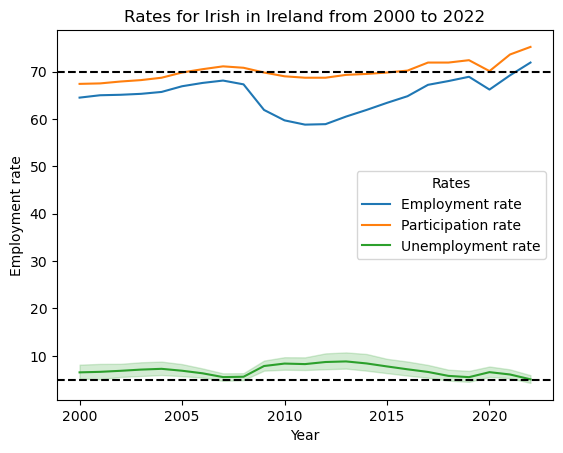

In [278]:
# Rates Native Irish
sns.lineplot(data=OECD1[(OECD1['Country'] == 'Ireland') & (OECD1['Place_of_Birth'] == 'Native-born') & (OECD1['Gender'] == 'Total')], 
             x='Year', y='Employment rate', label='Employment rate')
sns.lineplot(data=OECD1[(OECD1['Country'] == 'Ireland') & (OECD1['Place_of_Birth'] == 'Native-born') & (OECD1['Gender'] == 'Total')], 
             x='Year', y='Participation rate', label='Participation rate')
sns.lineplot(data=OECD1[(OECD1['Place_of_Birth'] == 'Native-born') & (OECD1['Gender'] == 'Total')], 
             x='Year', y='Unemployment rate', label='Unemployment rate')
plt.axhline(y=70, color='black', linestyle='--')
plt.axhline(y=5, color='black', linestyle='--')
plt.xlabel('Year')
plt.title('Rates for Irish in Ireland from 2000 to 2022')
plt.legend(title='Rates')
plt.show()

#### Irish and Other Countries

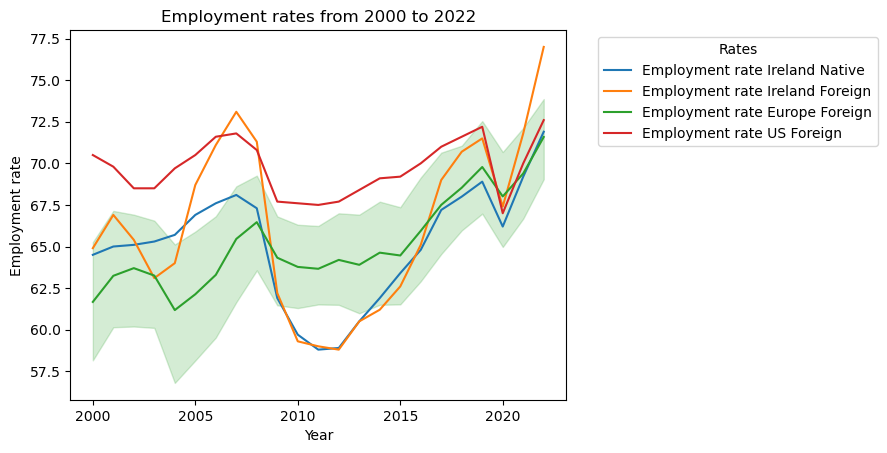

In [295]:
# Rates Native Irish
sns.lineplot(data=OECD1[(OECD1['Country'] == 'Ireland') & (OECD1['Place_of_Birth'] == 'Native-born') & (OECD1['Gender'] == 'Total')], 
             x='Year', y='Employment rate', label='Employment rate Ireland Native')
sns.lineplot(data=OECD1[(OECD1['Country'] == 'Ireland') & (OECD1['Place_of_Birth'] == 'Foreign-born') & (OECD1['Gender'] == 'Total')], 
             x='Year', y='Employment rate', label='Employment rate Ireland Foreign')
sns.lineplot(data=OECD1_Europe[(OECD1_Europe['Place_of_Birth'] == 'Foreign-born') & (OECD1_Europe['Gender'] == 'Total')], 
             x='Year', y='Employment rate', label='Employment rate Europe Foreign')
sns.lineplot(data=OECD1[(OECD1['Country'] == 'United States')  & (OECD1['Place_of_Birth'] == 'Foreign-born') & (OECD1['Gender'] == 'Total')], 
             x='Year', y='Employment rate', label='Employment rate US Foreign')
plt.xlabel('Year')
plt.title('Employment rates from 2000 to 2022')
plt.legend(title='Rates', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

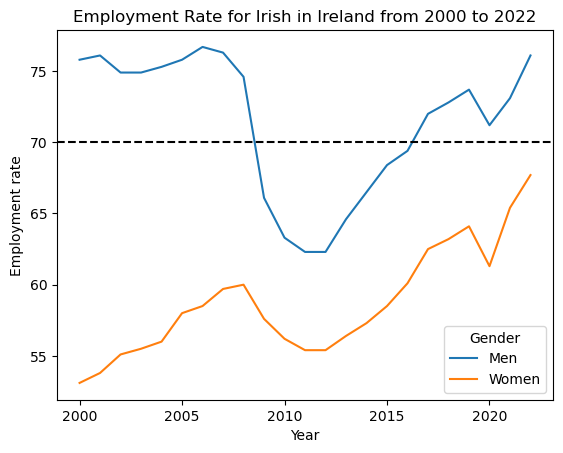

In [134]:
# Employment Rate Native Irish by Gender
sns.lineplot(data=OECD1[(OECD1['Country'] == 'Ireland') & (OECD1['Place_of_Birth'] == 'Native-born') & (OECD1['Gender'] != 'Total')], 
             x='Year', y='Employment rate', hue='Gender')
plt.axhline(y=70, color='black', linestyle='--')
plt.xlabel('Year')
plt.title('Employment Rate for Irish in Ireland from 2000 to 2022')
plt.legend(title='Gender')
plt.show()

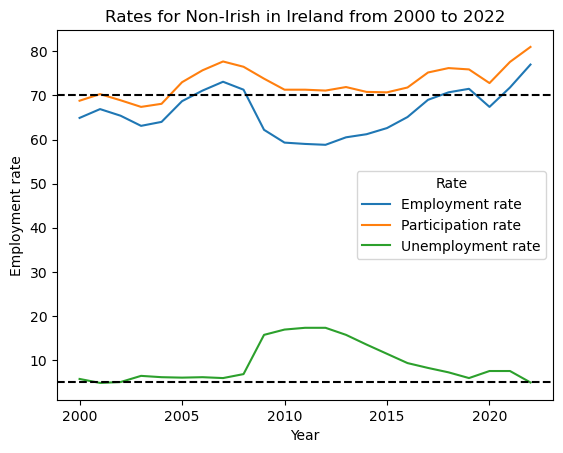

In [135]:
# Rates Foreign Irish
sns.lineplot(data=OECD1[(OECD1['Country'] == 'Ireland') & (OECD1['Place_of_Birth'] == 'Foreign-born') & (OECD1['Gender'] == 'Total')], 
             x='Year', y='Employment rate', label='Employment rate')
sns.lineplot(data=OECD1[(OECD1['Country'] == 'Ireland') & (OECD1['Place_of_Birth'] == 'Foreign-born') & (OECD1['Gender'] == 'Total')], 
             x='Year', y='Participation rate', label='Participation rate')
sns.lineplot(data=OECD1[(OECD1['Country'] == 'Ireland') & (OECD1['Place_of_Birth'] == 'Foreign-born') & (OECD1['Gender'] == 'Total')], 
             x='Year', y='Unemployment rate', label='Unemployment rate')
plt.axhline(y=70, color='black', linestyle='--')
plt.axhline(y=5, color='black', linestyle='--')
plt.xlabel('Year')
plt.title('Rates for Non-Irish in Ireland from 2000 to 2022')
plt.legend(title='Rate')
plt.show()

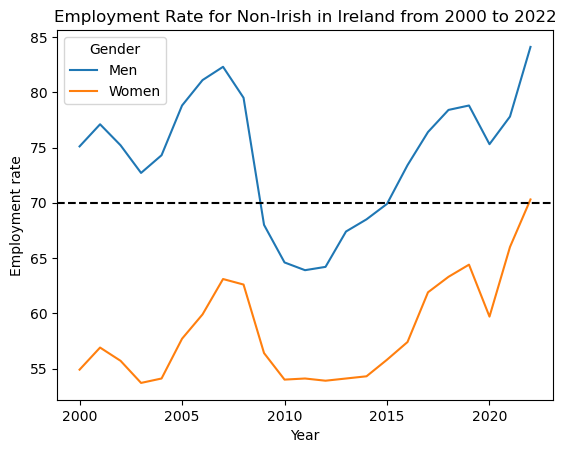

In [136]:
# Employment Rate Foreign Irish by Gender
sns.lineplot(data=OECD1[(OECD1['Country'] == 'Ireland') & (OECD1['Place_of_Birth'] == 'Foreign-born') & (OECD1['Gender'] != 'Total')], 
             x='Year', y='Employment rate', hue='Gender')
plt.axhline(y=70, color='black', linestyle='--')
plt.xlabel('Year')
plt.title('Employment Rate for Non-Irish in Ireland from 2000 to 2022')
plt.legend(title='Gender')
plt.show()

#### Foreign Irish

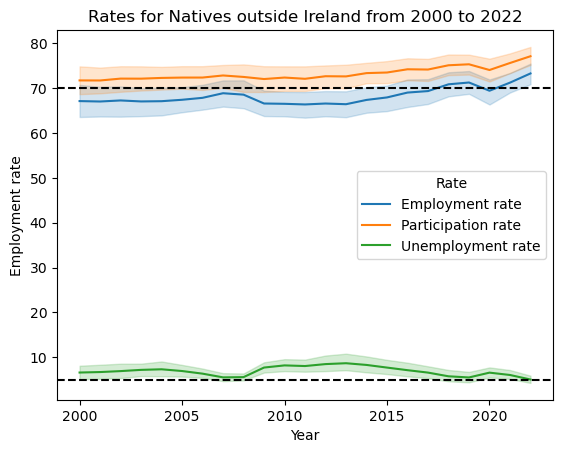

In [137]:
# Rates Native Foreigners Average
sns.lineplot(data=OECD1[(OECD1['Country'] != 'OECD - Total') & (OECD1['Country'] != 'Ireland') & (OECD1['Place_of_Birth'] == 'Native-born') & (OECD1['Gender'] == 'Total')], 
             x='Year', y='Employment rate', label='Employment rate')
sns.lineplot(data=OECD1[(OECD1['Country'] != 'OECD - Total') & (OECD1['Country'] != 'Ireland') & (OECD1['Place_of_Birth'] == 'Native-born') & (OECD1['Gender'] == 'Total')], 
             x='Year', y='Participation rate', label='Participation rate')
sns.lineplot(data=OECD1[(OECD1['Country'] != 'OECD - Total') & (OECD1['Country'] != 'Ireland') & (OECD1['Place_of_Birth'] == 'Native-born') & (OECD1['Gender'] == 'Total')], 
             x='Year', y='Unemployment rate', label='Unemployment rate')
plt.axhline(y=70, color='black', linestyle='--')
plt.axhline(y=5, color='black', linestyle='--')
plt.xlabel('Year')
plt.title('Rates for Natives outside Ireland from 2000 to 2022')
plt.legend(title='Rate')
plt.show()

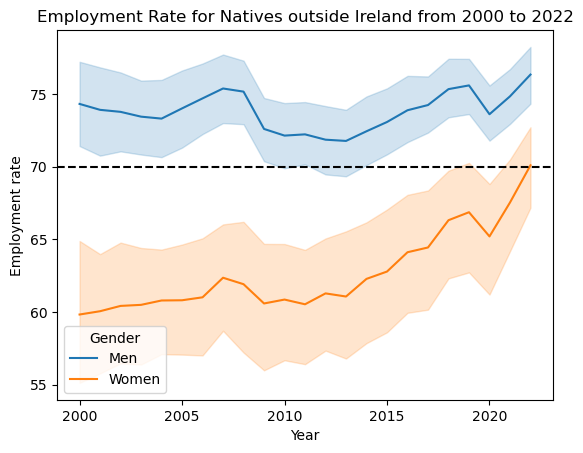

In [138]:
# Employment Rate Native Foreigners by Gender
sns.lineplot(data=OECD1[(OECD1['Country'] != 'OECD - Total') & (OECD1['Country'] != 'Ireland') & (OECD1['Place_of_Birth'] == 'Native-born') & (OECD1['Gender'] != 'Total')], 
             x='Year', y='Employment rate', hue='Gender')
plt.axhline(y=70, color='black', linestyle='--')
plt.xlabel('Year')
plt.title('Employment Rate for Natives outside Ireland from 2000 to 2022')
plt.legend(title='Gender')
plt.show()

#### Native Canadians

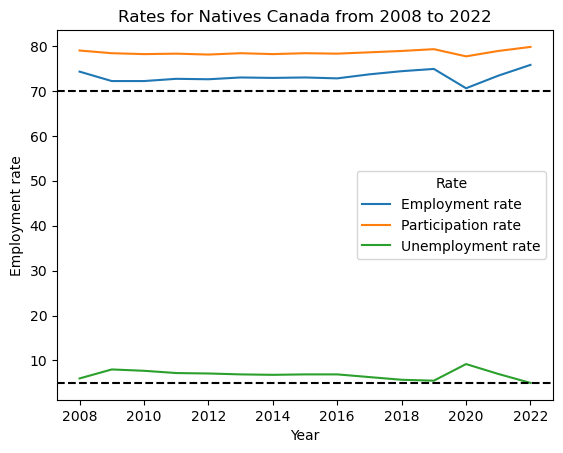

In [139]:
# Rates Native Canadians Average
sns.lineplot(data=OECD1[(OECD1['Country'] == 'Canada') & (OECD1['Place_of_Birth'] == 'Native-born') & (OECD1['Gender'] == 'Total')], 
             x='Year', y='Employment rate', label='Employment rate')
sns.lineplot(data=OECD1[(OECD1['Country'] == 'Canada') & (OECD1['Place_of_Birth'] == 'Native-born') & (OECD1['Gender'] == 'Total')], 
             x='Year', y='Participation rate', label='Participation rate')
sns.lineplot(data=OECD1[(OECD1['Country'] == 'Canada') & (OECD1['Place_of_Birth'] == 'Native-born') & (OECD1['Gender'] == 'Total')], 
             x='Year', y='Unemployment rate', label='Unemployment rate')
plt.axhline(y=70, color='black', linestyle='--')
plt.axhline(y=5, color='black', linestyle='--')
plt.xlabel('Year')
plt.title('Rates for Natives Canada from 2008 to 2022')
plt.legend(title='Rate')
plt.show()

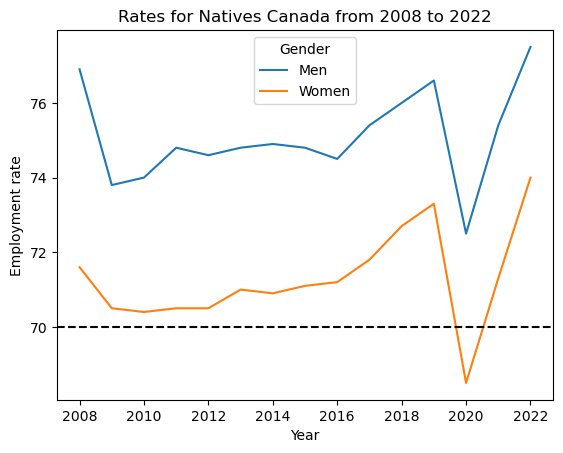

In [140]:
# Employment Rate Native Canadians by Gender
sns.lineplot(data=OECD1[(OECD1['Country'] == 'Canada') & (OECD1['Place_of_Birth'] == 'Native-born') & (OECD1['Gender'] != 'Total')], 
             x='Year', y='Employment rate', hue='Gender')
plt.axhline(y=70, color='black', linestyle='--')
plt.xlabel('Year')
plt.title('Rates for Natives Canada from 2008 to 2022')
plt.legend(title='Gender')
plt.show()

## OECD 2 (Immigrants, Sector)

### Import and Clean

Numbers from around Year 2000

In [141]:
# import OECD 2
OECD2 = pd.read_csv('Data/OECD_2_Immigrants_Sector.csv', sep = ',')

In [142]:
OECD2.head(n=5)

COUB Country of birth FBORN Place of birth EDU Education level SECT  \
0  AFRI           Africa     1   Foreign-born   2       ISCED 3/4    E   
1  AFRI           Africa     1   Foreign-born   2       ISCED 3/4    E   
2  AFRI           Africa     1   Foreign-born   2       ISCED 3/4    E   
3  AFRI           Africa     1   Foreign-born   2       ISCED 3/4    G   
4  AFRI           Africa     1   Foreign-born   2       ISCED 3/4    G   

                                              Sector      SEX            Sex  \
0                  Electricity, gas and water supply        2          Women   
1                  Electricity, gas and water supply        1            Men   
2                  Electricity, gas and water supply  ALL_SEX  Men and women   
3  Wholesale and retail trade; repair of motor ve...        2          Women   
4  Wholesale and retail trade; repair of motor ve...        1            Men   

   COU Country of residence  Value  Flag Codes  Flags  
0  IRL              Ireland      3         NaN    NaN  
1  IRL              Ireland      3         NaN    NaN  
2  IRL              Ireland      6         NaN    NaN  
3  IRL              Ireland    131         NaN    NaN  
4  IRL              Ireland    217         NaN    NaN

In [143]:
# Check unique values Country of Residence
OECD2['Country of residence'].unique()
# only people living in Ireland

array(['Ireland'], dtype=object)

In [144]:
# select columns from OECD 2
OECD2 = OECD2[['Country of birth', 'Education level', 'Sector', 'Sex', 'Value']]

In [145]:
#OECD2 rename columns
OECD2 = OECD2.rename(columns = {'Country of birth': 'Continent_of_Birth','Education level': 'Education_Level', 'Sex': 'Gender'})

In [146]:
OECD2.head(n=5)

Continent_of_Birth Education_Level  \
0             Africa       ISCED 3/4   
1             Africa       ISCED 3/4   
2             Africa       ISCED 3/4   
3             Africa       ISCED 3/4   
4             Africa       ISCED 3/4   

                                              Sector         Gender  Value  
0                  Electricity, gas and water supply          Women      3  
1                  Electricity, gas and water supply            Men      3  
2                  Electricity, gas and water supply  Men and women      6  
3  Wholesale and retail trade; repair of motor ve...          Women    131  
4  Wholesale and retail trade; repair of motor ve...            Men    217

In [147]:
# Check unique values Country of Birth
OECD2['Continent_of_Birth'].unique()
# Continents and All countries

# OECD2['Country_of_Birth'] != 'All countries of birth' & OECD2['Country_of_Birth'] != 'Other and unknown places of birth'

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South and Central America and Caribbean',
       'Other and unknown places of birth', 'All countries of birth'],
      dtype=object)

In [148]:
# change South and Central America and Caribbean to S&C America and Caribbean
OECD2.loc[OECD2['Continent_of_Birth'] == 'South and Central America and Caribbean', 'Continent_of_Birth'] = 'S&C America & Caribbean'

In [149]:
OECD2_Continents = OECD2[(OECD2['Continent_of_Birth'] != 'All countries of birth') & (OECD2['Continent_of_Birth'] != 'Other and unknown places of birth')]

In [150]:
# Check unique values Education Level & Sector
print(OECD2['Education_Level'].unique())
# no education and three levels of education

print(OECD2['Sector'].unique())
print(len(OECD2['Sector'].unique()))
# 18 sectors
# find out which sectors important to look at --> which sectors have most migration around current years

# OECD2['Sector'] == 'Financial intermediation' & OECD2['Sector'] == 'Real estate, renting and business activities' & OECD2['Sector'] == 'Transport, storage and communications' 

['ISCED 3/4' 'Unknown education' 'ISCED 0/1/2' 'ISCED 5/6'
 'All levels of education']
['Electricity, gas and water supply'
 'Wholesale and retail trade; repair of motor vehicles, motorcycles and personal and household goods'
 'Hotels and restaurants'
 'Public administration and defence; compulsory social security'
 'Extra-territorial organizations and bodies' 'Construction'
 'Financial intermediation' 'Mining and quarrying' 'Education'
 'Manufacturing' 'Other community, social and personal service activities'
 'Private households with employed persons'
 'Transport, storage and communications' 'Agriculture and fishing'
 'Real estate, renting and business activities' 'Health and social work'
 'Unknown' 'All sectors']
18


### Graphs

<Axes: xlabel='Value', ylabel='Sector'>

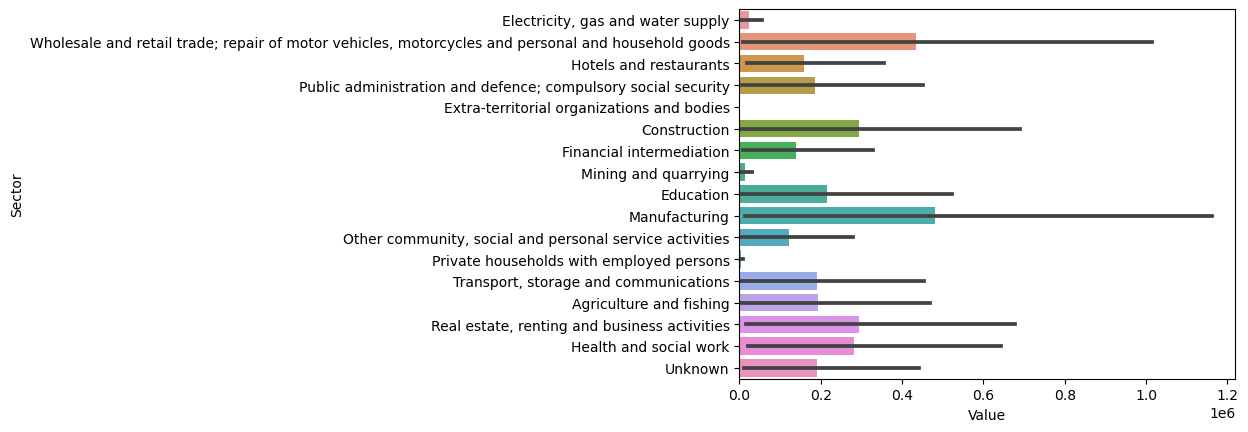

In [151]:
# average value for each sector
sns.barplot(data=OECD2_Continents[(OECD2_Continents['Sector'] != 'All sectors') & (OECD2_Continents['Education_Level'] == 'All levels of education') & (OECD2_Continents['Gender'] == 'Men and women')], 
             y='Sector', x='Value', estimator=sum)

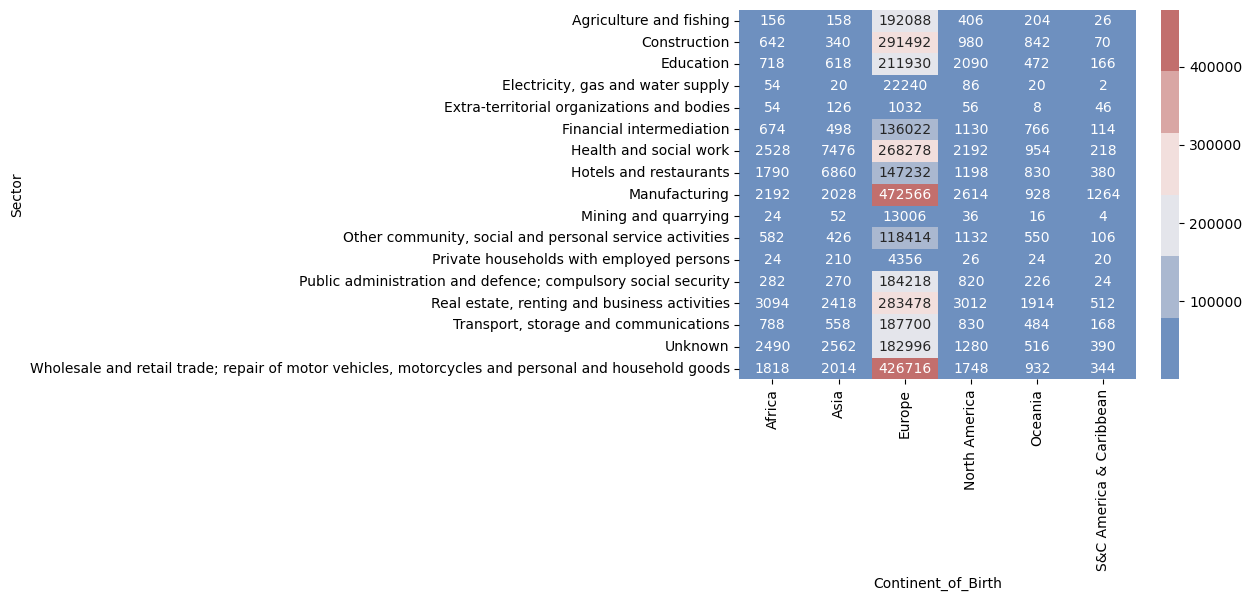

In [152]:
# Table overview per sector and continent
# Calculate sum of 'Value' column for each sector within each continent
table_data = OECD2_Continents[(OECD2_Continents['Sector'] != 'All sectors') & 
                              (OECD2_Continents['Education_Level'] == 'All levels of education') & 
                              (OECD2_Continents['Gender'] == 'Men and women')].pivot_table(
                                  index='Sector', columns='Continent_of_Birth', values='Value', aggfunc='sum')

# Generate a different color palette for each continent
palette = sns.color_palette("vlag", len(table_data.columns))

# Create a heatmap with numbers displayed in each cell and separate color scales per continent
sns.heatmap(table_data, cmap=palette, annot=True, fmt='.0f')

plt.show()

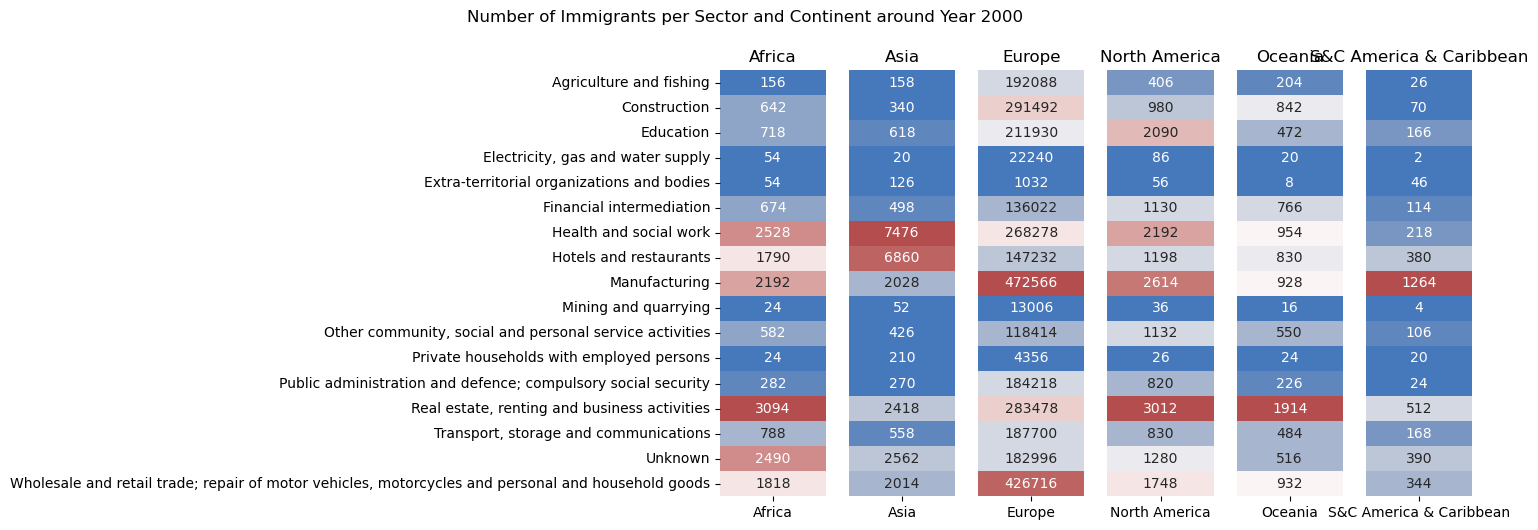

In [153]:
# numbers per Continent per Sector

# Calculate sum of 'Value' column for each sector within each continent
table_data = OECD2_Continents[(OECD2_Continents['Sector'] != 'All sectors') & 
                              (OECD2_Continents['Education_Level'] == 'All levels of education') & 
                              (OECD2_Continents['Gender'] == 'Men and women')].pivot_table(
                                  index='Sector', columns='Continent_of_Birth', values='Value', aggfunc='sum')

# Create an empty list to store color palettes
palettes = []

# Iterate over the columns (continents) and generate a unique color palette for each
for column in table_data.columns:
    palette = sns.color_palette("vlag", n_colors=len(table_data[column]))
    palettes.append(palette)

# Set figure size
plt.figure(figsize=(15, 5))

# Create a separate heatmap for each column with a different color palette
for i, (column, palette) in enumerate(zip(table_data.columns, palettes), 1):
    ax = plt.subplot(1, len(table_data.columns), i)
    if i == 1:
        sns.heatmap(table_data[[column]], cmap=palette, annot=True, fmt='.0f', cbar=False, yticklabels=True, ax=ax)
    else:
        sns.heatmap(table_data[[column]], cmap=palette, annot=True, fmt='.0f', cbar=False, yticklabels=False, ax=ax)
    plt.title(column)
    plt.yticks(rotation=0)  # Rotate y-axis tick labels for readability
    ax.set_xlabel('')  # Remove x label
    ax.set_ylabel('')  # Remove y label

plt.tight_layout()  # Adjust spacing between subplots
plt.suptitle("Number of Immigrants per Sector and Continent around Year 2000", y=1.05)
plt.show()



# Most people coming to ireland for
# Real estate, renting and business activities (Africa, North America, Oceania), 
# Manufacturing (Europe, South & Central America and Carribbean) and
# and Health and social work (Asia)
# (and wholesale)


## OECD 3 (Income Tax Married100 w 2 Children)

### Import and Clean

In [154]:
# import OECD3
OECD3 = pd.read_csv('Data/OECD_3_Income_Tax_Married100_2Children.csv', sep = ',')

In [155]:
OECD3.head()
# want: percentage Average income tax rate (% gross wage earnings)


INDICATOR                                          Indicator  FAM_TYPE  \
0       5_1  Total gross earnings before taxes in US dollar...  MARRIED2   
1       5_1  Total gross earnings before taxes in US dollar...  MARRIED2   
2       5_1  Total gross earnings before taxes in US dollar...  MARRIED2   
3       5_1  Total gross earnings before taxes in US dollar...  MARRIED2   
4       5_1  Total gross earnings before taxes in US dollar...  MARRIED2   

                                      Household type  COU    Country   YEA  \
0  Two-earner married couple, one at 100% of aver...  AUS  Australia  2000   
1  Two-earner married couple, one at 100% of aver...  AUS  Australia  2001   
2  Two-earner married couple, one at 100% of aver...  AUS  Australia  2002   
3  Two-earner married couple, one at 100% of aver...  AUS  Australia  2003   
4  Two-earner married couple, one at 100% of aver...  AUS  Australia  2004   

   Year Unit Code       Unit  PowerCode Code PowerCode  Reference Period Code  \
0  2000       USD  US Dollar               0     Units                    NaN   
1  2001       USD  US Dollar               0     Units                    NaN   
2  2002       USD  US Dollar               0     Units                    NaN   
3  2003       USD  US Dollar               0     Units                    NaN   
4  2004       USD  US Dollar               0     Units                    NaN   

   Reference Period         Value  Flag Codes  Flags  
0               NaN  52616.675635         NaN    NaN  
1               NaN  54084.089270         NaN    NaN  
2               NaN  56595.254697         NaN    NaN  
3               NaN  59102.782366         NaN    NaN  
4               NaN  61459.639570         NaN    NaN

In [156]:
# check unique
print(OECD3['Unit'].unique())
print(OECD3['Household type'].unique())

['US Dollar' 'Percentage' 'Australian Dollar' 'Euro' 'Canadian Dollar'
 'Czech Koruna' 'Danish Krone' 'Forint' 'Iceland Krona' 'Yen' 'Won'
 'Mexican Peso' 'New Zealand Dollar' 'Norwegian Krone' 'Zloty'
 'Swedish Krona' 'Swiss Franc' 'Turkish Lira' 'Pound Sterling'
 'Chilean Peso' 'New Israeli Sheqel' nan 'Colombian Peso'
 'Costa Rican Colon']
['Two-earner married couple, one at 100% of average earnings and the other at 67%, with two children'
 'Single person at 167% of average earnings, without child'
 'Single person at 100% of average earnings, without child'
 'Single person at 67% of average earnings, with two children'
 'Two-earner married couple, one at 100% of average earnings and the other at 67%, without child'
 'One-earner married couple at 100% of average earnings, with two children'
 'Two-earner married couple, one at 100% of average earnings and the other at 100%, with two children'
 'Single person at 67% of average earnings, without child']


In [157]:
print(OECD3['Country'].unique())

['Australia' 'Austria' 'Belgium' 'Canada' 'Czechia' 'Denmark' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan'
 'Korea' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand' 'Norway'
 'Poland' 'Portugal' 'Slovak Republic' 'Spain' 'Sweden' 'Switzerland'
 'Türkiye' 'United Kingdom' 'United States' 'Chile' 'Estonia' 'Israel'
 'Slovenia' 'OECD - Average' 'Latvia' 'European Union 22 members in OECD'
 'Lithuania' 'Colombia' 'Costa Rica']


In [158]:
print(OECD3['Indicator'].unique())

['Total gross earnings before taxes in US dollars using PPP exchange rates'
 'Marginal tax wedge: Principal earner (% labour costs)'
 'Net income after taxes in national currency'
 'Net personal average tax rate (% gross wage earnings)'
 "Average rate of employees' social security contributions (% gross wage earnings)"
 'Increase in net income after an increase of 1 currency unit in gross wages'
 'Total gross labour costs before taxes in US dollars using PPP exchange rates'
 'Total gross earnings before taxes in national currency'
 "Average rate of income tax and employees' social security contributions (% gross wage earnings)"
 'Increase in net income after an increase of 1 currency unit in gross labour cost'
 'Net personal marginal tax rate: Principal earner (% gross wage earnings)'
 'Average income tax rate (% gross wage earnings)'
 'Net income after taxes in US dollars using PPP exchange rates'
 "Average rate of employer's social security contributions (% gross wage earnings)"
 'Av

In [159]:
OECD3 = OECD3[OECD3['Country'].isin(["Ireland", 
                                     "European Union 22 members in OECD", 
                                     "OECD - Average", 
                                     "United States", 
                                     "United Kingdom"])]

In [160]:
OECD3 = OECD3[OECD3['Household type'].isin(["Single person at 100% of average earnings, without child", "Two-earner married couple, one at 100% of average earnings and the other at 67%, with two children"])]

In [161]:
OECD3 = OECD3[OECD3['Unit'].isin(["Percentage"])]

In [162]:
OECD3 = OECD3[OECD3['Indicator'].isin(["Average income tax rate (% gross wage earnings)"])]

In [163]:
# Select columns
OECD3 = OECD3[['Year', 'Country', 'Household type','Value']]

In [164]:
OECD3.head() 

Year  Country                                     Household type  \
31165  2000  Ireland  Two-earner married couple, one at 100% of aver...   
31166  2001  Ireland  Two-earner married couple, one at 100% of aver...   
31167  2002  Ireland  Two-earner married couple, one at 100% of aver...   
31168  2003  Ireland  Two-earner married couple, one at 100% of aver...   
31169  2004  Ireland  Two-earner married couple, one at 100% of aver...   

           Value  
31165  19.744692  
31166  15.675248  
31167  14.082765  
31168  14.890699  
31169  15.583686

### Graphs

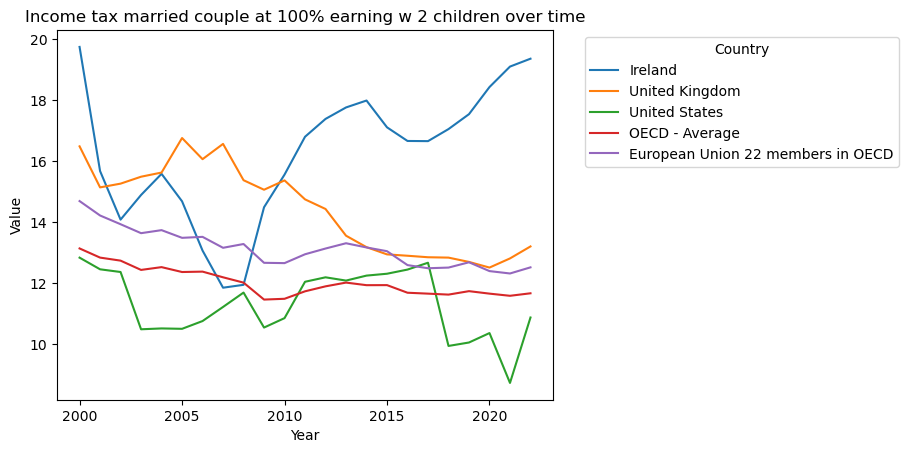

In [165]:
# Tax married couple at 100% earning w 2 children
sns.lineplot(data=OECD3[(OECD3['Household type'] == 'Two-earner married couple, one at 100% of average earnings and the other at 67%, with two children')],
              x='Year', 
              y='Value', 
              hue='Country')
plt.xlabel('Year')
plt.title('Income tax married couple at 100% earning w 2 children over time')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

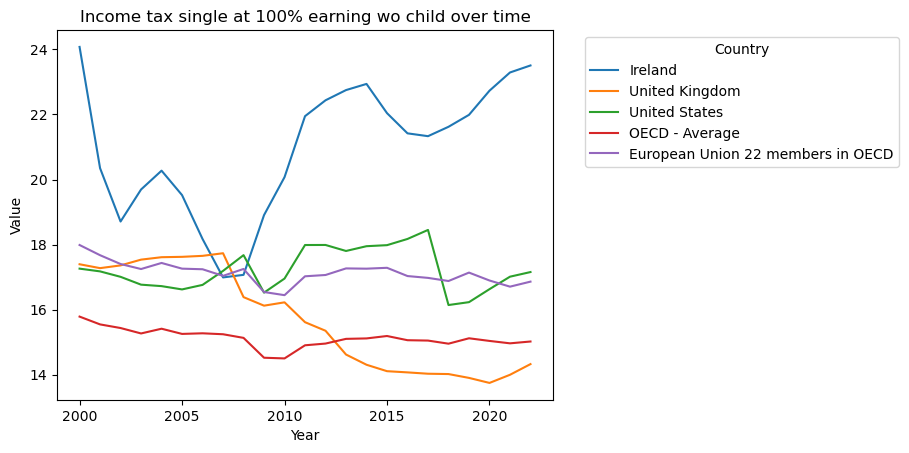

In [166]:
# Tax single at 100% earning wo child over time
sns.lineplot(data=OECD3[(OECD3['Household type'] == 'Single person at 100% of average earnings, without child')],
              x='Year', 
              y='Value', 
              hue='Country')
plt.xlabel('Year')
plt.title('Income tax single at 100% earning wo child over time')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Further Filtering

In [167]:
OECD3_2 = OECD3[OECD3['Country'].isin(["Ireland", 
                                     "European Union 22 members in OECD", 
                                     "United States", 
                                     "United Kingdom"])]

In [168]:
OECD3_2['Household type'].replace({
    "Two-earner married couple, one at 100% of average earnings and the other at 67%, with two children": "Tax Married 100% w 2 Children",
    "Single person at 100% of average earnings, without child": "Tax Single 100% wo Child"
}, inplace=True)

C:\Users\joosl\AppData\Local\Temp\ipykernel_17284\2432190941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OECD3_2['Household type'].replace({


In [169]:
OECD3_2['Country'].replace({
    "European Union 22 members in OECD": "EU in OECD"
}, inplace=True)

C:\Users\joosl\AppData\Local\Temp\ipykernel_17284\4133383591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OECD3_2['Country'].replace({


In [170]:
OECD3_2.head()

Year  Country                 Household type      Value
31165  2000  Ireland  Tax Married 100% w 2 Children  19.744692
31166  2001  Ireland  Tax Married 100% w 2 Children  15.675248
31167  2002  Ireland  Tax Married 100% w 2 Children  14.082765
31168  2003  Ireland  Tax Married 100% w 2 Children  14.890699
31169  2004  Ireland  Tax Married 100% w 2 Children  15.583686

In [171]:
#OECD3_2 transpose Component column
OECD3_2 = OECD3_2.pivot_table(index = ['Year'], columns = ['Country', 'Household type'], values = 'Value').reset_index()

In [172]:
OECD3_2.head()

Country         Year                    EU in OECD                           \
Household type       Tax Married 100% w 2 Children Tax Single 100% wo Child   
0               2000                     14.690797                17.986737   
1               2001                     14.218244                17.673126   
2               2002                     13.932074                17.402316   
3               2003                     13.638616                17.248319   
4               2004                     13.737779                17.434849   

Country                              Ireland                           \
Household type Tax Married 100% w 2 Children Tax Single 100% wo Child   
0                                  19.744692                24.076818   
1                                  15.675248                20.348832   
2                                  14.082765                18.708792   
3                                  14.890699                19.693734   
4                                  15.583686                20.272378   

Country                       United Kingdom                           \
Household type Tax Married 100% w 2 Children Tax Single 100% wo Child   
0                                  16.485056                17.395022   
1                                  15.139431                17.275557   
2                                  15.262469                17.359484   
3                                  15.489576                17.536957   
4                                  15.626080                17.611695   

Country                        United States                           
Household type Tax Married 100% w 2 Children Tax Single 100% wo Child  
0                                  12.836110                17.260230  
1                                  12.454022                17.175813  
2                                  12.365608                17.008386  
3                                  10.487830                16.767553  
4                                  10.515535                16.722431

In [173]:
OECD3_2.columns = ['_'.join(col).strip() for col in OECD3_2.columns.values]

In [174]:
# Change column names
OECD3_2 = OECD3_2.rename(columns = {'Year_':'Year'})

In [175]:
OECD3_2.head()

Year  EU in OECD_Tax Married 100% w 2 Children  \
0  2000                                 14.690797   
1  2001                                 14.218244   
2  2002                                 13.932074   
3  2003                                 13.638616   
4  2004                                 13.737779   

   EU in OECD_Tax Single 100% wo Child  Ireland_Tax Married 100% w 2 Children  \
0                            17.986737                              19.744692   
1                            17.673126                              15.675248   
2                            17.402316                              14.082765   
3                            17.248319                              14.890699   
4                            17.434849                              15.583686   

   Ireland_Tax Single 100% wo Child  \
0                         24.076818   
1                         20.348832   
2                         18.708792   
3                         19.693734   
4                         20.272378   

   United Kingdom_Tax Married 100% w 2 Children  \
0                                     16.485056   
1                                     15.139431   
2                                     15.262469   
3                                     15.489576   
4                                     15.626080   

   United Kingdom_Tax Single 100% wo Child  \
0                                17.395022   
1                                17.275557   
2                                17.359484   
3                                17.536957   
4                                17.611695   

   United States_Tax Married 100% w 2 Children  \
0                                    12.836110   
1                                    12.454022   
2                                    12.365608   
3                                    10.487830   
4                                    10.515535   

   United States_Tax Single 100% wo Child  
0                               17.260230  
1                               17.175813  
2                               17.008386  
3                               16.767553  
4                               16.722431

# Trading Economics Datasets

## TE01 (10Y Irish Bond Yields)

### Import and Clean

In [176]:
# import TE01
TE01 = pd.read_csv('Data/TE01_10Y_Bond_Yields.csv', sep = ';')

In [177]:
TE01.head()

Month  Year Ireland 10Y Bond Yield Percentage Change MoM Change MoM
0       June  1999                  4,743                   NaN        NaN
1       July  1999                  5,082           7,147375079      0,339
2     August  1999                  5,202           2,361275089       0,12
3  September  1999                  5,338           2,614379085      0,136
4    October  1999                  5,394           1,049082053      0,056

In [178]:
# remove month column and change columns
TE01 = TE01.drop(columns = ['Month', 'Percentage Change MoM', 'Change MoM'])

In [179]:
# change , to . 
TE01['Ireland 10Y Bond Yield'] = TE01['Ireland 10Y Bond Yield'].str.replace(',', '.')


In [180]:
# columns as numeric
TE01['Ireland 10Y Bond Yield'] = pd.to_numeric(TE01['Ireland 10Y Bond Yield'])

In [181]:
# Take average per year
TE01 = TE01.groupby(['Year']).mean().reset_index()

In [182]:
# Change name 1st column
TE01.columns.name = 'Index'

In [183]:
TE01['Year'] = pd.to_numeric(TE01['Year'])

In [184]:
TE01.head()

Index  Year  Ireland 10Y Bond Yield
0      1999                5.251000
1      2000                5.478000
2      2001                5.012750
3      2002                4.981250
4      2003                4.118083

### Graphs

<Axes: title={'center': 'Population Changes in Ireland from 1987 to 2023'}, xlabel='Year'>

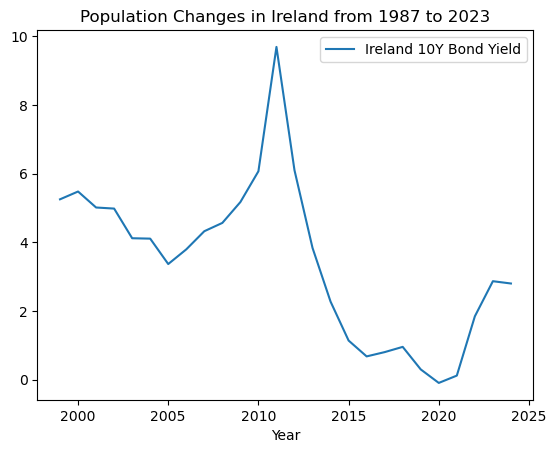

In [185]:
# 10 Year Bond Yields Ireland over Time
TE01.plot(x = 'Year', 
y = 'Ireland 10Y Bond Yield', 
xlabel='Year', 
title='Population Changes in Ireland from 1987 to 2023')

# Data World Bank Datasets

## WB01 (GDP Growth Annual %)

### Import and Clean

In [186]:
# import WB 1
WB01 = pd.read_csv('Data/WB01_GDP_Growth_Annual.csv', sep = ';')

In [187]:
WB01.head()

Year  GDP Growth (annual %)
0  1971                    3.5
1  1972                    6.5
2  1973                    4.7
3  1974                    4.3
4  1975                    5.7

### Graphs

<Axes: title={'center': 'GDP Growth in Ireland from 1971 to 2020'}, xlabel='Year'>

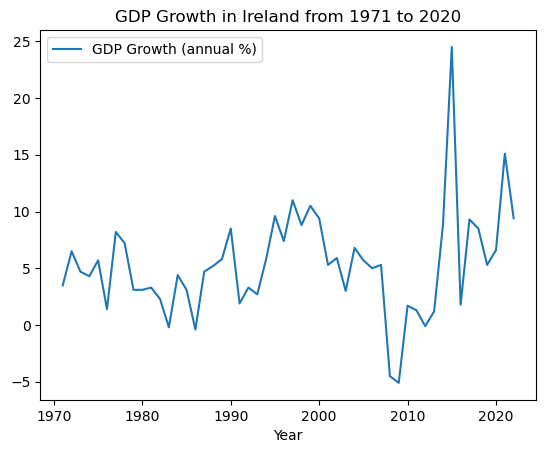

In [188]:
# Graph year and GDP Growth
WB01.plot(x='Year', y='GDP Growth (annual %)', xlabel='Year', title='GDP Growth in Ireland from 1971 to 2020')

## WB02 (GDP per Capita Growth Annual %)

### Import and Clean

In [189]:
# import WB 2
WB02 = pd.read_csv('Data/WB02_GDP_perCapita_Growth_Annual.csv', sep = ';')

In [190]:
WB02.tail()

Year  GDP per Capita Growth (Annual %)
47  2018                               7.1
48  2019                               3.9
49  2020                               5.5
50  2021                              14.0
51  2022                               7.4

### Graphs

<Axes: title={'center': 'GDP per Capita Growth in Ireland from 1971 to 2022'}, xlabel='Year'>

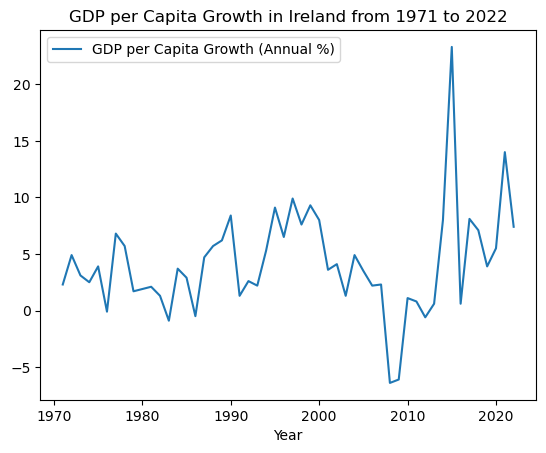

In [191]:
# Graph year and GDP Growth
WB02.plot(x='Year', y='GDP per Capita Growth (Annual %)', xlabel='Year', title='GDP per Capita Growth in Ireland from 1971 to 2022')

## WB03 (Inflation Consumer Prices Annual %)

### Import and Clean

In [192]:
# import WB 3
WB03 = pd.read_csv('Data/WB03_Inflation_Consumer_Prices_Annual.csv', sep = ';')

In [193]:
WB03.tail()

Year  Inflation Consumer Prices (Annual %)
58  2018                                   0.5
59  2019                                   0.9
60  2020                                  -0.3
61  2021                                   2.4
62  2022                                   7.8

### Graphs

<Axes: title={'center': 'Inflation Consumer Prices in Ireland from 1960 to 2022'}, xlabel='Year'>

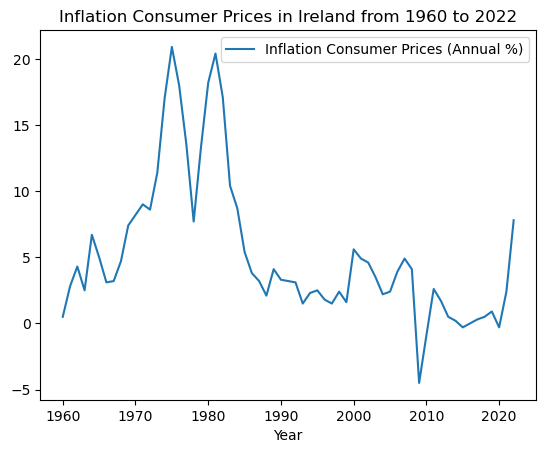

In [194]:
# Graph year and GDP Growth
WB03.plot(x='Year', y='Inflation Consumer Prices (Annual %)', xlabel='Year', title='Inflation Consumer Prices in Ireland from 1960 to 2022')

## WB04 (Inflation GDP Deflator Annual %)

### Import and Clean

In [195]:
# import WB 4
WB04 = pd.read_csv('Data/WB04_Inflation_GDP_Deflator_Annual.csv', sep = ';')

In [196]:
WB04.head()

Year  Inflation GDP Deflator (Annual %)
0  1971                               10.5
1  1972                               13.4
2  1973                               15.3
3  1974                                6.1
4  1975                               20.1

### Graphs

<Axes: title={'center': 'Inflation GDP Deflator in Ireland from 1971 to 2022'}, xlabel='Year'>

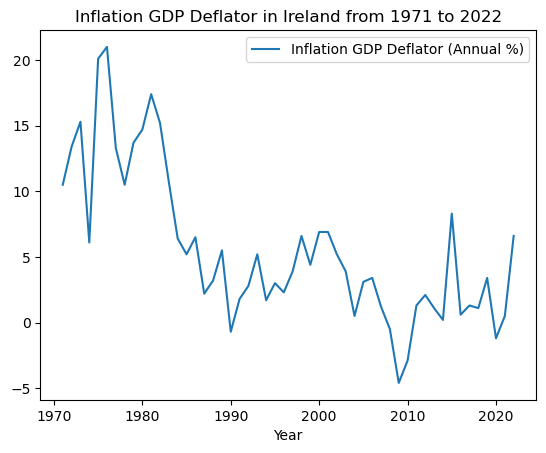

In [197]:
# Graph year and GDP Growth
WB04.plot(x='Year', y='Inflation GDP Deflator (Annual %)', xlabel='Year', title='Inflation GDP Deflator in Ireland from 1971 to 2022')

## Combined WB Datasets

In [198]:
# Combine WB01, WB02, WB03 and WB04 on Year including all years in WB03
WB = WB03.merge(WB01, on='Year', how='outer').merge(WB02, on='Year', how = 'outer').merge(WB04, on='Year', how = 'outer')
WB.head()

Year  Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
0  1960                                   0.5                    NaN   
1  1961                                   2.8                    NaN   
2  1962                                   4.3                    NaN   
3  1963                                   2.5                    NaN   
4  1964                                   6.7                    NaN   

   GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  
0                               NaN                                NaN  
1                               NaN                                NaN  
2                               NaN                                NaN  
3                               NaN                                NaN  
4                               NaN                                NaN

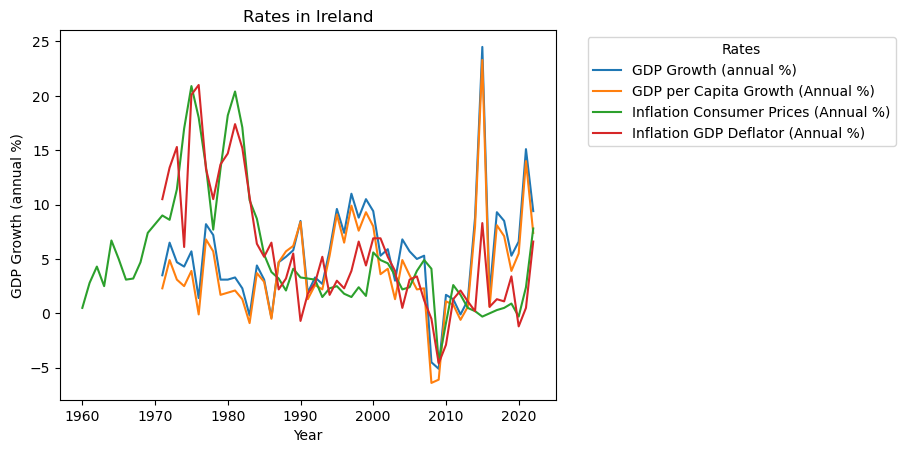

In [199]:
# graph
sns.lineplot(data=WB, 
             x='Year', y='GDP Growth (annual %)', label='GDP Growth (annual %)')
sns.lineplot(data=WB, 
             x='Year', y='GDP per Capita Growth (Annual %)', label='GDP per Capita Growth (Annual %)')
sns.lineplot(data=WB, 
             x='Year', y='Inflation Consumer Prices (Annual %)', label='Inflation Consumer Prices (Annual %)')
sns.lineplot(data=WB, 
             x='Year', y='Inflation GDP Deflator (Annual %)', label='Inflation GDP Deflator (Annual %)')
plt.xlabel('Year')
plt.title('Rates in Ireland')
plt.legend(title='Rates', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

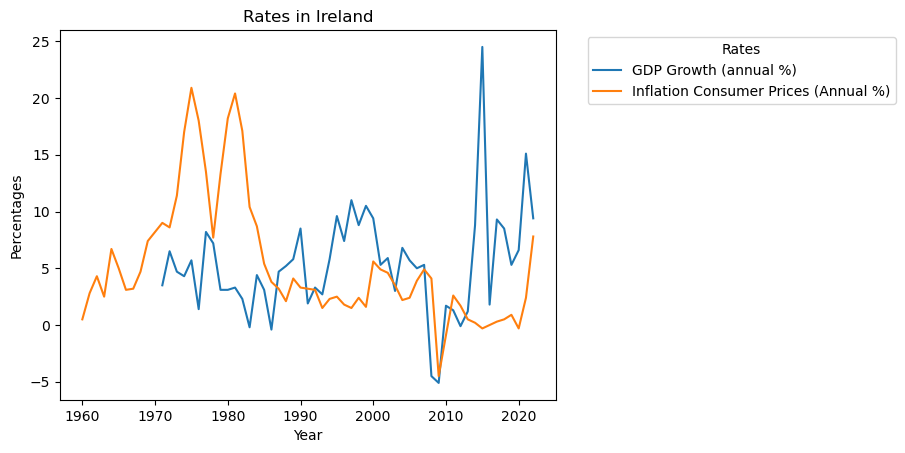

In [301]:
# graph
sns.lineplot(data=WB, 
             x='Year', y='GDP Growth (annual %)', label='GDP Growth (annual %)')
sns.lineplot(data=WB, 
             x='Year', y='Inflation Consumer Prices (Annual %)', label='Inflation Consumer Prices (Annual %)')
plt.xlabel('Year')
plt.ylabel('Percentages')
plt.title('Rates in Ireland')
plt.legend(title='Rates', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## WB05 (Population by Country)

### Import and Clean

In [200]:
# import WB 5
WB05 = pd.read_csv('Data/WB05_Population_Country.csv', sep = ',')

In [201]:
WB05.head()

Series Name  Series Code    Country Name Country Code  \
Population       total  SP.POP.TOTL     Afghanistan          AFG   
Population       total  SP.POP.TOTL         Albania          ALB   
Population       total  SP.POP.TOTL         Algeria          DZA   
Population       total  SP.POP.TOTL  American Samoa          ASM   
Population       total  SP.POP.TOTL         Andorra          AND   

           1960 [YR1960] 1961 [YR1961] 1962 [YR1962] 1963 [YR1963]  \
Population       8622466       8790140       8969047       9157465   
Population       1608800       1659800       1711319       1762621   
Population      11394307      11598608      11778260      11969451   
Population         20085         20626         21272         21949   
Population          9443         10216         11014         11839   

           1964 [YR1964] 1965 [YR1965]  ... 2014 [YR2014] 2015 [YR2015]  \
Population       9355514       9565147  ...      32716210      33753499   
Population       1814135       1864791  ...       2889104       2880703   
Population      12179099      12381256  ...      38760168      39543154   
Population         22656         23391  ...         52217         51368   
Population         12690         13563  ...         71621         71746   

           2016 [YR2016] 2017 [YR2017] 2018 [YR2018] 2019 [YR2019]  \
Population      34636207      35643418      36686784      37769499   
Population       2876101       2873457       2866376       2854191   
Population      40339329      41136546      41927007      42705368   
Population         50448         49463         48424         47321   
Population         72540         73837         75013         76343   

           2020 [YR2020] 2021 [YR2021] 2022 [YR2022] 2023 [YR2023]  
Population      38972230      40099462      41128771            ..  
Population       2837849       2811666       2777689            ..  
Population      43451666      44177969      44903225            ..  
Population         46189         45035         44273            ..  
Population         77700         79034         79824            ..  

[5 rows x 68 columns]

In [202]:
# check unique values
print(WB05['Series Name'].unique())

[' total' nan]


In [203]:
WB05 = WB05.drop(columns=['Series Name', 'Series Code', 'Country Code'])

In [204]:
# clean up column names
# Define a function to remove everything after the space
def remove_after_space(col):
    return col.split(' ')[0]

# Apply the function to all column names and rename the columns
WB05.rename(columns=remove_after_space, inplace=True)

In [205]:
# pivot columns for years
WB05 = WB05.melt(id_vars=['Country'], var_name='Year', value_name='Population')

In [206]:
print(WB05['Country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' nan 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Channel Islands' 'Chile' 'China' 'Colombia' 'Comoros' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon'
 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland' 'Grenada'
 'Guam' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 'I

In [207]:
WB05 = WB05[WB05['Country'].isin(['Ireland', 'United Kingdom', 'United States', 
'European Union', 'OECD members', 'South Asia',
'North America', 'East Asia & Pacific', 'India', 'China'])]

# South Asia: Afghanistan, Bangladesh, Bhutan, India, Maldives, Nepal, Pakistan, and Sri Lanka
# East Asia: Japan, North and South Korea, China, Mongolia, and Taiwan

In [208]:
WB05.tail()

Country  Year Population
16981  East Asia & Pacific  2023         ..
16988       European Union  2023         ..
17009        North America  2023         ..
17011         OECD members  2023         ..
17017           South Asia  2023         ..

In [209]:
# for .. put nothing
WB05['Population'] = WB05['Population'].str.replace('..', '')

In [210]:
# columns as numeric
WB05['Year'] = pd.to_numeric(WB05['Year'])
WB05['Population'] = pd.to_numeric(WB05['Population'])

### Graphs

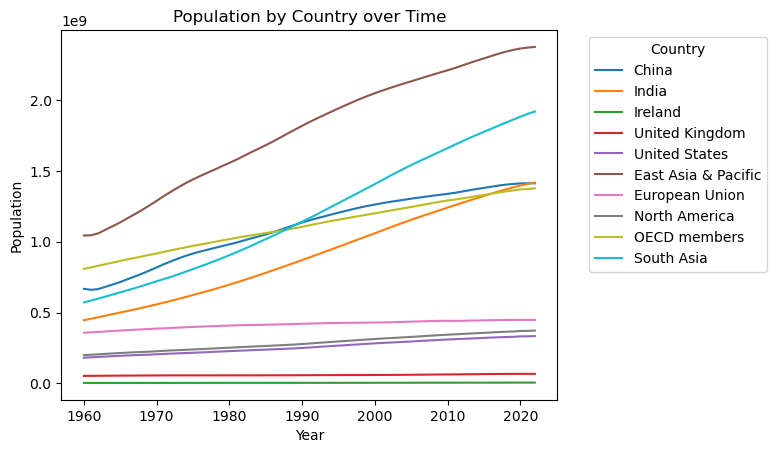

In [211]:
# Population by Country
sns.lineplot(data=WB05,
              x='Year', 
              y='Population', 
              hue='Country')
plt.xlabel('Year')
plt.title('Population by Country over Time')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [212]:
WB05 = WB05[WB05['Country'].isin(['South Asia', 'East Asia & Pacific', 'United Kingdom','Ireland','European Union'])]

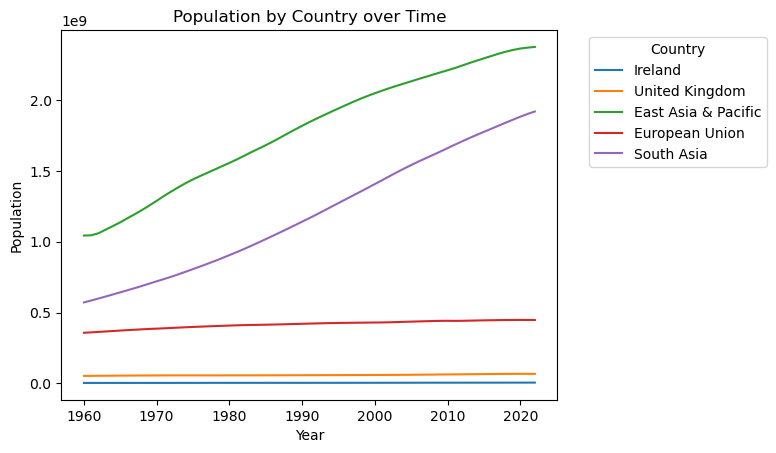

In [213]:
# Population by Country
sns.lineplot(data=WB05,
              x='Year', 
              y='Population', 
              hue='Country')
plt.xlabel('Year')
plt.title('Population by Country over Time')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

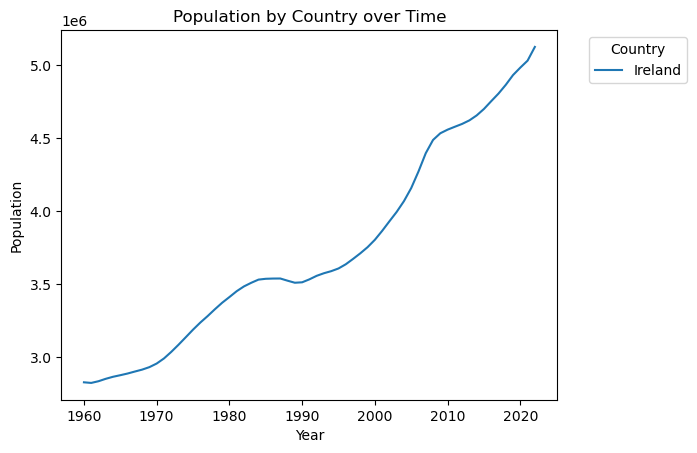

In [214]:
# Population by Country
sns.lineplot(data=WB05[(WB05['Country']=="Ireland")],
              x='Year', 
              y='Population', 
              hue='Country')
plt.xlabel('Year')
plt.title('Population by Country over Time')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


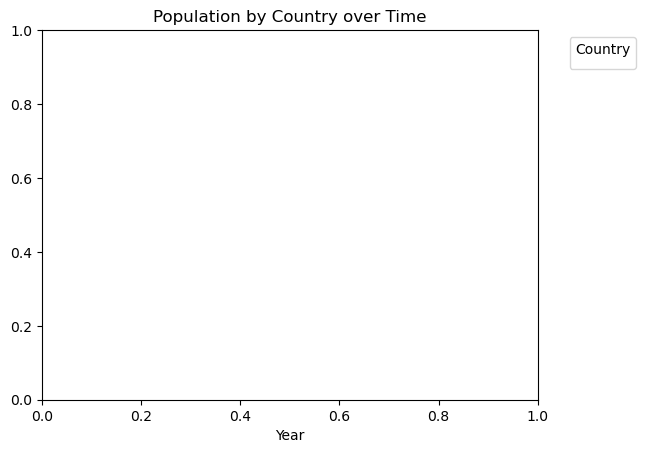

In [215]:
# Population by Country
sns.lineplot(data=WB05[(WB05['Country']=="India")],
              x='Year', 
              y='Population', 
              hue='Country')
plt.xlabel('Year')
plt.title('Population by Country over Time')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### More Cleaning

In [216]:
#WB05 transpose Component column
WB05 = WB05.pivot_table(index = ['Year'], columns = 'Country', values = 'Population').reset_index()

In [217]:
WB05.tail()

Country  Year  East Asia & Pacific  European Union    Ireland    South Asia  \
58       2018         2.341384e+09     447001100.0  4867316.0  1.840534e+09   
59       2019         2.353857e+09     447367191.0  4934340.0  1.861599e+09   
60       2020         2.363934e+09     447692315.0  4985382.0  1.882532e+09   
61       2021         2.370190e+09     447178112.0  5033164.0  1.901912e+09   
62       2022         2.375162e+09     447370510.0  5127170.0  1.919348e+09   

Country  United Kingdom  
58           66460344.0  
59           66836327.0  
60           67081234.0  
61           67026292.0  
62           66971395.0

In [218]:
for index, row in WB05.iterrows():
    Year = row['Year']
    East_Asia_Pacific = row['East Asia & Pacific']
    European_Union = row['European Union']
    Ireland = row['Ireland']
    South_Asia = row['South Asia']
    UK = row['United Kingdom']

    # Get Ireland values 
    Ireland_current_year = Ireland
    Ireland_previous_year = WB05.loc[index - 1, 'Ireland'] if index > 0 else None
    Ireland_percentage_change = (Ireland_current_year - Ireland_previous_year) / Ireland_previous_year * 100 if Ireland_previous_year else None

    # Get East Asia and Pacific values 
    East_Asia_Pacific_current_year = East_Asia_Pacific
    East_Asia_Pacific_previous_year = WB05.loc[index - 1, 'East Asia & Pacific'] if index > 0 else None
    East_Asia_Pacific_percentage_change = (East_Asia_Pacific_current_year - East_Asia_Pacific_previous_year) / East_Asia_Pacific_previous_year * 100 if East_Asia_Pacific_previous_year else None

    # Get European_Union values 
    European_Union_current_year = European_Union
    European_Union_previous_year = WB05.loc[index - 1, 'European Union'] if index > 0 else None
    European_Union_percentage_change = (European_Union_current_year - European_Union_previous_year) / European_Union_previous_year * 100 if European_Union_previous_year else None

    # Get South Asia values 
    South_Asia_current_year = South_Asia
    South_Asia_previous_year = WB05.loc[index - 1, 'South Asia'] if index > 0 else None
    South_Asia_percentage_change = (South_Asia_current_year - South_Asia_previous_year) / South_Asia_previous_year * 100 if South_Asia_previous_year else None

    # Get UK values 
    UK_current_year = UK
    UK_previous_year = WB05.loc[index - 1, 'United Kingdom'] if index > 0 else None
    UK_percentage_change = (UK_current_year - UK_previous_year) / UK_previous_year * 100 if UK_previous_year else None

    # Store to dataframe
    WB05.loc[index, 'Ireland Percentage Change'] = Ireland_percentage_change
    WB05.loc[index, 'East Asia & Pacific Percentage Change'] = East_Asia_Pacific_percentage_change
    WB05.loc[index, 'European Union Percentage Change'] = European_Union_percentage_change
    WB05.loc[index, 'South Asia Percentage Change'] = South_Asia_percentage_change
    WB05.loc[index, 'UK Percentage Change'] = UK_percentage_change


    


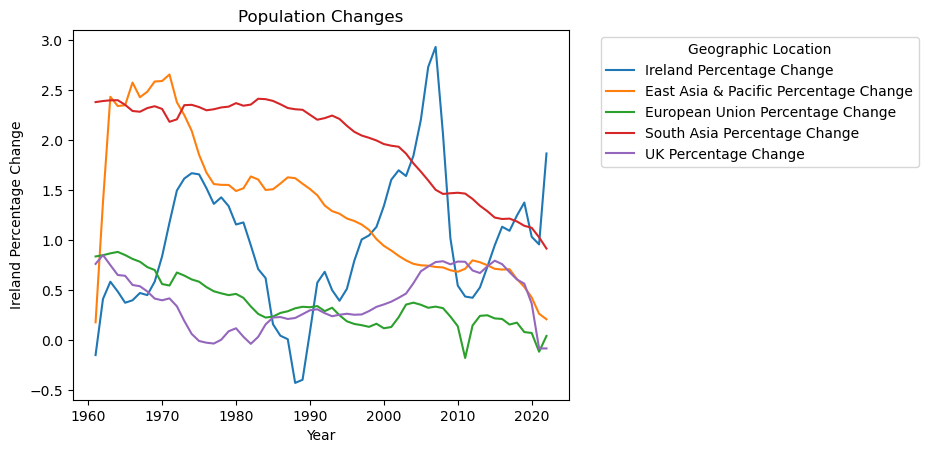

In [219]:
# graph
sns.lineplot(data=WB05, 
             x='Year', y='Ireland Percentage Change', label='Ireland Percentage Change')
sns.lineplot(data=WB05, 
             x='Year', y='East Asia & Pacific Percentage Change', label='East Asia & Pacific Percentage Change')
sns.lineplot(data=WB05, 
             x='Year', y='European Union Percentage Change', label='European Union Percentage Change')             
sns.lineplot(data=WB05, 
             x='Year', y='South Asia Percentage Change', label='South Asia Percentage Change')
sns.lineplot(data=WB05, 
             x='Year', y='UK Percentage Change', label='UK Percentage Change')
plt.xlabel('Year')
plt.title('Population Changes')
plt.legend(title='Geographic Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Combining WB with PEA15

In [220]:
# combine WB with PEA15
WB_PEA15 = PEA15.merge(WB, on='Year', how='outer')
WB_PEA15.head()

Year  Annual births  Annual deaths  Emigrants  Immigrants  \
0  1951            NaN            NaN        NaN         NaN   
1  1952            NaN            NaN        NaN         NaN   
2  1953            NaN            NaN        NaN         NaN   
3  1954            NaN            NaN        NaN         NaN   
4  1955            NaN            NaN        NaN         NaN   

   Natural increase  Net migration  Population  Population change  \
0           26600.0       -35000.0   2960600.0            -8400.0   
1           27300.0       -35000.0   2952900.0            -7700.0   
2           29100.0       -33000.0   2949000.0            -3900.0   
3           28200.0       -36000.0   2941200.0            -7800.0   
4           24700.0       -45000.0   2920900.0           -20300.0   

   Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
0                                   NaN                    NaN   
1                                   NaN                    NaN   
2                                   NaN                    NaN   
3                                   NaN                    NaN   
4                                   NaN                    NaN   

   GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  
0                               NaN                                NaN  
1                               NaN                                NaN  
2                               NaN                                NaN  
3                               NaN                                NaN  
4                               NaN                                NaN

In [221]:
WB_PEA15 = WB_PEA15.drop(['Natural increase', 'Population', 'Population change'], axis=1)
WB_PEA15.head()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
0  1951            NaN            NaN        NaN         NaN       -35000.0   
1  1952            NaN            NaN        NaN         NaN       -35000.0   
2  1953            NaN            NaN        NaN         NaN       -33000.0   
3  1954            NaN            NaN        NaN         NaN       -36000.0   
4  1955            NaN            NaN        NaN         NaN       -45000.0   

   Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
0                                   NaN                    NaN   
1                                   NaN                    NaN   
2                                   NaN                    NaN   
3                                   NaN                    NaN   
4                                   NaN                    NaN   

   GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  
0                               NaN                                NaN  
1                               NaN                                NaN  
2                               NaN                                NaN  
3                               NaN                                NaN  
4                               NaN                                NaN

# Combine WB_PEA15 with OECD1 variables

In [222]:
OECD1.head()

Index  Year    Country Place_of_Birth Gender  Employment rate  \
0      2000  Australia   Foreign-born    Men             74.0   
1      2000  Australia   Foreign-born  Total             64.4   
2      2000  Australia   Foreign-born  Women             54.7   
3      2000  Australia    Native-born    Men             78.6   
4      2000  Australia    Native-born  Total             71.2   

Index  Participation rate  Unemployment rate  
0                    79.1                6.5  
1                    69.0                6.7  
2                    58.7                6.9  
3                    84.1                6.6  
4                    76.0                6.3

In [223]:
# Filter OECD1
OECD1_2 = OECD1[OECD1['Country'].isin(['United Kingdom', 'Ireland'])]
OECD1_2 = OECD1_2[OECD1_2['Gender'].isin(['Total', 'Women'])]
OECD1_2.head()

Index  Year         Country Place_of_Birth Gender  Employment rate  \
70     2000         Ireland   Foreign-born  Total             64.9   
71     2000         Ireland   Foreign-born  Women             54.9   
73     2000         Ireland    Native-born  Total             64.5   
74     2000         Ireland    Native-born  Women             53.1   
133    2000  United Kingdom   Foreign-born  Total             61.4   

Index  Participation rate  Unemployment rate  
70                   68.8                5.7  
71                   58.5                6.1  
73                   67.4                4.3  
74                   55.4                4.1  
133                  67.3                8.9

In [224]:
#OECD1_2 transpose Component column
OECD1_2 = OECD1_2.pivot_table(index = ['Year'], columns = ['Country', 'Gender', 'Place_of_Birth'], values = ['Participation rate', 'Unemployment rate']).reset_index()

In [225]:
OECD1_2.head()

Index           Year Participation rate                                       \
Country                         Ireland                                        
Gender                            Total                    Women               
Place_of_Birth             Foreign-born Native-born Foreign-born Native-born   
0               2000               68.8        67.4         58.5        55.4   
1               2001               70.3        67.5         59.6        55.7   
2               2002               68.9        67.9         58.6        57.2   
3               2003               67.4        68.2         57.1        57.7   
4               2004               68.1        68.7         57.1        58.1   

Index                                                               \
Country        United Kingdom                                        
Gender                  Total                    Women               
Place_of_Birth   Foreign-born Native-born Foreign-born Native-born   
0                        67.3        75.7         57.5        68.7   
1                        67.4        75.4         57.5        68.6   
2                        68.2        75.5         58.6        69.1   
3                        67.8        75.6         58.2        69.1   
4                        68.4        75.5         59.3        69.3   

Index          Unemployment rate                                       \
Country                  Ireland                                        
Gender                     Total                    Women               
Place_of_Birth      Foreign-born Native-born Foreign-born Native-born   
0                            5.7         4.3          6.1         4.1   
1                            4.8         3.6          4.5         3.5   
2                            5.0         4.2          5.0         3.6   
3                            6.4         4.3          6.1         3.8   
4                            6.1         4.4          5.2         3.7   

Index                                                               
Country        United Kingdom                                       
Gender                  Total                    Women              
Place_of_Birth   Foreign-born Native-born Foreign-born Native-born  
0                         8.9         5.4          7.9         4.7  
1                         7.3         4.5          6.8         3.9  
2                         7.6         4.9          6.8         4.2  
3                         7.4         4.6          6.3         3.9  
4                         7.4         4.4          7.4         3.9

In [226]:
OECD1_2.columns = ['_'.join(col).strip() for col in OECD1_2.columns.values]

In [227]:
# Change column names
OECD1_2 = OECD1_2.rename(columns = {'Year___':'Year'})

In [228]:
OECD1_2.tail(n=10)

Year  Participation rate_Ireland_Total_Foreign-born  \
13  2013                                           71.9   
14  2014                                           70.8   
15  2015                                           70.7   
16  2016                                           71.8   
17  2017                                           75.2   
18  2018                                           76.2   
19  2019                                           75.9   
20  2020                                           72.8   
21  2021                                           77.6   
22  2022                                           81.0   

    Participation rate_Ireland_Total_Native-born  \
13                                          69.3   
14                                          69.5   
15                                          69.8   
16                                          70.2   
17                                          71.9   
18                                          71.9   
19                                          72.4   
20                                          70.1   
21                                          73.6   
22                                          75.2   

    Participation rate_Ireland_Women_Foreign-born  \
13                                           63.3   
14                                           62.2   
15                                           61.8   
16                                           62.9   
17                                           67.6   
18                                           68.9   
19                                           68.6   
20                                           65.0   
21                                           71.5   
22                                           75.0   

    Participation rate_Ireland_Women_Native-born  \
13                                          62.5   
14                                          62.7   
15                                          63.0   
16                                          64.0   
17                                          66.3   
18                                          66.6   
19                                          67.0   
20                                          64.8   
21                                          69.3   
22                                          70.6   

    Participation rate_United Kingdom_Total_Foreign-born  \
13                                               74.1      
14                                               74.7      
15                                               75.4      
16                                               76.1      
17                                               76.4      
18                                               77.3      
19                                               78.0      
20                                                NaN      
21                                               79.9      
22                                               79.7      

    Participation rate_United Kingdom_Total_Native-born  \
13                                               76.9     
14                                               77.1     
15                                               77.3     
16                                               77.6     
17                                               77.9     
18                                               78.0     
19                                               78.2     
20                                                NaN     
21                                               78.7     
22                                               78.3     

    Participation rate_United Kingdom_Women_Foreign-born  \
13                                               65.4      
14                                               66.1      
15                                               67.4      
16                                               67.6      
17           

In [229]:
# combine WB_PEA15 with Foreign Irish Employment
WB_PEA15_OECD1 = WB_PEA15.merge(OECD1_2, on='Year', how='outer')
WB_PEA15_OECD1.tail()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
68  2019        60500.0        30900.0    53100.0     97100.0        44000.0   
69  2020        59100.0        32400.0    50900.0     95600.0        44700.0   
70  2021        57300.0        34300.0    52300.0     74100.0        21800.0   
71  2022        59700.0        33600.0    56100.0    107800.0        51700.0   
72  2023        55500.0        35500.0    64000.0    141600.0        77600.0   

    Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
68                                   0.9                    5.3   
69                                  -0.3                    6.6   
70                                   2.4                   15.1   
71                                   7.8                    9.4   
72                                   NaN                    NaN   

    GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
68                               3.9                                3.4  ...   
69                               5.5                               -1.2  ...   
70                              14.0                                0.5  ...   
71                               7.4                                6.6  ...   
72                               NaN                                NaN  ...   

    Participation rate_United Kingdom_Women_Foreign-born  \
68                                               70.5      
69                                                NaN      
70                                               74.6      
71                                               74.3      
72                                                NaN      

    Participation rate_United Kingdom_Women_Native-born  \
68                                               74.6     
69                                                NaN     
70                                               75.5     
71                                               75.1     
72                                                NaN     

    Unemployment rate_Ireland_Total_Foreign-born  \
68                                           5.9   
69                                           7.5   
70                                           7.5   
71                                           4.9   
72                                           NaN   

    Unemployment rate_Ireland_Total_Native-born  \
68                                          4.8   
69                                          5.3   
70                                          5.9   
71                                          4.4   
72                                          NaN   

    Unemployment rate_Ireland_Women_Foreign-born  \
68                                           6.2   
69                                           8.0   
70                                           7.6   
71                                           6.3   
72                                           NaN   

    Unemployment rate_Ireland_Women_Native-born  \
68                                          4.3   
69                                          5.2   
70                                          5.7   
71                                          4.1   
72                                          NaN   

    Unemployment rate_United Kingdom_Total_Foreign-born  \
68                                                4.3     
69                                                NaN     
70                                                5.6     
71                                                4.9     
72                                                NaN     

    Unemployment rate_United Kingdom_Total_Native-born  \
68                                                3.7    
69                                                NaN    
70                                                3.3    
71                                                3.5    
72                                    

In [230]:
WB_PEA15_OECD1.tail(n=10)

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
63  2014        68400.0        29200.0    75000.0     66500.0        -8500.0   
64  2015        66400.0        29900.0    70000.0     75900.0         5900.0   
65  2016        65400.0        29800.0    66200.0     82300.0        16200.0   
66  2017        63400.0        31300.0    56100.0     95300.0        39200.0   
67  2018        61600.0        32000.0    51600.0     96000.0        44400.0   
68  2019        60500.0        30900.0    53100.0     97100.0        44000.0   
69  2020        59100.0        32400.0    50900.0     95600.0        44700.0   
70  2021        57300.0        34300.0    52300.0     74100.0        21800.0   
71  2022        59700.0        33600.0    56100.0    107800.0        51700.0   
72  2023        55500.0        35500.0    64000.0    141600.0        77600.0   

    Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
63                                   0.2                    8.8   
64                                  -0.3                   24.5   
65                                   0.0                    1.8   
66                                   0.3                    9.3   
67                                   0.5                    8.5   
68                                   0.9                    5.3   
69                                  -0.3                    6.6   
70                                   2.4                   15.1   
71                                   7.8                    9.4   
72                                   NaN                    NaN   

    GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
63                               8.0                                0.2  ...   
64                              23.3                                8.3  ...   
65                               0.6                                0.6  ...   
66                               8.1                                1.3  ...   
67                               7.1                                1.1  ...   
68                               3.9                                3.4  ...   
69                               5.5                               -1.2  ...   
70                              14.0                                0.5  ...   
71                               7.4                                6.6  ...   
72                               NaN                                NaN  ...   

    Participation rate_United Kingdom_Women_Foreign-born  \
63                                               66.1      
64                                               67.4      
65                                               67.6      
66                                               68.1      
67                                               69.4      
68                                               70.5      
69                                                NaN      
70                                               74.6      
71                                               74.3      
72                                                NaN      

    Participation rate_United Kingdom_Women_Native-born  \
63                                               72.4     
64                                               72.7     
65                                               73.3     
66                                               74.0     
67                                               74.2     
68                                               74.6     
69                                                NaN     
70                                               75.5     
71                                               75.1     
72                                                NaN     

    Unemployment rate_Ireland_Total_Foreign-born  \
63                                          13.5   
64                                          11.4   
65                                   

## Combine Natives Outside Ireland

In [231]:
# create dataframe for Employment rates Natives outside Ireland
OECD1_OtherCountries = OECD1[(OECD1['Country'] != 'OECD - Total') & 
                             (OECD1['Country'] != 'Ireland') & 
                             (OECD1['Place_of_Birth'] == 'Native-born') & 
                             (OECD1['Gender'] == 'Total')]

# check unique values for country (no ireland or aggregates)
print(OECD1_OtherCountries['Country'].unique())

# drop irrelevant columns
OECD1_OtherCountries = OECD1_OtherCountries.drop(['Place_of_Birth', 'Gender', 'Country'], axis=1)

# aggregate data based on year for employment rate, participation rate and unemployment rate and not taking into account the country
OECD1_OtherCountries = OECD1_OtherCountries.groupby('Year').mean().reset_index()

# change column names Native_Irish_Employment
OECD1_OtherCountries = OECD1_OtherCountries.rename(columns = {'Employment rate': 'Avg Employment Natives outside Ireland', 
                                                              'Participation rate': 'Avg Participation Natives outside Ireland',
                                                              'Unemployment rate': 'Avg Unemployment Natives outside Ireland'})

# check if worked
OECD1_OtherCountries.head()



['Australia' 'Austria' 'Belgium' 'Denmark' 'Estonia' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Italy' 'Luxembourg' 'Netherlands'
 'Norway' 'Portugal' 'Slovenia' 'Spain' 'Sweden' 'United Kingdom'
 'United States' 'Czechia' 'New Zealand' 'Poland' 'Slovak Republic'
 'Switzerland' 'Mexico' 'Chile' 'Canada' 'Türkiye' 'Israel' 'Latvia'
 'Lithuania']


Index  Year  Avg Employment Natives outside Ireland  \
0      2000                               67.085714   
1      2001                               66.992308   
2      2002                               67.226923   
3      2003                               67.007692   
4      2004                               67.061538   

Index  Avg Participation Natives outside Ireland  \
0                                      71.690476   
1                                      71.676923   
2                                      72.092308   
3                                      72.080769   
4                                      72.246154   

Index  Avg Unemployment Natives outside Ireland  
0                                      6.623810  
1                                      6.730769  
2                                      6.942308  
3                                      7.215385  
4                                      7.346154

In [232]:
# combine WB_PEA15 with Foreign Irish Employment
WB_PEA15_OECD1 = WB_PEA15_OECD1.merge(OECD1_OtherCountries, on='Year', how='outer')
WB_PEA15_OECD1.tail()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
68  2019        60500.0        30900.0    53100.0     97100.0        44000.0   
69  2020        59100.0        32400.0    50900.0     95600.0        44700.0   
70  2021        57300.0        34300.0    52300.0     74100.0        21800.0   
71  2022        59700.0        33600.0    56100.0    107800.0        51700.0   
72  2023        55500.0        35500.0    64000.0    141600.0        77600.0   

    Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
68                                   0.9                    5.3   
69                                  -0.3                    6.6   
70                                   2.4                   15.1   
71                                   7.8                    9.4   
72                                   NaN                    NaN   

    GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
68                               3.9                                3.4  ...   
69                               5.5                               -1.2  ...   
70                              14.0                                0.5  ...   
71                               7.4                                6.6  ...   
72                               NaN                                NaN  ...   

    Unemployment rate_Ireland_Total_Native-born  \
68                                          4.8   
69                                          5.3   
70                                          5.9   
71                                          4.4   
72                                          NaN   

    Unemployment rate_Ireland_Women_Foreign-born  \
68                                           6.2   
69                                           8.0   
70                                           7.6   
71                                           6.3   
72                                           NaN   

    Unemployment rate_Ireland_Women_Native-born  \
68                                          4.3   
69                                          5.2   
70                                          5.7   
71                                          4.1   
72                                          NaN   

    Unemployment rate_United Kingdom_Total_Foreign-born  \
68                                                4.3     
69                                                NaN     
70                                                5.6     
71                                                4.9     
72                                                NaN     

    Unemployment rate_United Kingdom_Total_Native-born  \
68                                                3.7    
69                                                NaN    
70                                                3.3    
71                                                3.5    
72                                                NaN    

    Unemployment rate_United Kingdom_Women_Foreign-born  \
68                                                4.9     
69                                                NaN     
70                                                4.5     
71                                                5.5     
72                                                NaN     

    Unemployment rate_United Kingdom_Women_Native-born  \
68                                                3.3    
69                                                NaN    
70                                                2.9    
71                                                3.2    
72                                                NaN    

    Avg Employment Natives outside Ireland  \
68                               71.225000   
69                               69.390625   
70                               71.193750   
71                               73.243333   
72                                     NaN   

    Avg Participation Nativ

In [233]:
# create dataframe for Employment rates Natives outside Ireland (Women)
OECD1_OtherCountriesWomen = OECD1[(OECD1['Country'] != 'OECD - Total') & 
                             (OECD1['Country'] != 'Ireland') & 
                             (OECD1['Place_of_Birth'] == 'Native-born') & 
                             (OECD1['Gender'] == 'Women')]

# check unique values for country (no ireland or aggregates)
print(OECD1_OtherCountriesWomen['Country'].unique())

# drop irrelevant columns
OECD1_OtherCountriesWomen = OECD1_OtherCountriesWomen.drop(['Place_of_Birth', 'Gender', 'Country'], axis=1)

# aggregate data based on year for employment rate, participation rate and unemployment rate and not taking into account the country
OECD1_OtherCountriesWomen = OECD1_OtherCountriesWomen.groupby('Year').mean().reset_index()

# change column names Native_Irish_Employment
OECD1_OtherCountriesWomen = OECD1_OtherCountriesWomen.rename(columns = {'Employment rate': 'Avg Employment Native Women outside Ireland', 
                                                              'Participation rate': 'Avg Participation Native Women outside Ireland',
                                                              'Unemployment rate': 'Avg Unemployment Native Women outside Ireland'})

# check if worked
OECD1_OtherCountriesWomen.head()



['Australia' 'Austria' 'Belgium' 'Denmark' 'Estonia' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Italy' 'Luxembourg' 'Netherlands'
 'Norway' 'Portugal' 'Slovenia' 'Spain' 'Sweden' 'United Kingdom'
 'United States' 'Czechia' 'New Zealand' 'Poland' 'Slovak Republic'
 'Switzerland' 'Mexico' 'Chile' 'Canada' 'Türkiye' 'Israel' 'Latvia'
 'Lithuania']


Index  Year  Avg Employment Native Women outside Ireland  \
0      2000                                    59.819048   
1      2001                                    60.046154   
2      2002                                    60.411538   
3      2003                                    60.484615   
4      2004                                    60.784615   

Index  Avg Participation Native Women outside Ireland  \
0                                           64.476190   
1                                           65.086957   
2                                           65.537500   
3                                           65.756000   
4                                           65.834615   

Index  Avg Unemployment Native Women outside Ireland  
0                                           7.642857  
1                                           7.653846  
2                                           7.707692  
3                                           7.884615  
4                                           7.961538

In [234]:
# combine WB_PEA15 with Foreign Irish Employment
WB_PEA15_OECD1 = WB_PEA15_OECD1.merge(OECD1_OtherCountriesWomen, on='Year', how='outer')
WB_PEA15_OECD1.tail()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
68  2019        60500.0        30900.0    53100.0     97100.0        44000.0   
69  2020        59100.0        32400.0    50900.0     95600.0        44700.0   
70  2021        57300.0        34300.0    52300.0     74100.0        21800.0   
71  2022        59700.0        33600.0    56100.0    107800.0        51700.0   
72  2023        55500.0        35500.0    64000.0    141600.0        77600.0   

    Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
68                                   0.9                    5.3   
69                                  -0.3                    6.6   
70                                   2.4                   15.1   
71                                   7.8                    9.4   
72                                   NaN                    NaN   

    GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
68                               3.9                                3.4  ...   
69                               5.5                               -1.2  ...   
70                              14.0                                0.5  ...   
71                               7.4                                6.6  ...   
72                               NaN                                NaN  ...   

    Unemployment rate_United Kingdom_Total_Foreign-born  \
68                                                4.3     
69                                                NaN     
70                                                5.6     
71                                                4.9     
72                                                NaN     

    Unemployment rate_United Kingdom_Total_Native-born  \
68                                                3.7    
69                                                NaN    
70                                                3.3    
71                                                3.5    
72                                                NaN    

    Unemployment rate_United Kingdom_Women_Foreign-born  \
68                                                4.9     
69                                                NaN     
70                                                4.5     
71                                                5.5     
72                                                NaN     

    Unemployment rate_United Kingdom_Women_Native-born  \
68                                                3.3    
69                                                NaN    
70                                                2.9    
71                                                3.2    
72                                                NaN    

    Avg Employment Natives outside Ireland  \
68                               71.225000   
69                               69.390625   
70                               71.193750   
71                               73.243333   
72                                     NaN   

    Avg Participation Natives outside Ireland  \
68                                  75.281250   
69                                  74.009375   
70                                  75.568750   
71                                  77.076667   
72                                        NaN   

    Avg Unemployment Natives outside Ireland  \
68                                  5.528125   
69                                  6.600000   
70                                  6.078125   
71                                  5.070000   
72                                       NaN   

    Avg Employment Native Women outside Ireland  \
68                                    66.862500   
69                                    65.196875   
70                                    67.531250   
71                                    70.093333   
72                                          NaN   

    Avg Participation Native Women outside Ireland  \
68       

Maybe we want different countries for averages, such as european average and us average?

# Combine PEA03 with main dataframe

In [235]:
# drop irrelevant columns and check data
PEA03_edit = PEA03.drop(['Sex'], axis=1)
PEA03_edit.head()

Index  Year      Age Group  Emigrants  Immigrants  Net migration
0      1987   0 - 14 years     2800.0      3100.0            NaN
1      1987   0 - 14 years     1300.0      1800.0            NaN
2      1987   0 - 14 years     1400.0      1300.0            NaN
3      1987  15 - 24 years    24000.0      5100.0            NaN
4      1987  15 - 24 years    11700.0      3200.0            NaN

## Combine 15-24 Ages Migration to Main Dataframe

In [236]:
# filter on 15-24 age group
PEA03_1524 = PEA03_edit[(PEA03_edit['Age Group'] == '15 - 24 years')]
PEA03_1524 = PEA03_1524.drop(['Age Group'], axis=1)

# aggregate data based on year for emigrants, immigrants, net migration
PEA03_1524 = PEA03_1524.groupby('Year').mean().reset_index()

# change column names Native_Irish_Employment
PEA03_1524 = PEA03_1524.rename(columns = {'Emigrants': 'Emigrants 15-24 years',
                                          'Immigrants': 'Immigrants 15-24 years',
                                          'Net migration': 'Net migration 15-24 years'})


PEA03_1524.head()

Index  Year  Emigrants 15-24 years  Immigrants 15-24 years  \
0      1987           16000.000000             3400.000000   
1      1988           20833.333333             3600.000000   
2      1989           24666.666667             5133.333333   
3      1990           20533.333333             6733.333333   
4      1991           13266.666667             6200.000000   

Index  Net migration 15-24 years  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4                            NaN

In [237]:
# combine WB_PEA15_OECD1 with PEA03_1524
WB_PEA15_OECD1_PEA03 = WB_PEA15_OECD1.merge(PEA03_1524, on='Year', how='outer')
WB_PEA15_OECD1_PEA03.tail()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
68  2019        60500.0        30900.0    53100.0     97100.0        44000.0   
69  2020        59100.0        32400.0    50900.0     95600.0        44700.0   
70  2021        57300.0        34300.0    52300.0     74100.0        21800.0   
71  2022        59700.0        33600.0    56100.0    107800.0        51700.0   
72  2023        55500.0        35500.0    64000.0    141600.0        77600.0   

    Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
68                                   0.9                    5.3   
69                                  -0.3                    6.6   
70                                   2.4                   15.1   
71                                   7.8                    9.4   
72                                   NaN                    NaN   

    GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
68                               3.9                                3.4  ...   
69                               5.5                               -1.2  ...   
70                              14.0                                0.5  ...   
71                               7.4                                6.6  ...   
72                               NaN                                NaN  ...   

    Unemployment rate_United Kingdom_Women_Native-born  \
68                                                3.3    
69                                                NaN    
70                                                2.9    
71                                                3.2    
72                                                NaN    

    Avg Employment Natives outside Ireland  \
68                               71.225000   
69                               69.390625   
70                               71.193750   
71                               73.243333   
72                                     NaN   

    Avg Participation Natives outside Ireland  \
68                                  75.281250   
69                                  74.009375   
70                                  75.568750   
71                                  77.076667   
72                                        NaN   

    Avg Unemployment Natives outside Ireland  \
68                                  5.528125   
69                                  6.600000   
70                                  6.078125   
71                                  5.070000   
72                                       NaN   

    Avg Employment Native Women outside Ireland  \
68                                    66.862500   
69                                    65.196875   
70                                    67.531250   
71                                    70.093333   
72                                          NaN   

    Avg Participation Native Women outside Ireland  \
68                                       70.678125   
69                                       69.512500   
70                                       71.653125   
71                                       73.733333   
72                                             NaN   

    Avg Unemployment Native Women outside Ireland  Emigrants 15-24 years  \
68                                       5.712500           11466.666667   
69                                       6.740625           10266.666667   
70                                       5.853125           12733.333333   
71                                       5.110000           14033.333333   
72                                            NaN           13233.333333   

    Immigrants 15-24 years  Net migration 15-24 years  
68            14800.000000                3400.000000  
69            14666.666667                4433.333333  
70             9133.333333               -3566.666667  
71            13933.333333                -100.000000  
72            15833.333333                2600.000000  

[5 

## Combine 25-44 Ages Migration to Main Dataframe

In [238]:
# filter on 25-44 age group
PEA03_2544 = PEA03_edit[(PEA03_edit['Age Group'] == '25 - 44 years')]
PEA03_2544 = PEA03_2544.drop(['Age Group'], axis=1)

# aggregate data based on year for emigrants, immigrants, net migration
PEA03_2544 = PEA03_2544.groupby('Year').mean().reset_index()

# change column names Native_Irish_Employment
PEA03_2544 = PEA03_2544.rename(columns = {'Emigrants': 'Emigrants 25-44 years',
                                          'Immigrants': 'Immigrants 25-44 years',
                                          'Net migration': 'Net migration 25-44 years'})


PEA03_2544.head()

Index  Year  Emigrants 25-44 years  Immigrants 25-44 years  \
0      1987            7866.666667             4066.666667   
1      1988           12200.000000             4800.000000   
2      1989           14600.000000             7033.333333   
3      1990           11266.666667             9300.000000   
4      1991            7000.000000             9700.000000   

Index  Net migration 25-44 years  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4                            NaN

In [239]:
# combine WB_PEA15_OECD1_PEA03 with PEA03_2544
WB_PEA15_OECD1_PEA03 = WB_PEA15_OECD1_PEA03.merge(PEA03_2544, on='Year', how='outer')
WB_PEA15_OECD1_PEA03.tail()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
68  2019        60500.0        30900.0    53100.0     97100.0        44000.0   
69  2020        59100.0        32400.0    50900.0     95600.0        44700.0   
70  2021        57300.0        34300.0    52300.0     74100.0        21800.0   
71  2022        59700.0        33600.0    56100.0    107800.0        51700.0   
72  2023        55500.0        35500.0    64000.0    141600.0        77600.0   

    Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
68                                   0.9                    5.3   
69                                  -0.3                    6.6   
70                                   2.4                   15.1   
71                                   7.8                    9.4   
72                                   NaN                    NaN   

    GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
68                               3.9                                3.4  ...   
69                               5.5                               -1.2  ...   
70                              14.0                                0.5  ...   
71                               7.4                                6.6  ...   
72                               NaN                                NaN  ...   

    Avg Unemployment Natives outside Ireland  \
68                                  5.528125   
69                                  6.600000   
70                                  6.078125   
71                                  5.070000   
72                                       NaN   

    Avg Employment Native Women outside Ireland  \
68                                    66.862500   
69                                    65.196875   
70                                    67.531250   
71                                    70.093333   
72                                          NaN   

    Avg Participation Native Women outside Ireland  \
68                                       70.678125   
69                                       69.512500   
70                                       71.653125   
71                                       73.733333   
72                                             NaN   

    Avg Unemployment Native Women outside Ireland  Emigrants 15-24 years  \
68                                       5.712500           11466.666667   
69                                       6.740625           10266.666667   
70                                       5.853125           12733.333333   
71                                       5.110000           14033.333333   
72                                            NaN           13233.333333   

    Immigrants 15-24 years  Net migration 15-24 years  Emigrants 25-44 years  \
68            14800.000000                3400.000000           17233.333333   
69            14666.666667                4433.333333           17333.333333   
70             9133.333333               -3566.666667           13200.000000   
71            13933.333333                -100.000000           14366.666667   
72            15833.333333                2600.000000           21566.666667   

    Immigrants 25-44 years  Net migration 25-44 years  
68            32566.666667               15333.333333  
69            34000.000000               16666.666667  
70            26233.333333               13066.666667  
71            35833.333333               21466.666667  
72            50033.333333               28466.666667  

[5 rows x 38 columns]

# Combine CPM01 with Main Dataframe

## Housing CPI

In [240]:
print(CPM01['Commodity Group'].unique())


['All items' 'Alcoholic beverages and tobacco' 'Clothing and footwear'
 'Communications' 'Education' 'Food and non-alcoholic beverages'
 'Furnishings, household equipment and routine household maintenance'
 'Health' 'Housing, water, electricity, gas and other fuels'
 'Miscellaneous goods and services' 'Recreation and culture'
 'Restaurants and hotels' 'Transport']


In [241]:
CPM01.head()

Index  Year Commodity Group  Consumer Price Index (Base Dec 2001=100)  \
0      1975       All items                                    18.600   
1      1976       All items                                    21.250   
2      1977       All items                                    24.125   
3      1978       All items                                    26.000   
4      1979       All items                                    29.400   

Index  Consumer Price Index (Base Dec 2006=100)  \
0                                        15.700   
1                                        18.000   
2                                        20.425   
3                                        22.000   
4                                        24.925   

Index  Consumer Price Index (Base Dec 2011=100)  \
0                                        15.100   
1                                        17.250   
2                                        19.575   
3                                        21.075   
4                                        23.850   

Index  Consumer Price Index (Base Dec 2016=100)  \
0                                        14.900   
1                                        17.025   
2                                        19.325   
3                                        20.825   
4                                        23.600   

Index  Consumer Price Index (Base Dec 2023=100)  \
0                                        12.300   
1                                        14.050   
2                                        15.975   
3                                        17.200   
4                                        19.450   

Index  Consumer Price Index (Base Nov 1996=100)  \
0                                        21.900   
1                                        25.100   
2                                        28.525   
3                                        30.675   
4                                        34.750   

Index  Percentage Change over 1 month for Consumer Price Index  \
0                                               0.000000         
1                                               1.583333         
2                                               0.875000         
3                                               0.641667         
4                                               1.241667         

Index  Percentage Change over 12 months for Consumer Price Index  
0                                                    NaN          
1                                                 20.300          
2                                                 13.800          
3                                                  7.650          
4                                                 13.025

In [242]:
# filter on housing
CPM01_Housing = CPM01[(CPM01['Commodity Group'] == 'Housing, water, electricity, gas and other fuels')]

CPM01_Housing = CPM01_Housing[['Year', 'Percentage Change over 12 months for Consumer Price Index']]

# change column name CPM01_Housing
CPM01_Housing = CPM01_Housing.rename(columns = {'Percentage Change over 12 months for Consumer Price Index': 'Housing_CPI'})

CPM01_Housing.head()

Index  Year  Housing_CPI
29     1996          NaN
42     1997     1.200000
55     1998     0.733333
68     1999    -6.583333
81     2000     9.608333

In [243]:
# combine WB_PEA15_OECD1_PEA03 with CPM01_Housing
WB_PEA15_OECD1_PEA03_CPM01 = WB_PEA15_OECD1_PEA03.merge(CPM01_Housing, on='Year', how='outer')
WB_PEA15_OECD1_PEA03_CPM01.tail()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
69  2020        59100.0        32400.0    50900.0     95600.0        44700.0   
70  2021        57300.0        34300.0    52300.0     74100.0        21800.0   
71  2022        59700.0        33600.0    56100.0    107800.0        51700.0   
72  2023        55500.0        35500.0    64000.0    141600.0        77600.0   
73  2024            NaN            NaN        NaN         NaN            NaN   

    Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
69                                  -0.3                    6.6   
70                                   2.4                   15.1   
71                                   7.8                    9.4   
72                                   NaN                    NaN   
73                                   NaN                    NaN   

    GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
69                               5.5                               -1.2  ...   
70                              14.0                                0.5  ...   
71                               7.4                                6.6  ...   
72                               NaN                                NaN  ...   
73                               NaN                                NaN  ...   

    Avg Employment Native Women outside Ireland  \
69                                    65.196875   
70                                    67.531250   
71                                    70.093333   
72                                          NaN   
73                                          NaN   

    Avg Participation Native Women outside Ireland  \
69                                       69.512500   
70                                       71.653125   
71                                       73.733333   
72                                             NaN   
73                                             NaN   

    Avg Unemployment Native Women outside Ireland  Emigrants 15-24 years  \
69                                       6.740625           10266.666667   
70                                       5.853125           12733.333333   
71                                       5.110000           14033.333333   
72                                            NaN           13233.333333   
73                                            NaN                    NaN   

    Immigrants 15-24 years  Net migration 15-24 years  Emigrants 25-44 years  \
69            14666.666667                4433.333333           17333.333333   
70             9133.333333               -3566.666667           13200.000000   
71            13933.333333                -100.000000           14366.666667   
72            15833.333333                2600.000000           21566.666667   
73                     NaN                        NaN                    NaN   

    Immigrants 25-44 years  Net migration 25-44 years  Housing_CPI  
69            34000.000000               16666.666667    -1.008333  
70            26233.333333               13066.666667     5.650000  
71            35833.333333               21466.666667    20.483333  
72            50033.333333               28466.666667    16.141667  
73                     NaN                        NaN     3.950000  

[5 rows x 39 columns]

## Food & NA_Drinks CPI

In [244]:
# filter on food and NADrinks
CPM01_Food_Drinks = CPM01[(CPM01['Commodity Group'] == 'Food and non-alcoholic beverages')]

CPM01_Food_Drinks = CPM01_Food_Drinks[['Year', 'Percentage Change over 12 months for Consumer Price Index']]

# change column name CPM01_Food_Drinks
CPM01_Food_Drinks = CPM01_Food_Drinks.rename(columns = {'Percentage Change over 12 months for Consumer Price Index': 'Food_Drinks_CPI'})

CPM01_Food_Drinks.head()

Index  Year  Food_Drinks_CPI
26     1996              NaN
39     1997         2.750000
52     1998         4.091667
65     1999         3.016667
78     2000         3.133333

In [245]:
# combine WB_PEA15_OECD1_PEA03_CPM01 with CPM01_Food_Drinks
WB_PEA15_OECD1_PEA03_CPM01 = WB_PEA15_OECD1_PEA03_CPM01.merge(CPM01_Food_Drinks, on='Year', how='outer')
WB_PEA15_OECD1_PEA03_CPM01.tail()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
69  2020        59100.0        32400.0    50900.0     95600.0        44700.0   
70  2021        57300.0        34300.0    52300.0     74100.0        21800.0   
71  2022        59700.0        33600.0    56100.0    107800.0        51700.0   
72  2023        55500.0        35500.0    64000.0    141600.0        77600.0   
73  2024            NaN            NaN        NaN         NaN            NaN   

    Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
69                                  -0.3                    6.6   
70                                   2.4                   15.1   
71                                   7.8                    9.4   
72                                   NaN                    NaN   
73                                   NaN                    NaN   

    GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
69                               5.5                               -1.2  ...   
70                              14.0                                0.5  ...   
71                               7.4                                6.6  ...   
72                               NaN                                NaN  ...   
73                               NaN                                NaN  ...   

    Avg Participation Native Women outside Ireland  \
69                                       69.512500   
70                                       71.653125   
71                                       73.733333   
72                                             NaN   
73                                             NaN   

    Avg Unemployment Native Women outside Ireland  Emigrants 15-24 years  \
69                                       6.740625           10266.666667   
70                                       5.853125           12733.333333   
71                                       5.110000           14033.333333   
72                                            NaN           13233.333333   
73                                            NaN                    NaN   

    Immigrants 15-24 years  Net migration 15-24 years  Emigrants 25-44 years  \
69            14666.666667                4433.333333           17333.333333   
70             9133.333333               -3566.666667           13200.000000   
71            13933.333333                -100.000000           14366.666667   
72            15833.333333                2600.000000           21566.666667   
73                     NaN                        NaN                    NaN   

    Immigrants 25-44 years  Net migration 25-44 years  Housing_CPI  \
69            34000.000000               16666.666667    -1.008333   
70            26233.333333               13066.666667     5.650000   
71            35833.333333               21466.666667    20.483333   
72            50033.333333               28466.666667    16.141667   
73                     NaN                        NaN     3.950000   

    Food_Drinks_CPI  
69        -1.383333  
70        -0.225000  
71         6.891667  
72         9.908333  
73         4.300000  

[5 rows x 40 columns]

## General CPI

In [246]:
# filter on housing
CPM01_General = CPM01[(CPM01['Commodity Group'] == 'All items')]

CPM01_General = CPM01_General[['Year', 'Percentage Change over 12 months for Consumer Price Index']]

# change column name CPM01_General
CPM01_General = CPM01_General.rename(columns = {'Percentage Change over 12 months for Consumer Price Index': 'General_CPI'})

CPM01_General.tail()

Index  Year  General_CPI
334    2020    -0.333333
347    2021     2.341667
360    2022     7.808333
373    2023     6.333333
386    2024     3.750000

In [247]:
# combine WB_PEA15_OECD1_PEA03_CPM01 with CPM01_General
WB_PEA15_OECD1_PEA03_CPM01 = WB_PEA15_OECD1_PEA03_CPM01.merge(CPM01_General, on='Year', how='outer')
WB_PEA15_OECD1_PEA03_CPM01.tail()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
69  2020        59100.0        32400.0    50900.0     95600.0        44700.0   
70  2021        57300.0        34300.0    52300.0     74100.0        21800.0   
71  2022        59700.0        33600.0    56100.0    107800.0        51700.0   
72  2023        55500.0        35500.0    64000.0    141600.0        77600.0   
73  2024            NaN            NaN        NaN         NaN            NaN   

    Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
69                                  -0.3                    6.6   
70                                   2.4                   15.1   
71                                   7.8                    9.4   
72                                   NaN                    NaN   
73                                   NaN                    NaN   

    GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
69                               5.5                               -1.2  ...   
70                              14.0                                0.5  ...   
71                               7.4                                6.6  ...   
72                               NaN                                NaN  ...   
73                               NaN                                NaN  ...   

    Avg Unemployment Native Women outside Ireland  Emigrants 15-24 years  \
69                                       6.740625           10266.666667   
70                                       5.853125           12733.333333   
71                                       5.110000           14033.333333   
72                                            NaN           13233.333333   
73                                            NaN                    NaN   

    Immigrants 15-24 years  Net migration 15-24 years  Emigrants 25-44 years  \
69            14666.666667                4433.333333           17333.333333   
70             9133.333333               -3566.666667           13200.000000   
71            13933.333333                -100.000000           14366.666667   
72            15833.333333                2600.000000           21566.666667   
73                     NaN                        NaN                    NaN   

    Immigrants 25-44 years  Net migration 25-44 years  Housing_CPI  \
69            34000.000000               16666.666667    -1.008333   
70            26233.333333               13066.666667     5.650000   
71            35833.333333               21466.666667    20.483333   
72            50033.333333               28466.666667    16.141667   
73                     NaN                        NaN     3.950000   

    Food_Drinks_CPI  General_CPI  
69        -1.383333    -0.333333  
70        -0.225000     2.341667  
71         6.891667     7.808333  
72         9.908333     6.333333  
73         4.300000     3.750000  

[5 rows x 41 columns]

# Combine TSA02, BPA33, GFA01, BRA08 with Main Dataframe

## TSA02 (Exports and Imports)

In [248]:
# select columns for TSA02
TSA02_edit = TSA02[['Year', 
                    'Trade Price Index Exports (Base 2010)', 
                    'Trade Price Index Imports (Base 2010)', 
                    'Trade Volume Index Exports (Base 2010)', 
                    'Trade Volume Index Imports (Base 2010)']]
TSA02_edit.head()

Index  Year  Trade Price Index Exports (Base 2010)  \
0      1930                                    4.0   
1      1931                                    3.6   
2      1932                                    3.1   
3      1933                                    2.6   
4      1934                                    2.4   

Index  Trade Price Index Imports (Base 2010)  \
0                                        3.9   
1                                        3.3   
2                                        3.2   
3                                        3.0   
4                                        3.0   

Index  Trade Volume Index Exports (Base 2010)  \
0                                         1.6   
1                                         1.4   
2                                         1.2   
3                                         1.0   
4                                         1.0   

Index  Trade Volume Index Imports (Base 2010)  
0                                         3.8  
1                                         3.9  
2                                         3.4  
3                                         3.2  
4                                         3.4

In [249]:
WB_PEA15_OECD1_PEA03_CPM01.head()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
0  1951            NaN            NaN        NaN         NaN       -35000.0   
1  1952            NaN            NaN        NaN         NaN       -35000.0   
2  1953            NaN            NaN        NaN         NaN       -33000.0   
3  1954            NaN            NaN        NaN         NaN       -36000.0   
4  1955            NaN            NaN        NaN         NaN       -45000.0   

   Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
0                                   NaN                    NaN   
1                                   NaN                    NaN   
2                                   NaN                    NaN   
3                                   NaN                    NaN   
4                                   NaN                    NaN   

   GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
0                               NaN                                NaN  ...   
1                               NaN                                NaN  ...   
2                               NaN                                NaN  ...   
3                               NaN                                NaN  ...   
4                               NaN                                NaN  ...   

   Avg Unemployment Native Women outside Ireland  Emigrants 15-24 years  \
0                                            NaN                    NaN   
1                                            NaN                    NaN   
2                                            NaN                    NaN   
3                                            NaN                    NaN   
4                                            NaN                    NaN   

   Immigrants 15-24 years  Net migration 15-24 years  Emigrants 25-44 years  \
0                     NaN                        NaN                    NaN   
1                     NaN                        NaN                    NaN   
2                     NaN                        NaN                    NaN   
3                     NaN                        NaN                    NaN   
4                     NaN                        NaN                    NaN   

   Immigrants 25-44 years  Net migration 25-44 years  Housing_CPI  \
0                     NaN                        NaN          NaN   
1                     NaN                        NaN          NaN   
2                     NaN                        NaN          NaN   
3                     NaN                        NaN          NaN   
4                     NaN                        NaN          NaN   

   Food_Drinks_CPI  General_CPI  
0              NaN          NaN  
1              NaN          NaN  
2              NaN          NaN  
3              NaN          NaN  
4              NaN          NaN  

[5 rows x 41 columns]

In [250]:
# combine WB_PEA15_OECD1_PEA03 with TSA02_edit
Combined_All_w_CSO = WB_PEA15_OECD1_PEA03_CPM01.merge(TSA02_edit, on='Year', how='inner')
Combined_All_w_CSO.head()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
0  1951            NaN            NaN        NaN         NaN       -35000.0   
1  1952            NaN            NaN        NaN         NaN       -35000.0   
2  1953            NaN            NaN        NaN         NaN       -33000.0   
3  1954            NaN            NaN        NaN         NaN       -36000.0   
4  1955            NaN            NaN        NaN         NaN       -45000.0   

   Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
0                                   NaN                    NaN   
1                                   NaN                    NaN   
2                                   NaN                    NaN   
3                                   NaN                    NaN   
4                                   NaN                    NaN   

   GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
0                               NaN                                NaN  ...   
1                               NaN                                NaN  ...   
2                               NaN                                NaN  ...   
3                               NaN                                NaN  ...   
4                               NaN                                NaN  ...   

   Emigrants 25-44 years  Immigrants 25-44 years  Net migration 25-44 years  \
0                    NaN                     NaN                        NaN   
1                    NaN                     NaN                        NaN   
2                    NaN                     NaN                        NaN   
3                    NaN                     NaN                        NaN   
4                    NaN                     NaN                        NaN   

   Housing_CPI  Food_Drinks_CPI  General_CPI  \
0          NaN              NaN          NaN   
1          NaN              NaN          NaN   
2          NaN              NaN          NaN   
3          NaN              NaN          NaN   
4          NaN              NaN          NaN   

   Trade Price Index Exports (Base 2010)  \
0                                   11.4   
1                                   11.7   
2                                   11.8   
3                                   11.6   
4                                   11.9   

   Trade Price Index Imports (Base 2010)  \
0                                   11.6   
1                                   11.7   
2                                   10.9   
3                                   11.0   
4                                   11.4   

   Trade Volume Index Exports (Base 2010)  \
0                                     1.0   
1                                     1.2   
2                                     1.3   
3                                     1.4   
4                                     1.3   

   Trade Volume Index Imports (Base 2010)  
0                                     4.6  
1                                     3.9  
2                                     4.4  
3                                     4.3  
4                                     4.8  

[5 rows x 45 columns]

## BPA33

In [251]:
Combined_All_w_CSO = Combined_All_w_CSO.merge(BPA33_2, on='Year', how='outer')
Combined_All_w_CSO.tail()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
67  2018        61600.0        32000.0    51600.0     96000.0        44400.0   
68  2019        60500.0        30900.0    53100.0     97100.0        44000.0   
69  2020        59100.0        32400.0    50900.0     95600.0        44700.0   
70  2021        57300.0        34300.0    52300.0     74100.0        21800.0   
71  2022        59700.0        33600.0    56100.0    107800.0        51700.0   

    Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
67                                   0.5                    8.5   
68                                   0.9                    5.3   
69                                  -0.3                    6.6   
70                                   2.4                   15.1   
71                                   7.8                    9.4   

    GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
67                               7.1                                1.1  ...   
68                               3.9                                3.4  ...   
69                               5.5                               -1.2  ...   
70                              14.0                                0.5  ...   
71                               7.4                                6.6  ...   

    Trade Volume Index Exports (Base 2010)  \
67                                   156.2   
68                                   168.5   
69                                   188.6   
70                                   191.3   
71                                   233.9   

    Trade Volume Index Imports (Base 2010)  \
67                                   189.2   
68                                   192.7   
69                                   194.4   
70                                   214.5   
71                                   275.2   

    Direct Investment  Flows Abroad_All countries and international organisations  \
67                                             4364.0                               
68                                            28659.0                               
69                                            -9981.0                               
70                                            47470.0                               
71                                             8920.0                               

    Direct Investment  Flows Abroad_Asia (6)  \
67                                    4740.0   
68                                    1141.0   
69                                   -4091.0   
70                                    3887.0   
71                                       NaN   

    Direct Investment  Flows Abroad_EU28  \
67                              -50912.0   
68                               27835.0   
69                             -102773.0   
70                               40223.0   
71                               17769.0   

    Direct Investment  Flows Abroad_United States  \
67                                        -5059.0   
68                                        17495.0   
69                                       113897.0   
70                                        10563.0   
71                                            NaN   

    Direct Investment  Flows in Ireland_All countries and international organisations  \
67                                           -10176.0                                   
68                                           133485.0                                   
69                                            89755.0                                   
70                                            -3324.0                                   
71                                           -23798.0                                   

    Direct Investment  Flows in Ireland_Asia (6)  \
67                                       19708.0   
68                                       -7010.0   
69        

## GFA01

In [252]:
# combine Combined_All_w_CSO with GFA01
Combined_All_w_CSO = Combined_All_w_CSO.merge(GFA01, on='Year', how='outer')
Combined_All_w_CSO.tail()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
68  2019        60500.0        30900.0    53100.0     97100.0        44000.0   
69  2020        59100.0        32400.0    50900.0     95600.0        44700.0   
70  2021        57300.0        34300.0    52300.0     74100.0        21800.0   
71  2022        59700.0        33600.0    56100.0    107800.0        51700.0   
72  2023            NaN            NaN        NaN         NaN            NaN   

    Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
68                                   0.9                    5.3   
69                                  -0.3                    6.6   
70                                   2.4                   15.1   
71                                   7.8                    9.4   
72                                   NaN                    NaN   

    GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
68                               3.9                                3.4  ...   
69                               5.5                               -1.2  ...   
70                              14.0                                0.5  ...   
71                               7.4                                6.6  ...   
72                               NaN                                NaN  ...   

    Direct Investment  Flows Abroad_Asia (6)  \
68                                    1141.0   
69                                   -4091.0   
70                                    3887.0   
71                                       NaN   
72                                       NaN   

    Direct Investment  Flows Abroad_EU28  \
68                               27835.0   
69                             -102773.0   
70                               40223.0   
71                               17769.0   
72                                   NaN   

    Direct Investment  Flows Abroad_United States  \
68                                        17495.0   
69                                       113897.0   
70                                        10563.0   
71                                            NaN   
72                                            NaN   

    Direct Investment  Flows in Ireland_All countries and international organisations  \
68                                           133485.0                                   
69                                            89755.0                                   
70                                            -3324.0                                   
71                                           -23798.0                                   
72                                                NaN                                   

    Direct Investment  Flows in Ireland_Asia (6)  \
68                                       -7010.0   
69                                       11467.0   
70                                        6737.0   
71                                        8759.0   
72                                           NaN   

    Direct Investment  Flows in Ireland_EU28  \
68                                   42804.0   
69                                    9719.0   
70                                  -20193.0   
71                                   27461.0   
72                                       NaN   

    Direct Investment  Flows in Ireland_United States  \
68                                          -105339.0   
69                                                NaN   
70                                           -51502.0   
71                                             1387.0   
72                                                NaN   

    General Surplus/Deficit (Million Euros)  \
68                                   1695.0   
69                                 -18704.0   
70                                  -6565.0   
71                                   8635.0   
72                                   8328.0   

   

## BRA08

In [253]:
# combine Combined_All_w_CSO with BRA08
Combined_All_w_CSO = Combined_All_w_CSO.merge(BRA08, on='Year', how='outer')
Combined_All_w_CSO.tail()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
68  2019        60500.0        30900.0    53100.0     97100.0        44000.0   
69  2020        59100.0        32400.0    50900.0     95600.0        44700.0   
70  2021        57300.0        34300.0    52300.0     74100.0        21800.0   
71  2022        59700.0        33600.0    56100.0    107800.0        51700.0   
72  2023            NaN            NaN        NaN         NaN            NaN   

    Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
68                                   0.9                    5.3   
69                                  -0.3                    6.6   
70                                   2.4                   15.1   
71                                   7.8                    9.4   
72                                   NaN                    NaN   

    GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
68                               3.9                                3.4  ...   
69                               5.5                               -1.2  ...   
70                              14.0                                0.5  ...   
71                               7.4                                6.6  ...   
72                               NaN                                NaN  ...   

    Direct Investment  Flows in Ireland_Asia (6)  \
68                                       -7010.0   
69                                       11467.0   
70                                        6737.0   
71                                        8759.0   
72                                           NaN   

    Direct Investment  Flows in Ireland_EU28  \
68                                   42804.0   
69                                    9719.0   
70                                  -20193.0   
71                                   27461.0   
72                                       NaN   

    Direct Investment  Flows in Ireland_United States  \
68                                          -105339.0   
69                                                NaN   
70                                           -51502.0   
71                                             1387.0   
72                                                NaN   

    General Surplus/Deficit (Million Euros)  \
68                                   1695.0   
69                                 -18704.0   
70                                  -6565.0   
71                                   8635.0   
72                                   8328.0   

    General Expenditure (Million Euros)  \
68                              86604.0   
69                             101989.0   
70                             105914.0   
71                             107324.0   
72                             115387.0   

    Net Acquisition Financial Assets (Million Euros)  \
68                                           -1107.0   
69                                           -1118.0   
70                                           13389.0   
71                                           -5780.0   
72                                            1928.0   

    Enterprises_Ireland_250+  Enterprises_Dublin_250+  Enterprises_Ireland  \
68                     732.0                    437.0             272531.0   
69                     666.0                    413.0             278862.0   
70                       NaN                      NaN                  NaN   
71                       NaN                      NaN                  NaN   
72                       NaN                      NaN                  NaN   

    Enterprises_Dublin  
68             83467.0  
69             91556.0  
70                 NaN  
71                 NaN  
72                 NaN  

[5 rows x 60 columns]

# Combine OECD_3 with Main Dataframe

In [254]:
# combine Combined_All_w_CSO with BRA08
Combined_All_w_CSO = Combined_All_w_CSO.merge(OECD3_2, on='Year', how='outer')
Combined_All_w_CSO.tail()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
68  2019        60500.0        30900.0    53100.0     97100.0        44000.0   
69  2020        59100.0        32400.0    50900.0     95600.0        44700.0   
70  2021        57300.0        34300.0    52300.0     74100.0        21800.0   
71  2022        59700.0        33600.0    56100.0    107800.0        51700.0   
72  2023            NaN            NaN        NaN         NaN            NaN   

    Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
68                                   0.9                    5.3   
69                                  -0.3                    6.6   
70                                   2.4                   15.1   
71                                   7.8                    9.4   
72                                   NaN                    NaN   

    GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
68                               3.9                                3.4  ...   
69                               5.5                               -1.2  ...   
70                              14.0                                0.5  ...   
71                               7.4                                6.6  ...   
72                               NaN                                NaN  ...   

    Enterprises_Ireland  Enterprises_Dublin  \
68             272531.0             83467.0   
69             278862.0             91556.0   
70                  NaN                 NaN   
71                  NaN                 NaN   
72                  NaN                 NaN   

    EU in OECD_Tax Married 100% w 2 Children  \
68                                 12.684387   
69                                 12.395239   
70                                 12.317090   
71                                 12.518100   
72                                       NaN   

    EU in OECD_Tax Single 100% wo Child  \
68                            17.138764   
69                            16.895480   
70                            16.706247   
71                            16.860680   
72                                  NaN   

    Ireland_Tax Married 100% w 2 Children  Ireland_Tax Single 100% wo Child  \
68                              17.540277                         21.988631   
69                              18.429253                         22.730926   
70                              19.100065                         23.291054   
71                              19.358502                         23.506849   
72                                    NaN                               NaN   

    United Kingdom_Tax Married 100% w 2 Children  \
68                                     12.695750   
69                                     12.510851   
70                                     12.810572   
71                                     13.203715   
72                                           NaN   

    United Kingdom_Tax Single 100% wo Child  \
68                                13.900951   
69                                13.746561   
70                                13.996827   
71                                14.325102   
72                                      NaN   

    United States_Tax Married 100% w 2 Children  \
68                                    10.054222   
69                                    10.363634   
70                                     8.729173   
71                                    10.873853   
72                                          NaN   

    United States_Tax Single 100% wo Child  
68                               16.229935  
69                               16.629443  
70                               17.012777  
71                               17.155149  
72                                     NaN  

[5 rows x 68 columns]

# Combine WB05 with Main Dataframe

In [255]:
# combine Combined_All_w_CSO with WB05
Combined_All_w_CSO_WB = Combined_All_w_CSO.merge(WB05, on='Year', how='outer')
Combined_All_w_CSO_WB.tail()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
68  2019        60500.0        30900.0    53100.0     97100.0        44000.0   
69  2020        59100.0        32400.0    50900.0     95600.0        44700.0   
70  2021        57300.0        34300.0    52300.0     74100.0        21800.0   
71  2022        59700.0        33600.0    56100.0    107800.0        51700.0   
72  2023            NaN            NaN        NaN         NaN            NaN   

    Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
68                                   0.9                    5.3   
69                                  -0.3                    6.6   
70                                   2.4                   15.1   
71                                   7.8                    9.4   
72                                   NaN                    NaN   

    GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
68                               3.9                                3.4  ...   
69                               5.5                               -1.2  ...   
70                              14.0                                0.5  ...   
71                               7.4                                6.6  ...   
72                               NaN                                NaN  ...   

    East Asia & Pacific  European Union    Ireland    South Asia  \
68         2.353857e+09     447367191.0  4934340.0  1.861599e+09   
69         2.363934e+09     447692315.0  4985382.0  1.882532e+09   
70         2.370190e+09     447178112.0  5033164.0  1.901912e+09   
71         2.375162e+09     447370510.0  5127170.0  1.919348e+09   
72                  NaN             NaN        NaN           NaN   

    United Kingdom  Ireland Percentage Change  \
68      66836327.0                   1.377022   
69      67081234.0                   1.034424   
70      67026292.0                   0.958442   
71      66971395.0                   1.867732   
72             NaN                        NaN   

    East Asia & Pacific Percentage Change  European Union Percentage Change  \
68                               0.532727                          0.081899   
69                               0.428126                          0.072675   
70                               0.264623                         -0.114856   
71                               0.209788                          0.043025   
72                                    NaN                               NaN   

    South Asia Percentage Change  UK Percentage Change  
68                      1.144473              0.565725  
69                      1.124469              0.366428  
70                      1.029464             -0.081904  
71                      0.916783             -0.081904  
72                           NaN                   NaN  

[5 rows x 78 columns]

In [256]:
# immigrants, emigrants and net migration divided by Ireland
Combined_All_w_CSO_WB['Immigrant Percentage of Population'] = Combined_All_w_CSO_WB['Immigrants'] / Combined_All_w_CSO_WB['Ireland'] *100
Combined_All_w_CSO_WB['Emigrant Percentage of Population'] = Combined_All_w_CSO_WB['Emigrants'] / Combined_All_w_CSO_WB['Ireland'] * 100
Combined_All_w_CSO_WB['Migration Percentage of Population'] = Combined_All_w_CSO_WB['Net migration'] / Combined_All_w_CSO_WB['Ireland'] *100

In [257]:
Combined_All_w_CSO_WB.tail()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
68  2019        60500.0        30900.0    53100.0     97100.0        44000.0   
69  2020        59100.0        32400.0    50900.0     95600.0        44700.0   
70  2021        57300.0        34300.0    52300.0     74100.0        21800.0   
71  2022        59700.0        33600.0    56100.0    107800.0        51700.0   
72  2023            NaN            NaN        NaN         NaN            NaN   

    Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
68                                   0.9                    5.3   
69                                  -0.3                    6.6   
70                                   2.4                   15.1   
71                                   7.8                    9.4   
72                                   NaN                    NaN   

    GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
68                               3.9                                3.4  ...   
69                               5.5                               -1.2  ...   
70                              14.0                                0.5  ...   
71                               7.4                                6.6  ...   
72                               NaN                                NaN  ...   

      South Asia  United Kingdom  Ireland Percentage Change  \
68  1.861599e+09      66836327.0                   1.377022   
69  1.882532e+09      67081234.0                   1.034424   
70  1.901912e+09      67026292.0                   0.958442   
71  1.919348e+09      66971395.0                   1.867732   
72           NaN             NaN                        NaN   

    East Asia & Pacific Percentage Change  European Union Percentage Change  \
68                               0.532727                          0.081899   
69                               0.428126                          0.072675   
70                               0.264623                         -0.114856   
71                               0.209788                          0.043025   
72                                    NaN                               NaN   

    South Asia Percentage Change  UK Percentage Change  \
68                      1.144473              0.565725   
69                      1.124469              0.366428   
70                      1.029464             -0.081904   
71                      0.916783             -0.081904   
72                           NaN                   NaN   

    Immigrant Percentage of Population  Emigrant Percentage of Population  \
68                            1.967842                           1.076132   
69                            1.917606                           1.020985   
70                            1.472235                           1.039108   
71                            2.102524                           1.094171   
72                                 NaN                                NaN   

    Migration Percentage of Population  
68                            0.891710  
69                            0.896621  
70                            0.433127  
71                            1.008354  
72                                 NaN  

[5 rows x 81 columns]

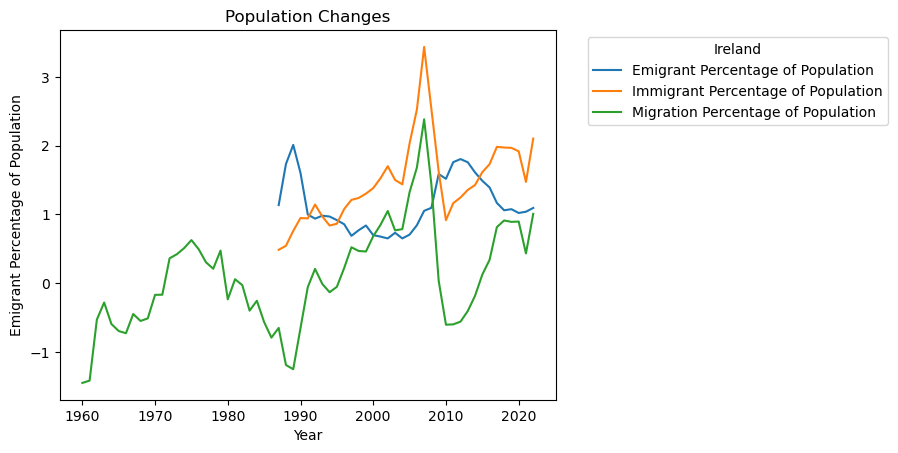

In [258]:
# graph
sns.lineplot(data=Combined_All_w_CSO_WB, 
             x='Year', y='Emigrant Percentage of Population', label='Emigrant Percentage of Population')
sns.lineplot(data=Combined_All_w_CSO_WB, 
             x='Year', y='Immigrant Percentage of Population', label='Immigrant Percentage of Population')
sns.lineplot(data=Combined_All_w_CSO_WB, 
             x='Year', y='Migration Percentage of Population', label='Migration Percentage of Population')
plt.xlabel('Year')
plt.title('Population Changes')
plt.legend(title='Ireland', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Combine TE01 with Main Dataframe

In [259]:
# combine Combined_All_w_CSO with TE01
Combined_All_w_CSO_WB_TE = Combined_All_w_CSO_WB.merge(TE01, on='Year', how='outer')
Combined_All_w_CSO_WB_TE.tail()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
69  2020        59100.0        32400.0    50900.0     95600.0        44700.0   
70  2021        57300.0        34300.0    52300.0     74100.0        21800.0   
71  2022        59700.0        33600.0    56100.0    107800.0        51700.0   
72  2023            NaN            NaN        NaN         NaN            NaN   
73  2024            NaN            NaN        NaN         NaN            NaN   

    Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
69                                  -0.3                    6.6   
70                                   2.4                   15.1   
71                                   7.8                    9.4   
72                                   NaN                    NaN   
73                                   NaN                    NaN   

    GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
69                               5.5                               -1.2  ...   
70                              14.0                                0.5  ...   
71                               7.4                                6.6  ...   
72                               NaN                                NaN  ...   
73                               NaN                                NaN  ...   

    United Kingdom  Ireland Percentage Change  \
69      67081234.0                   1.034424   
70      67026292.0                   0.958442   
71      66971395.0                   1.867732   
72             NaN                        NaN   
73             NaN                        NaN   

    East Asia & Pacific Percentage Change  European Union Percentage Change  \
69                               0.428126                          0.072675   
70                               0.264623                         -0.114856   
71                               0.209788                          0.043025   
72                                    NaN                               NaN   
73                                    NaN                               NaN   

    South Asia Percentage Change  UK Percentage Change  \
69                      1.124469              0.366428   
70                      1.029464             -0.081904   
71                      0.916783             -0.081904   
72                           NaN                   NaN   
73                           NaN                   NaN   

    Immigrant Percentage of Population  Emigrant Percentage of Population  \
69                            1.917606                           1.020985   
70                            1.472235                           1.039108   
71                            2.102524                           1.094171   
72                                 NaN                                NaN   
73                                 NaN                                NaN   

    Migration Percentage of Population  Ireland 10Y Bond Yield  
69                            0.896621               -0.092917  
70                            0.433127                0.120250  
71                            1.008354                1.845417  
72                                 NaN                2.867667  
73                                 NaN                2.800750  

[5 rows x 82 columns]

In [260]:
Combined_All_w_CSO_WB_TE.head()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
0  1951            NaN            NaN        NaN         NaN       -35000.0   
1  1952            NaN            NaN        NaN         NaN       -35000.0   
2  1953            NaN            NaN        NaN         NaN       -33000.0   
3  1954            NaN            NaN        NaN         NaN       -36000.0   
4  1955            NaN            NaN        NaN         NaN       -45000.0   

   Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
0                                   NaN                    NaN   
1                                   NaN                    NaN   
2                                   NaN                    NaN   
3                                   NaN                    NaN   
4                                   NaN                    NaN   

   GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
0                               NaN                                NaN  ...   
1                               NaN                                NaN  ...   
2                               NaN                                NaN  ...   
3                               NaN                                NaN  ...   
4                               NaN                                NaN  ...   

   United Kingdom  Ireland Percentage Change  \
0             NaN                        NaN   
1             NaN                        NaN   
2             NaN                        NaN   
3             NaN                        NaN   
4             NaN                        NaN   

   East Asia & Pacific Percentage Change  European Union Percentage Change  \
0                                    NaN                               NaN   
1                                    NaN                               NaN   
2                                    NaN                               NaN   
3                                    NaN                               NaN   
4                                    NaN                               NaN   

   South Asia Percentage Change  UK Percentage Change  \
0                           NaN                   NaN   
1                           NaN                   NaN   
2                           NaN                   NaN   
3                           NaN                   NaN   
4                           NaN                   NaN   

   Immigrant Percentage of Population  Emigrant Percentage of Population  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Migration Percentage of Population  Ireland 10Y Bond Yield  
0                                 NaN                     NaN  
1                                 NaN                     NaN  
2                                 NaN                     NaN  
3                                 NaN                     NaN  
4                                 NaN                     NaN  

[5 rows x 82 columns]

# Combine PEA18 with Main Dataframe

In [261]:
# combine Combined_All_w_CSO with TE01
Final = Combined_All_w_CSO_WB_TE.merge(PEA18_2, on='Year', how='outer')
Final.head()

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
0  1951            NaN            NaN        NaN         NaN       -35000.0   
1  1952            NaN            NaN        NaN         NaN       -35000.0   
2  1953            NaN            NaN        NaN         NaN       -33000.0   
3  1954            NaN            NaN        NaN         NaN       -36000.0   
4  1955            NaN            NaN        NaN         NaN       -45000.0   

   Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
0                                   NaN                    NaN   
1                                   NaN                    NaN   
2                                   NaN                    NaN   
3                                   NaN                    NaN   
4                                   NaN                    NaN   

   GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
0                               NaN                                NaN  ...   
1                               NaN                                NaN  ...   
2                               NaN                                NaN  ...   
3                               NaN                                NaN  ...   
4                               NaN                                NaN  ...   

   Immigrants_EU15 to EU27 (accession countries joined post 2004)  \
0                                                NaN                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                NaN                

   Immigrants_Other countries (23)  Immigrants_United Kingdom (1)  \
0                              NaN                            NaN   
1                              NaN                            NaN   
2                              NaN                            NaN   
3                              NaN                            NaN   
4                              NaN                            NaN   

   Immigrants_United States  Net migration_All countries  \
0                       NaN                          NaN   
1                       NaN                          NaN   
2                       NaN                          NaN   
3                       NaN                          NaN   
4                       NaN                          NaN   

   Net migration_EU14 excl Irl (UK & Ireland)  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   Net migration_EU15 to EU27 (accession countries joined post 2004)  \
0                                                NaN                   
1                                                NaN                   
2                                                NaN                   
3                                                NaN                   
4                                                NaN                   

   Net migration_Other countries (23)  Net migration_United Kingdom (1)  \
0                                 NaN                               NaN   
1                                 NaN                               NaN   
2                                 NaN                               NaN   
3                                 NaN                               NaN   
4                                 NaN                               NaN   

   Net migration_United States  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  

[5 rows x 100 columns]

# Combined Datasets

## Check

In [262]:
Final.head(n=25)

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
0   1951            NaN            NaN        NaN         NaN       -35000.0   
1   1952            NaN            NaN        NaN         NaN       -35000.0   
2   1953            NaN            NaN        NaN         NaN       -33000.0   
3   1954            NaN            NaN        NaN         NaN       -36000.0   
4   1955            NaN            NaN        NaN         NaN       -45000.0   
5   1956            NaN            NaN        NaN         NaN       -48000.0   
6   1957            NaN            NaN        NaN         NaN       -41000.0   
7   1958            NaN            NaN        NaN         NaN       -58000.0   
8   1959            NaN            NaN        NaN         NaN       -32000.0   
9   1960            NaN            NaN        NaN         NaN       -41000.0   
10  1961            NaN            NaN        NaN         NaN       -40000.0   
11  1962            NaN            NaN        NaN         NaN       -15000.0   
12  1963            NaN            NaN        NaN         NaN        -8000.0   
13  1964            NaN            NaN        NaN         NaN       -17000.0   
14  1965            NaN            NaN        NaN         NaN       -20000.0   
15  1966            NaN            NaN        NaN         NaN       -21000.0   
16  1967            NaN            NaN        NaN         NaN       -13000.0   
17  1968            NaN            NaN        NaN         NaN       -16000.0   
18  1969            NaN            NaN        NaN         NaN       -15000.0   
19  1970            NaN            NaN        NaN         NaN        -5000.0   
20  1971            NaN            NaN        NaN         NaN        -5000.0   
21  1972            NaN            NaN        NaN         NaN        11000.0   
22  1973            NaN            NaN        NaN         NaN        13000.0   
23  1974            NaN            NaN        NaN         NaN        16000.0   
24  1975            NaN            NaN        NaN         NaN        20000.0   

    Inflation Consumer Prices (Annual %)  GDP Growth (annual %)  \
0                                    NaN                    NaN   
1                                    NaN                    NaN   
2                                    NaN                    NaN   
3                                    NaN                    NaN   
4                                    NaN                    NaN   
5                                    NaN                    NaN   
6                                    NaN                    NaN   
7                                    NaN                    NaN   
8                                    NaN                    NaN   
9                                    0.5                    NaN   
10                                   2.8                    NaN   
11                                   4.3                    NaN   
12                                   2.5                    NaN   
13                                   6.7                    NaN   
14                                   5.0                    NaN   
15                                   3.1                    NaN   
16                                   3.2                    NaN   
17                                   4.7                    NaN   
18                                   7.4                    NaN   
19                                   8.2                    NaN   
20                                   9.0                    3.5   
21                                   8.6                    6.5   
22                                  11.4                    4.7   
23                                  17.0                    4.3   
24                                  20.9                    5.7   

    GDP per Capita Growth (Annual %)  Inflation GDP Deflator (Annual %)  ...  \
0                                NaN                                NaN  ...   
1                   

In [263]:
Final.tail(n=50)

Year  Annual births  Annual deaths  Emigrants  Immigrants  Net migration  \
24  1975            NaN            NaN        NaN         NaN        20000.0   
25  1976            NaN            NaN        NaN         NaN        16000.0   
26  1977            NaN            NaN        NaN         NaN        10000.0   
27  1978            NaN            NaN        NaN         NaN         7000.0   
28  1979            NaN            NaN        NaN         NaN        16000.0   
29  1980            NaN            NaN        NaN         NaN        -8000.0   
30  1981            NaN            NaN        NaN         NaN         2000.0   
31  1982            NaN            NaN        NaN         NaN        -1000.0   
32  1983            NaN            NaN        NaN         NaN       -14000.0   
33  1984            NaN            NaN        NaN         NaN        -9000.0   
34  1985            NaN            NaN        NaN         NaN       -20000.0   
35  1986            NaN            NaN        NaN         NaN       -28000.0   
36  1987        61200.0        32200.0    40200.0     17200.0       -23000.0   
37  1988        57800.0        31600.0    61100.0     19200.0       -41900.0   
38  1989        53600.0        31000.0    70600.0     26700.0       -43900.0   
39  1990        51900.0        32800.0    56300.0     33300.0       -22900.0   
40  1991        53100.0        31100.0    35300.0     33300.0        -2000.0   
41  1992        52800.0        31400.0    33400.0     40700.0         7400.0   
42  1993        50400.0        30400.0    35100.0     34700.0         -400.0   
43  1994        49100.0        32600.0    34800.0     30100.0        -4700.0   
44  1995        48400.0        31200.0    33100.0     31200.0        -1900.0   
45  1996        48800.0        32000.0    31200.0     39200.0         8000.0   
46  1997        50700.0        31700.0    25300.0     44500.0        19200.0   
47  1998        52700.0        31200.0    28600.0     46000.0        17400.0   
48  1999        53700.0        32400.0    31500.0     48900.0        17300.0   
49  2000        54000.0        32100.0    26600.0     52600.0        26000.0   
50  2001        55100.0        30200.0    26200.0     59000.0        32800.0   
51  2002        58100.0        29300.0    25600.0     66900.0        41300.0   
52  2003        60800.0        28900.0    29300.0     60000.0        30700.0   
53  2004        62000.0        28600.0    26500.0     58500.0        32000.0   
54  2005        61400.0        27900.0    29400.0     84600.0        55100.0   
55  2006        61200.0        27000.0    36000.0    107800.0        71800.0   
56  2007        66600.0        28400.0    46300.0    151100.0       104800.0   
57  2008        73000.0        28000.0    49200.0    113500.0        64300.0   
58  2009        75300.0        28600.0    72000.0     73700.0         1600.0   
59  2010        77200.0        28400.0    69200.0     41800.0       -27500.0   
60  2011        75100.0        27700.0    80600.0     53300.0       -27400.0   
61  2012        73200.0        28700.0    83000.0     57300.0       -25700.0   
62  2013        69400.0        29800.0    81300.0     62700.0       -18700.0   
63  2014        68400.0        29200.0    75000.0     66500.0        -8500.0   
64  2015        66400.0        29900.0    70000.0     75900.0         5900.0   
65  2016        65400.0        29800.0    66200.0     82300.0        16200.0   
66  2017        63400.0        31300.0    56100.0     95300.0        39200.0   
67  2018        61600.0        32000.0    51600.0     96000.0        44400.0   
68  2019        60500.0        30900.0    53100.0     97100.0        44000.0   
69  2020        59100.0        32400.0    50900.0     95600.0        44700.0   
70  2021        57300.0        34300.0    52300.0     74100.0        21800.0   
71  2022        59700.0        33600.0    56100.0    107800.0        51700.0   
72  2023            NaN            NaN        NaN         NaN            NaN   
73  

In [264]:
print(Final.columns)


Index(['Year', 'Annual births', 'Annual deaths', 'Emigrants', 'Immigrants',
       'Net migration', 'Inflation Consumer Prices (Annual %)',
       'GDP Growth (annual %)', 'GDP per Capita Growth (Annual %)',
       'Inflation GDP Deflator (Annual %)',
       'Participation rate_Ireland_Total_Foreign-born',
       'Participation rate_Ireland_Total_Native-born',
       'Participation rate_Ireland_Women_Foreign-born',
       'Participation rate_Ireland_Women_Native-born',
       'Participation rate_United Kingdom_Total_Foreign-born',
       'Participation rate_United Kingdom_Total_Native-born',
       'Participation rate_United Kingdom_Women_Foreign-born',
       'Participation rate_United Kingdom_Women_Native-born',
       'Unemployment rate_Ireland_Total_Foreign-born',
       'Unemployment rate_Ireland_Total_Native-born',
       'Unemployment rate_Ireland_Women_Foreign-born',
       'Unemployment rate_Ireland_Women_Native-born',
       'Unemployment rate_United Kingdom_Total_Foreign-bor

In [265]:
Final = Final.rename(columns = {'East Asia & Pacific': 'Population East Asia & Pacific', 'European Union': 'Population EU', 'Ireland': 'Population Ireland', 'South Asia':'Population South Asia', 'United Kingdom': 'Population UK'})


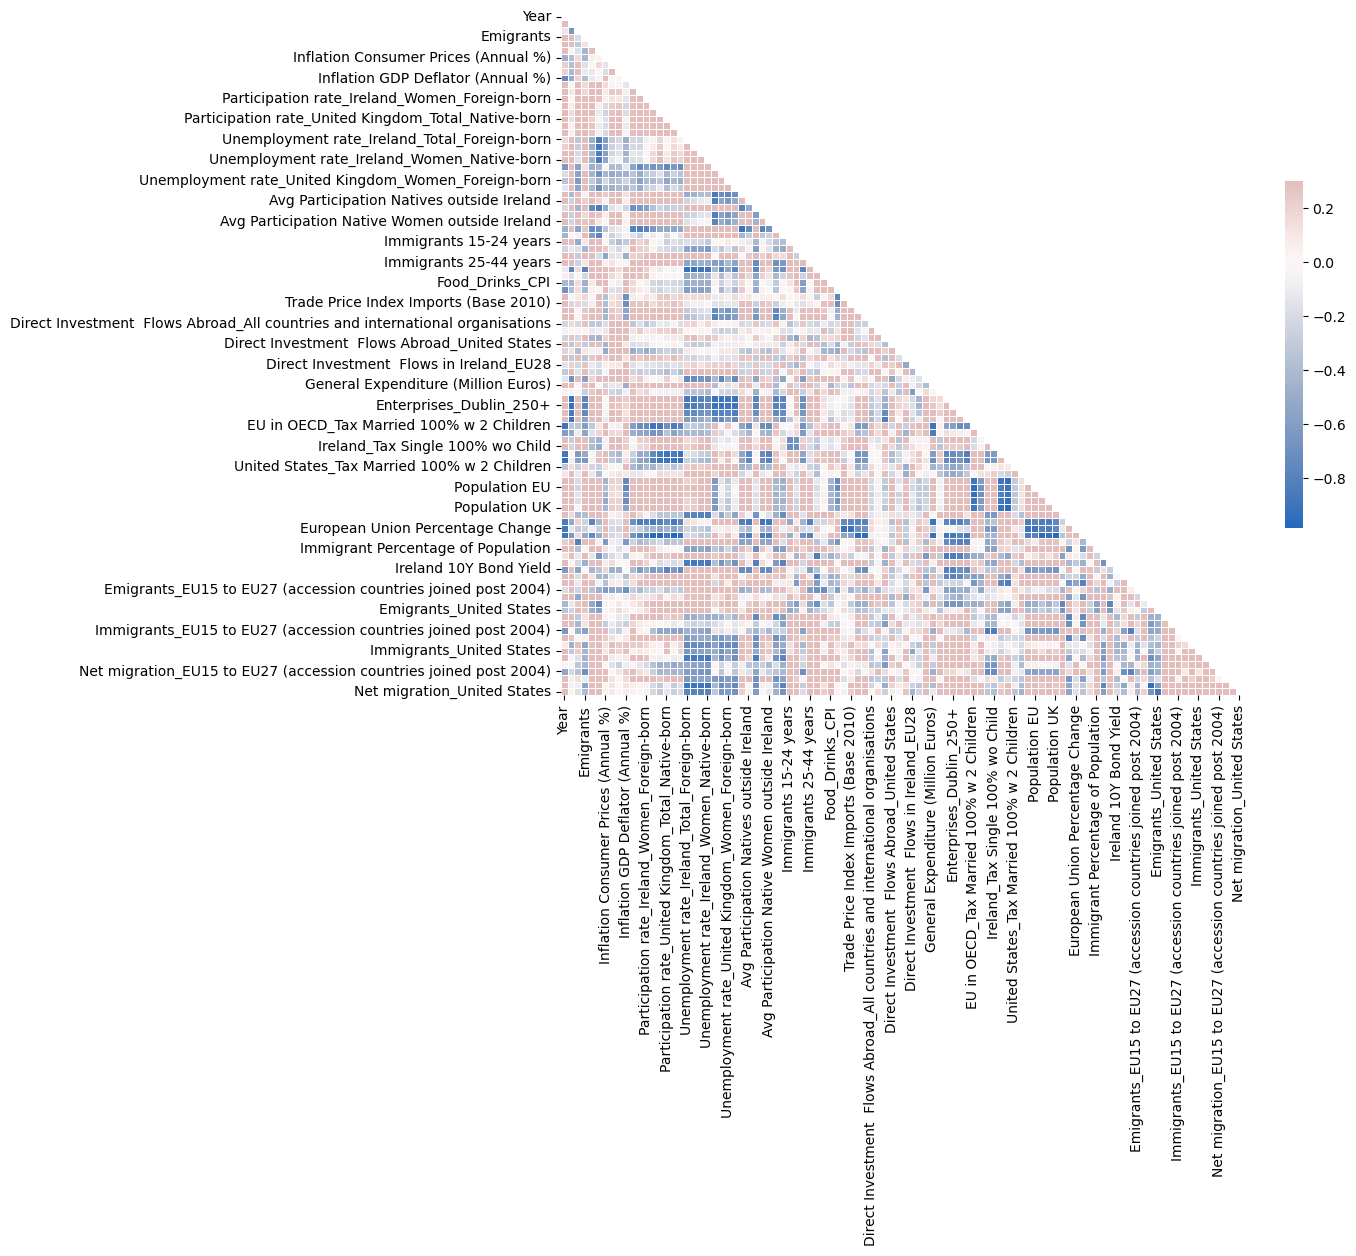

In [266]:
# correlatioon matrix Combined_All_w_CSO_WB_TE
corr = Final.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='vlag', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

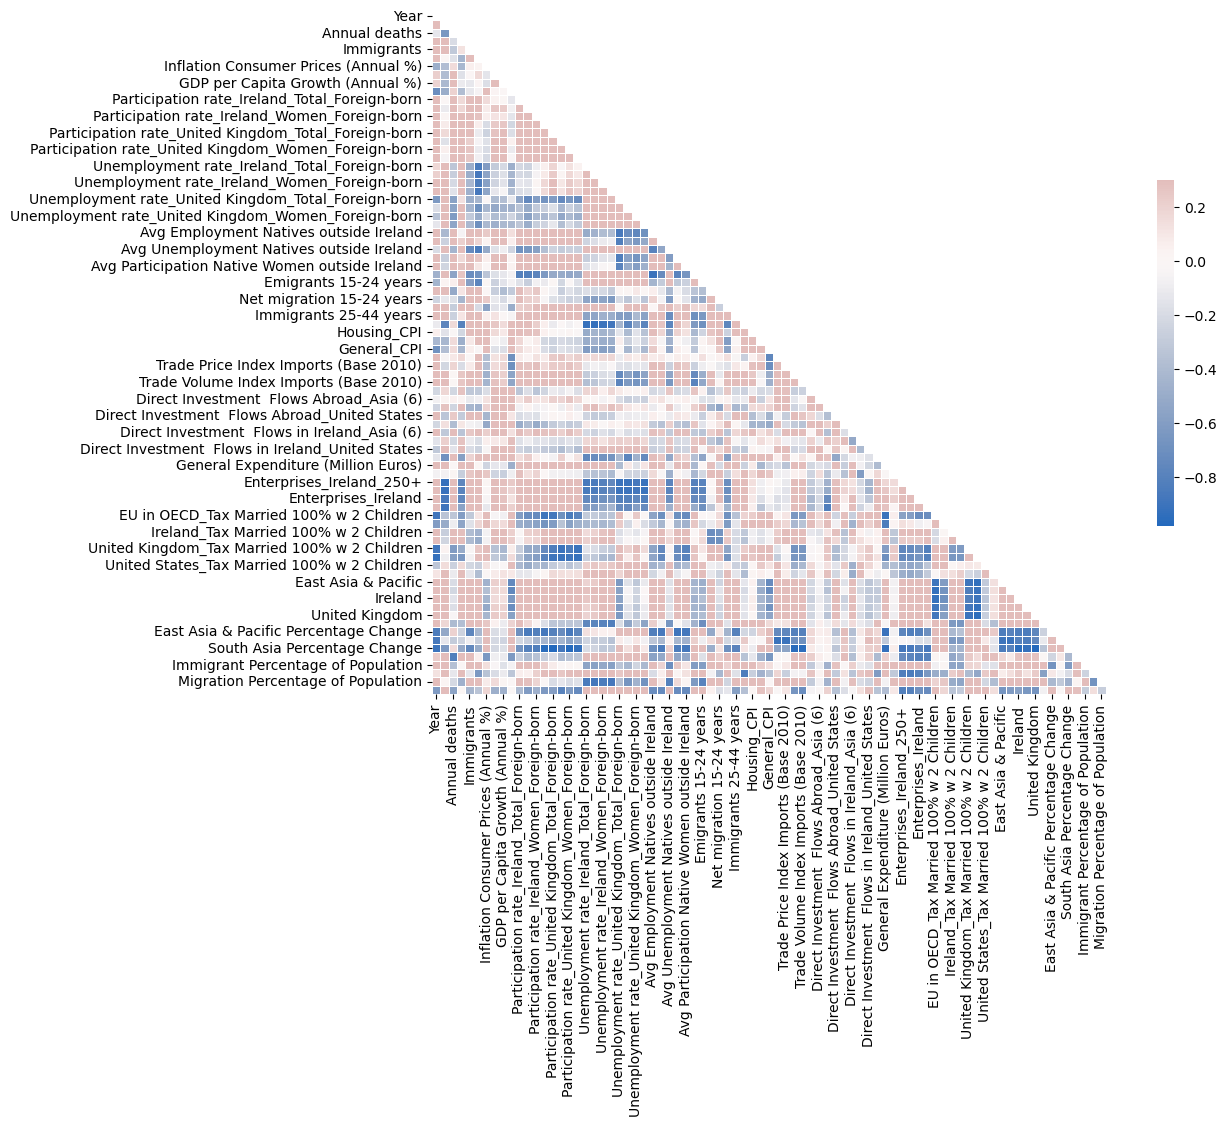

In [267]:
# correlatioon matrix Combined_All_w_CSO_WB_TE
corr = Combined_All_w_CSO_WB_TE.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='vlag', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [268]:
# save dataset to excel
Final.to_excel('Data/FinalData.xlsx', index=False)

Variables to Take from these:
- Net migration
- ...